In [1]:
print("Final Project Fighting!! ")

Final Project Fighting!! 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# ad_list

In [3]:
ad_list = pd.read_csv("/Users/t2023-m0052/Documents/GitHub/final_project/data/IVE_광고목록.csv")
ad_list.head()

/var/folders/4n/w27drm2j3_v05ss9qbg_6qsc0000gn/T/ipykernel_76221/302293741.py:1: DtypeWarning: Columns (12,13,19) have mixed types. Specify dtype option on import or set low_memory=False.
  ad_list = pd.read_csv("/Users/t2023-m0052/Documents/GitHub/final_project/data/IVE_광고목록.csv")


,ads_idx,ads_code,aff_idx,adv_idx,sch_idx,ads_type,ads_category,ads_name,ads_search,ads_icon_img,...,ads_age_min,ads_age_max,ads_os_type,ads_contract_price,ads_reward_price,ads_order,ads_rejoin_type,ads_require_adid,regdate,delyn
0,160,tr71opm6C1,6,10,13604,1,1,리니지레드나이츠,"리니지레드나이츠,com.ncsoft.redknights,ecaab3f9d2616f6...",https://lh3.googleusercontent.com/oDGXxngO9oOP...,...,0,100,2,170,150,982800,NONE,Y,2017-04-06 13:19:53,N
1,284,xlNpfkgtLX,6,10,13605,1,1,강철의함대:Ocean Overlord,"강철의함대:Ocean Overlord,com.gamepub.lw.g,a370ab70...",http://nextapps-nas.aws.appang.kr/icon/2016122...,...,0,100,2,180,160,987200,NONE,Y,2017-01-10 10:37:22,N
2,292,7Hj8V5QKiy,6,10,13606,1,1,스노우 SNOW,"스노우 SNOW,com.campmobile.snow,5b892d7e0cff73621...",http://nextapps-nas.aws.appang.kr/icon/2016092...,...,0,100,2,160,160,987300,NONE,Y,2017-01-02 12:51:34,N
3,304,1RfxHJcuEe,6,10,13607,2,1,서머너즈 워: 천공의 아레나,"서머너즈 워: 천공의 아레나,com.com2us.smon.normal.freeful...",http://nextapps-nas.aws.appang.kr/icon/EecpHzP...,...,0,100,2,230,210,931000,NONE,Y,2017-03-30 17:05:23,N
4,306,l3GyilYEVk,6,10,23543,1,1,하이마트,"하이마트,com.himart.main,8230c6a95581533fad10b0e3b...",http://nextapps-nas.aws.appang.kr/icon/2016032...,...,0,100,2,170,140,1155100,NONE,Y,2017-06-12 15:24:46,N


In [4]:
ad_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445260 entries, 0 to 445259
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   ads_idx             445260 non-null  int64 
 1   ads_code            445260 non-null  object
 2   aff_idx             445260 non-null  int64 
 3   adv_idx             445260 non-null  int64 
 4   sch_idx             445260 non-null  int64 
 5   ads_type            445260 non-null  int64 
 6   ads_category        445260 non-null  int64 
 7   ads_name            445260 non-null  object
 8   ads_search          445258 non-null  object
 9   ads_icon_img        445255 non-null  object
 10  ads_summary         438199 non-null  object
 11  ads_guide           444957 non-null  object
 12  ads_limit           543 non-null     object
 13  ads_payment         2335 non-null    object
 14  ads_save_way        444746 non-null  object
 15  ads_day_cap         445260 non-null  object
 16  ad

In [53]:
pd.set_option('display.max_rows', 1000)
ad_list.loc[ad_list['delyn'] == 'Y', ['ads_type', 'ads_name', 'ads_sdate', 'ads_edate', 'regdate']]

NameError: name 'ad_list' is not defined

### NEW 리스트 만들기

In [5]:
new_ad_list = ad_list.drop(['sch_idx', 'ads_search', 'ads_guide', 'ads_limit', 'ads_payment', 'ads_package', 'ads_sex_type', 'ads_require_adid'], axis=1)
new_ad_list

,ads_idx,ads_code,aff_idx,adv_idx,ads_type,ads_category,ads_name,ads_icon_img,ads_summary,ads_save_way,...,ads_edate,ads_age_min,ads_age_max,ads_os_type,ads_contract_price,ads_reward_price,ads_order,ads_rejoin_type,regdate,delyn
0,160,tr71opm6C1,6,10,1,1,리니지레드나이츠,https://lh3.googleusercontent.com/oDGXxngO9oOP...,[앱설명]<br />[설치형] 매력만점 영웅들과 소환수들이 함께하는 취향저격 RPG...,받기,...,9999-12-31 23:59:59,0,100,2,170,150,982800,NONE,2017-04-06 13:19:53,N
1,284,xlNpfkgtLX,6,10,1,1,강철의함대:Ocean Overlord,http://nextapps-nas.aws.appang.kr/icon/2016122...,"[앱설명]<br />[설치형] 한, 중, 일 아시아 유저들과 함께 대규모 해상 전투...",받기,...,9999-12-31 23:59:59,0,100,2,180,160,987200,NONE,2017-01-10 10:37:22,N
2,292,7Hj8V5QKiy,6,10,1,1,스노우 SNOW,http://nextapps-nas.aws.appang.kr/icon/2016092...,"[앱설명]<br />[설치형] 셀카, 얼굴인식 스티커, 꿀잼 카메라<br /><br...",받기,...,9999-12-31 23:59:59,0,100,2,160,160,987300,NONE,2017-01-02 12:51:34,N
3,304,1RfxHJcuEe,6,10,2,1,서머너즈 워: 천공의 아레나,http://nextapps-nas.aws.appang.kr/icon/EecpHzP...,[앱설명]<br />[실행형] 전 세계 5000만 소환사들을 사로잡은 명작 RPG<...,최초 오픈,...,9999-12-31 23:59:59,0,100,2,230,210,931000,NONE,2017-03-30 17:05:23,N
4,306,l3GyilYEVk,6,10,1,1,하이마트,http://nextapps-nas.aws.appang.kr/icon/2016032...,새롭게 단장한 하이마트 쇼핑몰 앱!,받기,...,2019-11-01 00:00:00,0,100,2,170,140,1155100,NONE,2017-06-12 15:24:46,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445255,446914,qy1HUatIL9,85,1631,3,4,한식뷔페&카페 봄날,https://i.imgur.com/XdcGFx7.jpeg,"1. 가이드라인 대로 진행하지 않으시면, 매크로로 인식하여 추후 문제가 발생할 수...",정답입력,...,9999-12-31 23:59:59,0,100,7,16,10,1369920,ADS_CODE_DAILY_UPDATE,2025-08-25 11:08:15,N
445256,446915,UKnGFJUnmg,84,1623,3,4,용융소금,https://adwize.co.kr/common_img/reward/GNSQ_IC...,[참여방법]\n- 미션 참여 방법을 꼭 확인하신 후 참여해 주세요.\n- 제공되는 ...,퀴즈 맞추기,...,9999-12-31 23:59:59,0,100,7,15,10,1369919,NONE,2025-08-25 11:12:12,N
445257,446916,g3lUg3nuxR,86,1655,3,4,1kg 원두커피 블렌드 7종 맛있는 당일로스팅 고소한 납품 도매 납품 홀빈 180244,https://cashplan-r2.uk/quiz-mission.png,[참여방법]\n1. 본문에서 퀴즈와 상품/장소 확인\n1-1. 퀴즈: 7번째 태그 ...,네이버스마트스토어 퀴즈,...,9999-12-31 23:59:59,0,100,7,18,12,1369918,ADS_CODE_DAILY_UPDATE,2025-08-25 11:12:16,N
445258,446917,0GLHsRVZNv,57,84,3,8,[가입하기] 슈퍼티비,https://s3.ap-northeast-2.amazonaws.com/com.ga...,1. 회원가입하기 \n**성인인증 받을필요는 없음❌\n\n2. 왼쪽상단 메뉴바 클릭...,참여,...,2030-12-27 00:00:00,0,100,7,300,225,2764400,NONE,2025-08-25 11:18:35,N


In [8]:
new_ad_list = pd.read_csv('수정2_광고목록.csv')

In [12]:
new_ad_list.sample(500)['ads_name']

251912    피규어 장식장 레고... (검색 후 퀴즈맞추기) 1496
52736                             국본가 보령점
76476                    수영장바디워시 맞추기 7.26
36953                                 엠오엠
412953                     [정답입력]해운대역 해장국
                       ...               
245231    세부 고래상어 모알... (검색 후 퀴즈맞추기) 5577
227300    남자 슬랙스 정장바... (검색 후 퀴즈맞추기) 9830
143263    (배터리 1년 A/... (검색 후 퀴즈맞추기) 9251
44756              몬스타 가츠 X840E  맞추기 5.10
182067    LEWITT LCT... (검색 후 퀴즈맞추기) 8464
Name: ads_name, Length: 500, dtype: object

In [6]:
new_ad_list.shape

(445260, 22)

In [7]:
new_ad_list = new_ad_list[new_ad_list['delyn'] == 'N']
new_ad_list = new_ad_list.drop(['delyn'], axis=1)
new_ad_list

,ads_idx,ads_code,aff_idx,adv_idx,ads_type,ads_category,ads_name,ads_icon_img,ads_summary,ads_save_way,...,ads_sdate,ads_edate,ads_age_min,ads_age_max,ads_os_type,ads_contract_price,ads_reward_price,ads_order,ads_rejoin_type,regdate
0,160,tr71opm6C1,6,10,1,1,리니지레드나이츠,https://lh3.googleusercontent.com/oDGXxngO9oOP...,[앱설명]<br />[설치형] 매력만점 영웅들과 소환수들이 함께하는 취향저격 RPG...,받기,...,2016-12-01 00:00:00,9999-12-31 23:59:59,0,100,2,170,150,982800,NONE,2017-04-06 13:19:53
1,284,xlNpfkgtLX,6,10,1,1,강철의함대:Ocean Overlord,http://nextapps-nas.aws.appang.kr/icon/2016122...,"[앱설명]<br />[설치형] 한, 중, 일 아시아 유저들과 함께 대규모 해상 전투...",받기,...,2016-12-29 00:00:00,9999-12-31 23:59:59,0,100,2,180,160,987200,NONE,2017-01-10 10:37:22
2,292,7Hj8V5QKiy,6,10,1,1,스노우 SNOW,http://nextapps-nas.aws.appang.kr/icon/2016092...,"[앱설명]<br />[설치형] 셀카, 얼굴인식 스티커, 꿀잼 카메라<br /><br...",받기,...,2016-12-29 00:00:00,9999-12-31 23:59:59,0,100,2,160,160,987300,NONE,2017-01-02 12:51:34
3,304,1RfxHJcuEe,6,10,2,1,서머너즈 워: 천공의 아레나,http://nextapps-nas.aws.appang.kr/icon/EecpHzP...,[앱설명]<br />[실행형] 전 세계 5000만 소환사들을 사로잡은 명작 RPG<...,최초 오픈,...,2017-01-01 00:00:00,9999-12-31 23:59:59,0,100,2,230,210,931000,NONE,2017-03-30 17:05:23
4,306,l3GyilYEVk,6,10,1,1,하이마트,http://nextapps-nas.aws.appang.kr/icon/2016032...,새롭게 단장한 하이마트 쇼핑몰 앱!,받기,...,2017-01-01 00:00:00,2019-11-01 00:00:00,0,100,2,170,140,1155100,NONE,2017-06-12 15:24:46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445255,446914,qy1HUatIL9,85,1631,3,4,한식뷔페&카페 봄날,https://i.imgur.com/XdcGFx7.jpeg,"1. 가이드라인 대로 진행하지 않으시면, 매크로로 인식하여 추후 문제가 발생할 수...",정답입력,...,2025-08-25 11:08:15,9999-12-31 23:59:59,0,100,7,16,10,1369920,ADS_CODE_DAILY_UPDATE,2025-08-25 11:08:15
445256,446915,UKnGFJUnmg,84,1623,3,4,용융소금,https://adwize.co.kr/common_img/reward/GNSQ_IC...,[참여방법]\n- 미션 참여 방법을 꼭 확인하신 후 참여해 주세요.\n- 제공되는 ...,퀴즈 맞추기,...,2025-08-25 11:12:12,9999-12-31 23:59:59,0,100,7,15,10,1369919,NONE,2025-08-25 11:12:12
445257,446916,g3lUg3nuxR,86,1655,3,4,1kg 원두커피 블렌드 7종 맛있는 당일로스팅 고소한 납품 도매 납품 홀빈 180244,https://cashplan-r2.uk/quiz-mission.png,[참여방법]\n1. 본문에서 퀴즈와 상품/장소 확인\n1-1. 퀴즈: 7번째 태그 ...,네이버스마트스토어 퀴즈,...,2025-08-25 11:12:16,9999-12-31 23:59:59,0,100,7,18,12,1369918,ADS_CODE_DAILY_UPDATE,2025-08-25 11:12:16
445258,446917,0GLHsRVZNv,57,84,3,8,[가입하기] 슈퍼티비,https://s3.ap-northeast-2.amazonaws.com/com.ga...,1. 회원가입하기 \n**성인인증 받을필요는 없음❌\n\n2. 왼쪽상단 메뉴바 클릭...,참여,...,2025-08-25 11:00:00,2030-12-27 00:00:00,0,100,7,300,225,2764400,NONE,2025-08-25 11:18:35


In [8]:
new_ad_list[['ads_sdate', 'ads_edate', 'regdate']]

,ads_sdate,ads_edate,regdate
0,2016-12-01 00:00:00,9999-12-31 23:59:59,2017-04-06 13:19:53
1,2016-12-29 00:00:00,9999-12-31 23:59:59,2017-01-10 10:37:22
2,2016-12-29 00:00:00,9999-12-31 23:59:59,2017-01-02 12:51:34
3,2017-01-01 00:00:00,9999-12-31 23:59:59,2017-03-30 17:05:23
4,2017-01-01 00:00:00,2019-11-01 00:00:00,2017-06-12 15:24:46
...,...,...,...
445255,2025-08-25 11:08:15,9999-12-31 23:59:59,2025-08-25 11:08:15
445256,2025-08-25 11:12:12,9999-12-31 23:59:59,2025-08-25 11:12:12
445257,2025-08-25 11:12:16,9999-12-31 23:59:59,2025-08-25 11:12:16
445258,2025-08-25 11:00:00,2030-12-27 00:00:00,2025-08-25 11:18:35


In [13]:
sdate0 = new_ad_list.loc[new_ad_list['ads_sdate'] == '0000-00-00 00:00:00', 'ads_idx'] # 227
new_ad_list[(new_ad_list['ads_sdate'] == '0000-00-00 00:00:00') & (new_ad_list['ads_edate'] == '0000-00-00 00:00:00')] # 227로 동일

,ads_idx,ads_code,aff_idx,adv_idx,ads_type,ads_category,ads_name,ads_icon_img,ads_summary,ads_save_way,...,ads_sdate,ads_edate,ads_age_min,ads_age_max,ads_os_type,ads_contract_price,ads_reward_price,ads_order,ads_rejoin_type,regdate
67,1306,lLU3dyqi3P,15,62,2,1,파이널 드래곤 나이츠 실행형_aos,https://lh3.googleusercontent.com/KybE5bKufVNQ...,3D 초대형 판타지 모바일 게임의 레볼루션! 파이널 드래곤 나이츠! \n이건 ARP...,최초 오픈,...,0000-00-00 00:00:00,0000-00-00 00:00:00,0,100,2,260,210,933000,NONE,2017-04-06 14:13:53
81,1341,rOAourUQgw,1,109,3,2,프로야구 H2 사전예약,https://lh3.googleusercontent.com/NW3yM9glVbFq...,지금 사전 예약해주세요~! \n선수뽑기 카드와 두둑한 지원금을 드립니다!!\n지금 ...,사전예약 완료,...,0000-00-00 00:00:00,0000-00-00 00:00:00,0,100,7,1500,1200,659100,NONE,2017-03-24 10:29:58
123,1448,oaHWT18w24,30,80,2,1,여명 for kakao,https://cdn-ad-static.buzzvil.com/uploads/1489...,"4월 26일 대규모 업데이트!\n- 신규 직업 \""대검사\"" 추가\n- 캐릭터 최고...",최초 오픈,...,0000-00-00 00:00:00,0000-00-00 00:00:00,0,100,2,200,180,933400,NONE,2017-05-11 13:10:24
124,1450,bY9l99IGOw,30,80,1,1,몬스터,https://d3aulf22blzf9p.cloudfront.net/uploads/...,▶한 번 시작하면 멈출 수 없는 액션\n- 고퀄리티 그래픽과 화려한 이펙트의 극한 ...,받기,...,0000-00-00 00:00:00,0000-00-00 00:00:00,0,100,2,160,150,996800,NONE,2017-05-11 13:13:47
125,1452,5GgMwttXai,30,80,2,1,다음-Daum,https://buzzvil.akamaized.net/adfit.image/uplo...,[서비스 접근 권한 안내]\n\n*다음앱에서 요청하는 모든 권한은 선택적 접근 권한...,최초 오픈,...,0000-00-00 00:00:00,0000-00-00 00:00:00,0,100,2,200,180,933500,NONE,2017-05-11 13:33:33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370994,372653,KfzMhzCv4W,1,557,2,2,삼국지 올스타,https://i.imgur.com/a2hE0UL.jpeg,[참여 방법]\n1. 광고 참여 버튼 터치하여 마켓으로 이동\n2. App 최초 오...,최초 오픈,...,0000-00-00 00:00:00,0000-00-00 00:00:00,0,100,1,280,180,2748100,NONE,2025-05-30 13:10:07
410717,412376,gL1vFwGwZR,1,1660,3,8,나두기업몰,https://i.imgur.com/grRbX8G.jpeg,일반인 누구나 회원가입 가능!\n\n[참여 방법]\n1. 광고 참여 버튼 터치하여 ...,참여,...,0000-00-00 00:00:00,0000-00-00 00:00:00,0,100,2,1200,800,2752600,NONE,2025-07-02 13:34:23
438476,440135,MEnre3naZI,1,1662,2,1,보스포커,https://i.imgur.com/V9xckPU.png,[참여 방법]\n1. 광고 참여 버튼 터치하여 마켓으로 이동\n2. App 최초 오...,최초 오픈,...,0000-00-00 00:00:00,0000-00-00 00:00:00,0,100,1,280,180,2756700,NONE,2025-08-04 17:46:45
442294,443953,HiAARvqMP1,1,1670,2,1,신트노트,https://i.imgur.com/AYHFLoW.png,[참여 방법]\n1. 광고 참여 버튼 터치하여 마켓으로 이동\n2. App 최초 오...,최초 오픈,...,0000-00-00 00:00:00,0000-00-00 00:00:00,0,100,2,10,10,2761400,NONE,2025-08-13 12:43:15


In [14]:
sum(new_ad_prpt['ads_idx'].isin(sdate0))

12

In [15]:
new_ad_prpt[new_ad_prpt['ads_idx'].isin(sdate0)]

,click_key,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,contract_price,media_price,click_day,click_time,click_date,exp_day,network,user_ip
742311,0b452f079d7460147db94b884462dc957a8c1de0,163147,61813538,337,1,4224,3160,2025-08-08,1,2025-08-08 01:27:43,2025-09-07,NaN,119.197.67.48
1213845,126b836d47152d221dad9693430cd0879c7f8aab,163147,61878133,270,1,4224,2212,2025-08-15,0,2025-08-15 00:33:39,2025-09-14,WIFI,211.235.99.203
2128381,2054d67c54d1c44a8ade1192d03174fc263b7a90,163147,61878133,270,1,4224,2212,2025-08-15,0,2025-08-15 00:30:45,2025-09-14,WIFI,211.235.99.203
6297810,5fb87db25260971adb109c8ba09c24cd1749c7d2,163147,56298914,761,144400642,4224,3160,2025-08-24,10,2025-08-24 10:12:20,2025-09-23,NaN,34.64.72.46
7706667,751f1f3b95bff86b112cbd1bf70a0d628d9b5bce,163147,61880285,643,1,4224,3160,2025-08-13,13,2025-08-13 13:32:17,2025-09-12,NaN,18.212.241.187
8538046,81c3441bc003aa65d9bb95b9328657e041ec1201,163147,61747021,270,1,4224,2212,2025-07-30,3,2025-07-30 03:28:11,2025-08-29,WIFI,182.221.158.246
10866689,a51bba3526dd7685c4dfa7b25f09ef22aa63f08e,163147,61234424,270,1,4224,2212,2025-08-11,1,2025-08-11 01:41:11,2025-09-10,WIFI,59.1.78.176
13286994,c9d89bc24c8642036de5b3a472707df11d9229fe,163147,61445568,761,144400642,4224,3160,2025-08-03,18,2025-08-03 18:39:42,2025-09-02,NaN,34.64.72.46
13612182,cec714ce417d6048f2577acea03b98e69fef0a5a,163147,55427315,761,144400642,4224,3160,2025-08-05,22,2025-08-05 22:44:16,2025-09-04,NaN,34.64.72.46
14362185,da284b8cfb7b715ea49bd00b0e08c2de16132066,163147,46429604,643,1,4224,3160,2025-08-22,23,2025-08-22 23:19:28,2025-09-21,NaN,44.213.60.172


In [ ]:
new_ad_list.to_csv('수정2_광고목록.csv', index = False, encoding='utf-8')

In [36]:
new_ad_list.head(200)['ads_name'].nunique()

189

In [38]:
from pandas_gbq import to_gbq

# row_id 컬럼 추가
df = new_ad_list.head(200).reset_index().rename(columns={"index": "row_id"})

# 업로드
to_gbq(
    df,
    destination_table="test_ad_list.test",  # dataset.table 형식
    project_id="sodium-primer-471002-n4",
    if_exists="replace"  # append 도 가능
)


Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=262006177488-3425ks60hkk80fssi9vpohv88g6q1iqd.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8081%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fbigquery&state=uO59zVtq4zHWWilnDgfAbj9nh9O5Dw&prompt=consent&access_type=offline


100%|██████████| 1/1 [00:00<00:00, 2531.26it/s]


In [13]:
new_ad_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445039 entries, 0 to 445038
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   ads_idx             445039 non-null  int64 
 1   ads_code            445039 non-null  object
 2   aff_idx             445039 non-null  int64 
 3   adv_idx             445039 non-null  int64 
 4   ads_type            445039 non-null  int64 
 5   ads_category        445039 non-null  int64 
 6   ads_name            445039 non-null  object
 7   ads_icon_img        445034 non-null  object
 8   ads_summary         437982 non-null  object
 9   ads_save_way        444528 non-null  object
 10  ads_day_cap         445039 non-null  object
 11  ads_sdate           445039 non-null  object
 12  ads_edate           445039 non-null  object
 13  ads_age_min         445039 non-null  int64 
 14  ads_age_max         445039 non-null  int64 
 15  ads_os_type         445039 non-null  int64 
 16  ad

In [14]:
from pandas_gbq import to_gbq

# row_id 컬럼 추가
df = new_ad_list.reset_index().rename(columns={"index": "row_id"})

# 업로드
to_gbq(
    df,
    destination_table="test_ad_list.ad_list",  # dataset.table 형식
    project_id="sodium-primer-471002-n4",
    if_exists="replace"  # append 도 가능
)

100%|██████████| 1/1 [00:00<00:00, 3440.77it/s]


In [ ]:
new_ad_list.head(200).to_csv('테스트_광고목록.csv', index = False, encoding='utf-8', quoting=csv.QUOTE_ALL,
    escapechar="\\")

In [245]:
new_ad_list[new_ad_list['ads_edate'] == '9999-12-31 23:59:59']

,ads_idx,ads_code,aff_idx,adv_idx,ads_type,ads_category,ads_name,ads_icon_img,ads_summary,ads_save_way,...,ads_sdate,ads_edate,ads_age_min,ads_age_max,ads_os_type,ads_contract_price,ads_reward_price,ads_order,ads_rejoin_type,regdate
0,160,tr71opm6C1,6,10,1,1,리니지레드나이츠,https://lh3.googleusercontent.com/oDGXxngO9oOP...,[앱설명]<br />[설치형] 매력만점 영웅들과 소환수들이 함께하는 취향저격 RPG...,받기,...,2016-12-01 00:00:00,9999-12-31 23:59:59,0,100,2,170,150,982800,NONE,2017-04-06 13:19:53
1,284,xlNpfkgtLX,6,10,1,1,강철의함대:Ocean Overlord,http://nextapps-nas.aws.appang.kr/icon/2016122...,"[앱설명]<br />[설치형] 한, 중, 일 아시아 유저들과 함께 대규모 해상 전투...",받기,...,2016-12-29 00:00:00,9999-12-31 23:59:59,0,100,2,180,160,987200,NONE,2017-01-10 10:37:22
2,292,7Hj8V5QKiy,6,10,1,1,스노우 SNOW,http://nextapps-nas.aws.appang.kr/icon/2016092...,"[앱설명]<br />[설치형] 셀카, 얼굴인식 스티커, 꿀잼 카메라<br /><br...",받기,...,2016-12-29 00:00:00,9999-12-31 23:59:59,0,100,2,160,160,987300,NONE,2017-01-02 12:51:34
3,304,1RfxHJcuEe,6,10,2,1,서머너즈 워: 천공의 아레나,http://nextapps-nas.aws.appang.kr/icon/EecpHzP...,[앱설명]<br />[실행형] 전 세계 5000만 소환사들을 사로잡은 명작 RPG<...,최초 오픈,...,2017-01-01 00:00:00,9999-12-31 23:59:59,0,100,2,230,210,931000,NONE,2017-03-30 17:05:23
12,1170,avWkCcmMi9,6,10,1,1,WING 전장의날개,http://nextapps-nas.aws.appang.kr/icon/2017010...,[앱설명]<br />[설치형] 화려한 풀스크린에서 맛보는 극강의 액션을 경험하라!<...,받기,...,2017-01-01 00:00:00,9999-12-31 23:59:59,0,100,2,170,160,987700,NONE,2017-01-12 21:19:26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445253,446912,xIYKjbKn0b,86,1655,3,4,네오피지 스나이퍼 선상 쭈꾸미 낚시대 갑오징어 로드 쭈갑 180242,https://cashplan-r2.uk/quiz-mission.png,[참여방법]\n1. 본문에서 퀴즈와 상품/장소 확인\n1-1. 퀴즈: 2번째 태그 ...,네이버스마트스토어 퀴즈,...,2025-08-25 10:57:51,9999-12-31 23:59:59,0,100,7,18,12,1369922,ADS_CODE_DAILY_UPDATE,2025-08-25 10:57:50
445254,446913,dLARpTd8e0,85,1631,3,4,한식뷔페&카페 봄날,https://i.imgur.com/XdcGFx7.jpeg,"1. 가이드라인 대로 진행하지 않으시면, 매크로로 인식하여 추후 문제가 발생할 수...",정답입력,...,2025-08-25 11:02:07,9999-12-31 23:59:59,0,100,7,16,10,1369921,ADS_CODE_DAILY_UPDATE,2025-08-25 11:02:06
445255,446914,qy1HUatIL9,85,1631,3,4,한식뷔페&카페 봄날,https://i.imgur.com/XdcGFx7.jpeg,"1. 가이드라인 대로 진행하지 않으시면, 매크로로 인식하여 추후 문제가 발생할 수...",정답입력,...,2025-08-25 11:08:15,9999-12-31 23:59:59,0,100,7,16,10,1369920,ADS_CODE_DAILY_UPDATE,2025-08-25 11:08:15
445256,446915,UKnGFJUnmg,84,1623,3,4,용융소금,https://adwize.co.kr/common_img/reward/GNSQ_IC...,[참여방법]\n- 미션 참여 방법을 꼭 확인하신 후 참여해 주세요.\n- 제공되는 ...,퀴즈 맞추기,...,2025-08-25 11:12:12,9999-12-31 23:59:59,0,100,7,15,10,1369919,NONE,2025-08-25 11:12:12


In [20]:
new_ad_list[(new_ad_list['ads_edate'] != '9999-12-31 23:59:59') &(new_ad_list['ads_edate'] != '0000-00-00 00:00:00')]

,ads_idx,ads_code,aff_idx,adv_idx,ads_type,ads_category,ads_name,ads_icon_img,ads_summary,ads_save_way,...,ads_sdate,ads_edate,ads_age_min,ads_age_max,ads_os_type,ads_contract_price,ads_reward_price,ads_order,ads_rejoin_type,regdate
4,306,l3GyilYEVk,6,10,1,1,하이마트,http://nextapps-nas.aws.appang.kr/icon/2016032...,새롭게 단장한 하이마트 쇼핑몰 앱!,받기,...,2017-01-01 00:00:00,2019-11-01 00:00:00,0,100,2,170,140,1155100,NONE,2017-06-12 15:24:46
5,310,cSsBPD7gOe,6,10,2,1,다음,http://nextapps-nas.aws.appang.kr/icon/2016110...,[앱설명]<br />[실행형] 나를 위한 다음앱<br /><br />[적립 방법]\...,최초 오픈,...,2017-01-01 00:00:00,2017-08-17 23:00:00,0,100,2,230,200,934400,NONE,2017-06-08 16:02:27
6,534,UEwz350UoE,6,10,1,1,오늘도 환생,http://nextapps-nas.aws.appang.kr/icon/2016072...,[앱설명]<br />[설치형] 천년 전!! 역사에 기록되지 않는 전투가 있었다.<b...,받기,...,2017-01-01 00:00:00,2017-02-08 23:00:00,0,100,2,180,160,987400,NONE,2017-02-06 10:11:11
8,1162,ECKwDa107E,9,22,2,1,실행형 테스트,https://lh3.googleusercontent.com/YLD5-8dCzGJU...,"보다 빠르게 전하는 MLB, KBO 실시간 알림 서비스! 한눈에 쏙쏙!\n실시간 홈...",최초 오픈,...,2017-01-01 00:00:00,2017-12-31 23:00:00,0,100,2,1,1,932400,NONE,2017-01-09 17:59:05
9,1164,eQJQGBKFWz,9,30,2,1,다방,https://lh3.googleusercontent.com/UQhxUCsAEkxA...,국내 최초 오픈형 부동산 플랫폼 “다방”\n다방의 빅데이터 분석 시스템 “다방면 스...,NaN,...,2017-01-01 10:00:00,2017-03-12 00:00:00,0,100,2,250,210,932500,NONE,2017-02-13 10:54:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444746,446405,9ulvVw3Dxd,57,84,3,8,"[답글] 600만 당뇨 시대, 혈당 스파이크 오기 전에 할인 스파이크! 글루어트_2",https://lh3.googleusercontent.com/lMoItBgdPPVD...,❌❌❌가이드 그대로 복사 붙혀넣을시 적립 불가합니다!❌❌❌ \n\n- ㅋㅋㅋㅋㅋㅋㅋ...,참여,...,2025-08-22 18:00:00,2029-11-29 00:00:00,0,100,7,200,160,2760200,NONE,2025-08-22 18:31:42
444748,446407,1z6ZJYVXVi,57,84,3,8,[쇼핑라이브하트+채팅] [마라떡볶이 끝판왕] 진또배기 마라맛의 세계로,https://s3.ap-northeast-2.amazonaws.com/com.ga...,<< 적립방법 >>\n\n1. 최초 참여시 네이버 로그인 진행\n\n2. 쇼핑라이브...,참여,...,2025-08-22 19:00:00,2029-11-29 00:00:00,0,100,7,200,160,2759700,NONE,2025-08-22 19:12:28
445243,446902,rc7EZrAoQw,57,84,3,8,[네이버카페가입인사] 대장TV,https://lh3.googleusercontent.com/Zt1Ac3OOTTTa...,<< 적립방법 >>\n\n1. 최초 참여시 네이버 로그인 진행\n\n2. 카페 가입...,참여,...,2025-08-25 10:00:00,2030-12-27 00:00:00,0,100,7,200,150,2735900,NONE,2025-08-25 10:06:15
445258,446917,0GLHsRVZNv,57,84,3,8,[가입하기] 슈퍼티비,https://s3.ap-northeast-2.amazonaws.com/com.ga...,1. 회원가입하기 \n**성인인증 받을필요는 없음❌\n\n2. 왼쪽상단 메뉴바 클릭...,참여,...,2025-08-25 11:00:00,2030-12-27 00:00:00,0,100,7,300,225,2764400,NONE,2025-08-25 11:18:35


In [22]:
new_ad_list['ads_save_way'].value_counts()

ads_save_way
쇼핑 퀴즈 맞추기               185932
퀴즈 맞추기                   72400
미션 참여하기                  24573
네이버 플레이스 지도 거리 입력하기      23460
플레이스 퀴즈 맞추기              15120
                         ...  
채널 추가 후 미션 제출                1
캐릭생성                         1
보험 가입 (연 30만원 이상 결제)         1
최소실행 시 매체수익                  1
105레벨 달성                     1
Name: count, Length: 2318, dtype: int64

In [23]:
new_ad_list['ads_save_way'].nunique()

2318

In [19]:
(new_ad_list.shape[0] - 428420)/new_ad_list.shape[0]

0.03734279467642162

In [246]:
428193/new_ad_list.shape[0]

0.9621471376665865

In [21]:
new_ad_prpt.shape[0]

16854865

In [236]:
# 날짜 타입 변환
new_ad_list['ads_sdate'] = pd.to_datetime(new_ad_list['ads_sdate'])
new_ad_list['regdate']   = pd.to_datetime(new_ad_list['regdate'])

ValueError: time data "0000-00-00 00:00:00" doesn't match format "%Y-%m-%d %H:%M:%S", at position 42. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
# 날짜 타입 변환
new_ad_list['ads_sdate'] = pd.to_datetime(new_ad_list['ads_sdate'])
new_ad_list['regdate']   = pd.to_datetime(new_ad_list['regdate'])

# ads_sdate 보정
dd = new_ad_list.copy()
dd['ads_sdate'] = np.where(
    dd['ads_sdate'] < dd['regdate'], 
    dd['regdate'], 
    dd['ads_sdate']
)

# ads 리스트에 있는 광고만 필터링
# ads = [(idx1, code1), (idx2, code2), ...] 형태라고 가정
dd = dd[dd[['ads_idx','ads_code']].apply(tuple, axis=1).isin(ads)]


In [233]:
ads = new_ad_list.loc[new_ad_list['ads_sdate'] < new_ad_list['regdate'], ['ads_idx', 'ads_code']]
new_ad_list.loc[new_ad_list['ads_sdate'] < new_ad_list['regdate']]

,ads_idx,ads_code,aff_idx,adv_idx,ads_type,ads_category,ads_name,ads_icon_img,ads_summary,ads_save_way,...,ads_sdate,ads_edate,ads_age_min,ads_age_max,ads_os_type,ads_contract_price,ads_reward_price,ads_order,ads_rejoin_type,regdate
0,160,tr71opm6C1,6,10,1,1,리니지레드나이츠,https://lh3.googleusercontent.com/oDGXxngO9oOP...,[앱설명]<br />[설치형] 매력만점 영웅들과 소환수들이 함께하는 취향저격 RPG...,받기,...,2016-12-01 00:00:00,9999-12-31 23:59:59,0,100,2,170,150,982800,NONE,2017-04-06 13:19:53
1,284,xlNpfkgtLX,6,10,1,1,강철의함대:Ocean Overlord,http://nextapps-nas.aws.appang.kr/icon/2016122...,"[앱설명]<br />[설치형] 한, 중, 일 아시아 유저들과 함께 대규모 해상 전투...",받기,...,2016-12-29 00:00:00,9999-12-31 23:59:59,0,100,2,180,160,987200,NONE,2017-01-10 10:37:22
2,292,7Hj8V5QKiy,6,10,1,1,스노우 SNOW,http://nextapps-nas.aws.appang.kr/icon/2016092...,"[앱설명]<br />[설치형] 셀카, 얼굴인식 스티커, 꿀잼 카메라<br /><br...",받기,...,2016-12-29 00:00:00,9999-12-31 23:59:59,0,100,2,160,160,987300,NONE,2017-01-02 12:51:34
3,304,1RfxHJcuEe,6,10,2,1,서머너즈 워: 천공의 아레나,http://nextapps-nas.aws.appang.kr/icon/EecpHzP...,[앱설명]<br />[실행형] 전 세계 5000만 소환사들을 사로잡은 명작 RPG<...,최초 오픈,...,2017-01-01 00:00:00,9999-12-31 23:59:59,0,100,2,230,210,931000,NONE,2017-03-30 17:05:23
4,306,l3GyilYEVk,6,10,1,1,하이마트,http://nextapps-nas.aws.appang.kr/icon/2016032...,새롭게 단장한 하이마트 쇼핑몰 앱!,받기,...,2017-01-01 00:00:00,2019-11-01 00:00:00,0,100,2,170,140,1155100,NONE,2017-06-12 15:24:46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444746,446405,9ulvVw3Dxd,57,84,3,8,"[답글] 600만 당뇨 시대, 혈당 스파이크 오기 전에 할인 스파이크! 글루어트_2",https://lh3.googleusercontent.com/lMoItBgdPPVD...,❌❌❌가이드 그대로 복사 붙혀넣을시 적립 불가합니다!❌❌❌ \n\n- ㅋㅋㅋㅋㅋㅋㅋ...,참여,...,2025-08-22 18:00:00,2029-11-29 00:00:00,0,100,7,200,160,2760200,NONE,2025-08-22 18:31:42
444748,446407,1z6ZJYVXVi,57,84,3,8,[쇼핑라이브하트+채팅] [마라떡볶이 끝판왕] 진또배기 마라맛의 세계로,https://s3.ap-northeast-2.amazonaws.com/com.ga...,<< 적립방법 >>\n\n1. 최초 참여시 네이버 로그인 진행\n\n2. 쇼핑라이브...,참여,...,2025-08-22 19:00:00,2029-11-29 00:00:00,0,100,7,200,160,2759700,NONE,2025-08-22 19:12:28
445243,446902,rc7EZrAoQw,57,84,3,8,[네이버카페가입인사] 대장TV,https://lh3.googleusercontent.com/Zt1Ac3OOTTTa...,<< 적립방법 >>\n\n1. 최초 참여시 네이버 로그인 진행\n\n2. 카페 가입...,참여,...,2025-08-25 10:00:00,2030-12-27 00:00:00,0,100,7,200,150,2735900,NONE,2025-08-25 10:06:15
445258,446917,0GLHsRVZNv,57,84,3,8,[가입하기] 슈퍼티비,https://s3.ap-northeast-2.amazonaws.com/com.ga...,1. 회원가입하기 \n**성인인증 받을필요는 없음❌\n\n2. 왼쪽상단 메뉴바 클릭...,참여,...,2025-08-25 11:00:00,2030-12-27 00:00:00,0,100,7,300,225,2764400,NONE,2025-08-25 11:18:35


In [235]:
def change_sdate(x):
    if x['ads_sdate'] < x['regdate']:
        x['ads_sdate'] = x['regdate']
    return x
dd = new_ad_list.apply(lambda x:change_sdate(x), axis = 1)
dd[dd[['ads_idx', 'ads_code']].isin(ads)]


,ads_idx,ads_code,aff_idx,adv_idx,ads_type,ads_category,ads_name,ads_icon_img,ads_summary,ads_save_way,...,ads_sdate,ads_edate,ads_age_min,ads_age_max,ads_os_type,ads_contract_price,ads_reward_price,ads_order,ads_rejoin_type,regdate
0,160.000000,tr71opm6C1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,284.000000,xlNpfkgtLX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,292.000000,7Hj8V5QKiy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,304.000000,1RfxHJcuEe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,306.000000,l3GyilYEVk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
445256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
445257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
445258,446917.000000,0GLHsRVZNv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cols = ['ads_sdate', 'ads_edate', 'regdate']

# new_ad_list[cols] = 
new_ad_list[cols].apply(
    pd.to_datetime, errors='coerce'
)


,ads_sdate,ads_edate,regdate
0,2016-12-01 00:00:00,NaT,2017-04-06 13:19:53
1,2016-12-29 00:00:00,NaT,2017-01-10 10:37:22
2,2016-12-29 00:00:00,NaT,2017-01-02 12:51:34
3,2017-01-01 00:00:00,NaT,2017-03-30 17:05:23
4,2017-01-01 00:00:00,2019-11-01,2017-06-12 15:24:46
...,...,...,...
445255,2025-08-25 11:08:15,NaT,2025-08-25 11:08:15
445256,2025-08-25 11:12:12,NaT,2025-08-25 11:12:12
445257,2025-08-25 11:12:16,NaT,2025-08-25 11:12:16
445258,2025-08-25 11:00:00,2030-12-27,2025-08-25 11:18:35


In [67]:
new_ad_list.to_csv('수정_광고목록.csv', index = False)

In [3]:
ad_list['ads_code'].unique()

array(['tr71opm6C1', 'xlNpfkgtLX', '7Hj8V5QKiy', ..., 'g3lUg3nuxR',
       '0GLHsRVZNv', 'k2YLVkNAuO'], shape=(438392,), dtype=object)

In [4]:
ad_list['ads_code'].nunique()/ad_list.shape[0]

0.984575304316579

In [5]:
print("광고 이름 - 광고주로 보임", ad_list['ads_name'].nunique())
print(ad_list['ads_name'].nunique()/ad_list.shape[0])

광고 이름 - 광고주로 보임 163672
0.3675874769797422


In [6]:
ad_list[['ads_age_max', 'ads_age_min', 'ads_require_adid', 'delyn']].nunique()

ads_age_max         56
ads_age_min         37
ads_require_adid     2
delyn                2
dtype: int64

In [39]:
ad_list[['ads_sdate', 'ads_edate', 'regdate']]

,ads_sdate,ads_edate,regdate
0,2016-12-01 00:00:00,9999-12-31 23:59:59,2017-04-06 13:19:53
1,2016-12-29 00:00:00,9999-12-31 23:59:59,2017-01-10 10:37:22
2,2016-12-29 00:00:00,9999-12-31 23:59:59,2017-01-02 12:51:34
3,2017-01-01 00:00:00,9999-12-31 23:59:59,2017-03-30 17:05:23
4,2017-01-01 00:00:00,2019-11-01 00:00:00,2017-06-12 15:24:46
...,...,...,...
445255,2025-08-25 11:08:15,9999-12-31 23:59:59,2025-08-25 11:08:15
445256,2025-08-25 11:12:12,9999-12-31 23:59:59,2025-08-25 11:12:12
445257,2025-08-25 11:12:16,9999-12-31 23:59:59,2025-08-25 11:12:16
445258,2025-08-25 11:00:00,2030-12-27 00:00:00,2025-08-25 11:18:35


In [7]:
ad_list.loc[ad_list['ads_name'].str.find('신용카드') > 0, ['ads_age_max', 'ads_age_min']]

,ads_age_max,ads_age_min
130,100,0
227,100,0
229,100,0
414,100,0
424,100,0
1615,100,0
1617,100,0
3228,100,25
5679,100,0
6888,100,0


In [8]:
# 1386개
ad_list[~((ad_list['ads_age_max'] == 100) & (ad_list['ads_age_min'] == 0))]


,ads_idx,ads_code,aff_idx,adv_idx,sch_idx,ads_type,ads_category,ads_name,ads_search,ads_icon_img,...,ads_age_min,ads_age_max,ads_os_type,ads_contract_price,ads_reward_price,ads_order,ads_rejoin_type,ads_require_adid,regdate,delyn
15,1188,d8M1iOSKb2,1,40,76,8,4,오늘도 환생 차원의 기사단,"오늘도 환생 차원의 기사단,https://play.google.com/store/a...",https://lh3.googleusercontent.com/y4Sz5shZZLOb...,...,12,100,2,100,90,871600,NONE,Y,2017-01-12 12:33:36,N
18,1194,6NJHErWW2x,1,56,148,1,1,비밀의탑: 500층의 비밀 (방치형 RPG),"비밀의탑: 500층의 비밀 (방치형 RPG),me.nextdoors.tower,",https://lh3.googleusercontent.com/qRPyLc4Dlodu...,...,20,100,2,180,150,988100,NONE,Y,2017-01-20 00:36:07,N
99,1383,GADIzmJ7JV,17,133,10670,2,1,네모_AOS_실행형,"네모_AOS_실행형,kr.co.sugarhill.nemoapp,",https://lh3.googleusercontent.com/BOt3kyJpJPej...,...,20,100,2,250,200,934700,NONE,Y,2017-11-28 20:58:04,N
100,1385,K0oiTc4Qu6,17,133,7364,2,1,네모_iOS_실행형,"네모_iOS_실행형,fb1207623685988782://,",https://lh3.googleusercontent.com/BOt3kyJpJPej...,...,20,100,1,250,200,934600,NONE,Y,2018-02-01 18:42:54,N
228,1738,YjuICN4w78,23,220,65673,3,7,신한체크카드,"신한체크카드,,shinhancheck_m",https://imgur.com/vMEDLml.jpg,...,15,100,7,3200,2400,1166065,NONE,N,2018-04-13 16:13:50,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442702,444361,zAStyLJzyr,48,1673,1218883,3,8,커넥트 CONNECT (남성),"커넥트 CONNECT (남성),com.jaehyuck.connect",https://i.imgur.com/PpBQs8g.png,...,20,34,2,1600,1000,2762300,NONE,Y,2025-08-14 16:27:07,N
442705,444364,WY7B1n5hs1,48,1673,1218894,3,8,커넥트 CONNECT (남성),"커넥트 CONNECT (남성),6748520636",https://i.imgur.com/PpBQs8g.png,...,20,34,1,1600,1000,2762000,NONE,Y,2025-08-14 16:27:39,N
442710,444369,zAStyLJzyr,48,1673,1218907,3,8,커넥트 CONNECT (여성),"커넥트 CONNECT (여성),com.jaehyuck.connect",https://i.imgur.com/PpBQs8g.png,...,20,34,2,1600,1000,2762100,NONE,Y,2025-08-14 18:20:15,N
442711,444370,WY7B1n5hs1,48,1673,1218908,3,8,커넥트 CONNECT (여성),"커넥트 CONNECT (여성),6748520636",https://i.imgur.com/PpBQs8g.png,...,20,34,1,1600,1000,2761800,NONE,Y,2025-08-14 18:22:01,N


In [9]:
sum(ad_list.duplicated())

0

### ive 코리아랑 다른 제휴사들 비율

In [10]:
ad_list['aff_idx'].nunique()

64

In [11]:
ad_list.groupby('aff_idx').size().sort_values(ascending = False).head(10)

aff_idx
83    187583
61     59749
39     57655
82     52287
80     25839
78     15106
84      9635
79      7433
86      5646
1       4553
dtype: int64

In [12]:
print(4553/ad_list.shape[0])
ad_list[ad_list['aff_idx'] == 1]
# 4553

0.01022548623276288


,ads_idx,ads_code,aff_idx,adv_idx,sch_idx,ads_type,ads_category,ads_name,ads_search,ads_icon_img,...,ads_age_min,ads_age_max,ads_os_type,ads_contract_price,ads_reward_price,ads_order,ads_rejoin_type,ads_require_adid,regdate,delyn
10,1166,KMFGHKmpoL,1,34,46,1,1,테스트_설치형,"테스트_설치형,com.kfmes.subway,",https://lh3.ggpht.com/QhT3HslQZ2SzLw9zqXFZ0y3N...,...,0,100,2,1,1,1973500,NONE,Y,2017-01-10 11:05:24,N
11,1168,isNsfRJWRF,1,38,116,1,1,데저트 스톰: 걸프전,"데저트 스톰: 걸프전,com.mayngames.ds.google,",https://lh3.googleusercontent.com/7cTiVC9voPDO...,...,0,100,2,180,150,987600,NONE,Y,2017-01-12 09:56:59,N
13,1178,CsKHzSSb97,1,34,70,1,1,지하철종결자_테스트(ios),"지하철종결자_테스트(ios),kakao44c6187801b61d99667c6c688...",https://lh5.ggpht.com/1Wpnz4mt5wYxilWF2njQtc2w...,...,0,100,1,1,1,1973400,NONE,Y,2017-02-15 11:12:23,N
15,1188,d8M1iOSKb2,1,40,76,8,4,오늘도 환생 차원의 기사단,"오늘도 환생 차원의 기사단,https://play.google.com/store/a...",https://lh3.googleusercontent.com/y4Sz5shZZLOb...,...,12,100,2,100,90,871600,NONE,Y,2017-01-12 12:33:36,N
16,1190,JdjUlZm42k,1,46,242,1,1,로스트테일(AOS),"로스트테일(AOS),com.nextmv.lost.google,",https://lh3.googleusercontent.com/9QV4EZgRVIox...,...,0,100,2,180,160,988000,NONE,Y,2017-01-14 12:21:04,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443389,445048,XZOrIzKaTT,1,555,1220671,1,2,[원스토어] K데몬헌터스,"[원스토어] K데몬헌터스,com.kingkongsoft.dreamrpg.g",https://i.imgur.com/syCedQE.jpeg,...,0,100,3,180,120,2762800,NONE,Y,2025-08-18 18:18:44,N
443394,445053,icAt0PiMf8,1,84,1220197,1,1,바카르,"바카르,vacar://",https://play-lh.googleusercontent.com/icPeVJkF...,...,0,100,1,190,120,2759400,NONE,Y,2025-08-18 19:01:11,N
443855,445514,oKKgif6JpK,1,813,1221128,1,2,[원스토어] 심연의 검,[원스토어] 심연의 검,https://i.imgur.com/RvbWgea.png,...,0,100,3,190,120,2763700,NONE,Y,2025-08-20 11:50:37,N
443917,445576,XCnmmDp9ZZ,1,724,1221236,9,6,k데몬헌터스,k데몬헌터스,https://i.imgur.com/CyVKrdW.png,...,0,100,2,0,179,2762600,NONE,N,2025-08-20 14:37:35,N


### 카테고리 보기

In [13]:
ad_category = ad_list.groupby(['ads_category']).size().reset_index()
ad_category['ratio'] = ad_category[0]/ ad_list.shape[0]
ad_category

,ads_category,0,ratio
0,0,597,0.001341
1,1,10777,0.024204
2,2,1649,0.003703
3,3,2048,0.004600
4,4,422916,0.949818
5,5,992,0.002228
6,6,111,0.000249
7,7,724,0.001626
8,8,2158,0.004847
9,9,3,0.000007


In [203]:
new_ad_list[new_ad_list['ads_category'] == 2]

,ads_idx,ads_code,aff_idx,adv_idx,sch_idx,ads_type,ads_category,ads_name,ads_search,ads_icon_img,...,ads_age_min,ads_age_max,ads_os_type,ads_contract_price,ads_reward_price,ads_order,ads_rejoin_type,ads_require_adid,regdate,delyn
81,1341,rOAourUQgw,1,109,0,3,2,프로야구 H2 사전예약,"프로야구 H2 사전예약,,",https://lh3.googleusercontent.com/NW3yM9glVbFq...,...,0,100,7,1500,1200,659100,NONE,Y,2017-03-24 10:29:58,N
218,1714,vdlUWRGmRI,1,216,4166,3,2,패왕삼국S2 for kakao,"패왕삼국S2 for kakao,com.jstory.kingsam,",https://lh3.googleusercontent.com/T8QOlxDnUn-K...,...,0,100,2,280,230,669300,NONE,Y,2017-07-20 19:41:40,N
574,2157,ZJZNN5oA12,7,228,7772,3,2,검은사막 사전예약,"검은사막 사전예약,,19611",https://lh3.googleusercontent.com/Dsuv0nDPdLxe...,...,0,100,7,230,190,665700,NONE,Y,2018-02-12 18:57:38,N
613,2196,Fa26t6HXUE,7,228,8409,3,2,라그나로크M:영원한 사랑 사전예약,"라그나로크M:영원한 사랑 사전예약,,19580",https://lh3.googleusercontent.com/uHG5aEOaatfM...,...,0,100,7,230,200,671300,NONE,Y,2018-03-07 15:20:51,N
695,2278,iq9zMpoIMb,0,289,0,3,2,이터널라이트 사전예약,"이터널라이트 사전예약,,",https://lh3.googleusercontent.com/D2tKZzT2JTC3...,...,0,100,7,280,230,672400,NONE,Y,2018-04-12 11:43:39,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444247,445906,XyfpvtJHzY,13,335,1221901,1,2,임모탈 키우기 2,"임모탈 키우기 2,com.badbeans.immortalrising2k,344735",https://seimg.pincrux.com/icon/1755674735.161_...,...,0,100,2,130,90,2762500,NONE,Y,2025-08-20 17:44:05,N
444248,445907,0gEJGntDo3,8,50,1221899,1,2,영웅줍줍 장비줍줍,"영웅줍줍 장비줍줍,com.highbrow.games.mnf,891373885",https://static.adbrix.igaworks.com/adpopcorn/2...,...,0,100,2,170,120,2762400,NONE,Y,2025-08-20 17:46:40,N
444602,446261,xRrYPmnXt7,8,50,1222517,1,2,마루는 강쥐:나 카페 사장됐다? 짱이지!,"마루는 강쥐:나 카페 사장됐다? 짱이지!,com.nexturecorp.maru,10...",https://static.adbrix.igaworks.com/adpopcorn/2...,...,0,100,2,170,120,2763300,NONE,Y,2025-08-22 10:07:09,N
444609,446268,8ebAq9yQDL,13,335,1222532,1,2,데몬 소서리스 키우기:방치형 RPG,"데몬 소서리스 키우기:방치형 RPG,com.Volcanus.DemonSorceres...",https://seimg.pincrux.com/icon/1755824514.448_...,...,0,100,2,130,90,2763200,NONE,Y,2025-08-22 11:02:58,N


In [205]:
new_ad_list.sort_values('ads_order')

,ads_idx,ads_code,aff_idx,adv_idx,sch_idx,ads_type,ads_category,ads_name,ads_search,ads_icon_img,...,ads_age_min,ads_age_max,ads_os_type,ads_contract_price,ads_reward_price,ads_order,ads_rejoin_type,ads_require_adid,regdate,delyn
25,1218,iDIO0lQxQP,13,335,220,2,1,좋은 아침입니다 알람 시계,"좋은 아침입니다 알람 시계,com.apalon.alarmclock.smart,100035",https://lh3.googleusercontent.com/Z1fM2rHNzcQ7...,...,0,100,2,1,1,0,NONE,Y,2017-01-19 17:17:55,N
34,1238,YhSZJNGDrs,9,22,20973,2,1,쿠차,"쿠차,com.CouponChart,3327",https://lh3.googleusercontent.com/8Dtq69QUlJGm...,...,0,100,2,1,1,100,NONE,Y,2017-01-25 17:29:35,N
38,1248,ftUCSgUbCW,11,6,392,2,1,NCPI 실행형 테스트용,"NCPI 실행형 테스트용,com.mayngames.ds.google,545187939",https://lh3.googleusercontent.com/7cTiVC9voPDO...,...,0,100,2,1,1,200,NONE,Y,2017-02-03 15:05:54,N
501,2084,TstTensZAj,11,315,6765,2,1,글로우픽_AOS_NCPI,"글로우픽_AOS_NCPI,com.glowdayz.glowmee,",https://lh3.googleusercontent.com/XlHRjY-gjvtt...,...,0,100,2,1600,1200,300,NONE,Y,2018-05-03 14:50:13,N
45,1262,pUnJy1tLPG,11,78,644,2,1,영웅의군단,"영웅의군단,com.nexon.loh.korgooglev1,604667773",https://lh3.googleusercontent.com/UqvLUD6hMdSN...,...,0,100,2,2800,2500,400,NONE,N,2017-02-10 16:45:34,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444650,446309,a74JcqaB7J,1,6,1222619,1,2,ADN 설치형 테스트 IOS,"ADN 설치형 테스트 IOS,naver-godfather://",https://i.imgur.com/WxXItfk.png,...,0,100,1,10,5,2764100,NONE,Y,2025-08-22 15:46:11,N
444729,446388,4qzBdtXHQx,7,228,1222770,2,1,KB증권 M-able (마블),"KB증권 M-able (마블),com.kbsec.mts.iplustarngm,745164",https://cdn4.tnkfactory.com/icon/ic_250214.png,...,0,100,2,230,180,2764200,NONE,Y,2025-08-22 16:46:17,N
439354,441013,DBnAFWELCR,1,1666,1212387,3,13,포춘쿠키 (1일 1회 재참여 가능),포춘쿠키 (1일 1회 재참여 가능),https://i.imgur.com/WXJLV3Q.png,...,0,100,7,2,2,2764300,ADS_CODE_DAILY_UPDATE,N,2025-08-06 10:12:22,N
445258,446917,0GLHsRVZNv,57,84,1223711,3,8,[가입하기] 슈퍼티비,"[가입하기] 슈퍼티비,870fd97e-ac5d-45d8-be70-e47649f56f52",https://s3.ap-northeast-2.amazonaws.com/com.ga...,...,0,100,7,300,225,2764400,NONE,Y,2025-08-25 11:18:35,N


In [211]:
delete_ads = new_ad_list.loc[new_ad_list['delyn'] == 'Y', 'ads_idx'].to_list()
new_ad_list[new_ad_list['delyn'] == 'Y']

,ads_idx,ads_code,aff_idx,adv_idx,sch_idx,ads_type,ads_category,ads_name,ads_search,ads_icon_img,...,ads_age_min,ads_age_max,ads_os_type,ads_contract_price,ads_reward_price,ads_order,ads_rejoin_type,ads_require_adid,regdate,delyn
7,1142,zQ76Efhdj3,9,0,0,3,0,데저트스톰_사전예약(desert_storm_cpa),"데저트스톰_사전예약(desert_storm_cpa),,3281",http://img.shallweadcorp.com/AdImage/Campaign_...,...,0,100,2,650,590,22100,NONE,Y,2017-01-05 11:31:16,Y
14,1180,ngo2OKJYga,0,32,0,1,1,지하철종결자,"지하철종결자,kakao44c6187801b61d99667c6c68852ed5a3://,",https://lh5.ggpht.com/1Wpnz4mt5wYxilWF2njQtc2w...,...,0,100,1,1,1,987900,NONE,Y,2017-01-11 16:47:10,Y
26,1220,YAxjTA2iP5,1,64,0,1,1,메탈크래쉬,"메탈크래쉬,com.chaplingame.metal.kor,",http://imgur.com/is9g8KQ,...,0,100,3,200,150,988900,NONE,Y,2017-01-19 18:34:22,Y
456,2039,28SaZM6shd,6,10,6652,3,0,핀크 가입 이벤트,"핀크 가입 이벤트,com.finnq.f1,adc608c9f297e0a4fd202a7...",https://lh3.googleusercontent.com/KgthZ-ko-J1W...,...,0,100,3,700,595,670700,NONE,Y,2017-12-08 15:06:55,Y
475,2058,yGoECaidUz,1,84,0,1,1,변호사님닷컴,"변호사님닷컴,,",https://i.imgur.com/nQs6SP5.png,...,0,100,1,190,150,1005400,NONE,Y,2017-12-15 13:21:11,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439413,441072,VPtZb3BS8m,57,84,0,3,8,[클릭메이트-단골맺기] 홍선수,"[클릭메이트-단골맺기] 홍선수,af85d514-917f-40d7-bc0d-25ed3...",https://s3.ap-northeast-2.amazonaws.com/com.ga...,...,0,100,7,200,150,2757200,NONE,Y,2025-08-06 14:16:36,Y
440342,442001,E5RRhoL1eT,8,50,0,1,2,초월자 키우기,"초월자 키우기,com.playgames.transcender,75246003",https://static.adbrix.igaworks.com/adpopcorn/2...,...,0,100,2,170,120,2758500,NONE,Y,2025-08-08 16:54:36,Y
442692,444351,dY7jZ77yka,15,1672,1218845,1,2,[원스토어] 조조의 꿈,"[원스토어] 조조의 꿈,com.teamquest.Threekingdoms_GP",https://i.imgur.com/TYzuYah.jpeg,...,0,100,3,180,120,2760700,NONE,Y,2025-08-14 15:33:46,Y
442693,444352,MnWcfxDVbK,15,1672,1218853,2,2,조조의 꿈,조조의 꿈,https://i.imgur.com/TYzuYah.jpeg,...,0,100,1,280,180,2760800,NONE,Y,2025-08-14 15:33:53,Y


In [213]:
delete_ads

[1142,
 1180,
 1220,
 2039,
 2058,
 2435,
 2437,
 4932,
 7390,
 8951,
 9393,
 9804,
 9913,
 9959,
 9979,
 10023,
 10121,
 10155,
 10206,
 10224,
 10237,
 10240,
 10379,
 10408,
 10422,
 10423,
 10451,
 10473,
 10520,
 10523,
 10779,
 10838,
 10990,
 11003,
 11012,
 11025,
 11053,
 11081,
 11082,
 11116,
 11139,
 11387,
 11389,
 11488,
 11495,
 11498,
 11590,
 11591,
 11611,
 11763,
 11814,
 11851,
 11878,
 12420,
 12670,
 12757,
 12853,
 12861,
 12862,
 12863,
 12888,
 12895,
 13332,
 13487,
 13504,
 13532,
 13547,
 13550,
 13617,
 13813,
 13901,
 13902,
 13969,
 13990,
 13993,
 14001,
 14002,
 14096,
 14139,
 14140,
 14419,
 14420,
 14560,
 14799,
 14842,
 14884,
 14941,
 15271,
 15338,
 15359,
 15543,
 15551,
 15552,
 15599,
 15648,
 15710,
 15981,
 16020,
 16202,
 16224,
 16250,
 16255,
 16532,
 16566,
 16626,
 16627,
 16631,
 16759,
 16935,
 16962,
 17141,
 17184,
 17185,
 17186,
 17187,
 17204,
 17237,
 17383,
 17556,
 17605,
 17612,
 17769,
 17793,
 17798,
 17915,
 17917,
 17920,

In [215]:
new_ad_prpt[new_ad_prpt['ads_idx'].isin(delete_ads)]

,click_key,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,contract_price,media_price,click_day,click_time,click_date,exp_day,network,user_ip,cost_diff


In [218]:
new_ad_prpt.loc[new_ad_prpt['dvc_idx'] == 0, 'mda_idx'].unique()

array([ 980,  654,  714,  540,  583,  755, 1055, 1042,  769,  480,  978,
        787,  481,   73, 1023,  437, 1050,  539, 1049,  398,  710])

## 테스트 광고

In [16]:
new_ad_list.columns

Index(['ads_idx', 'ads_code', 'aff_idx', 'adv_idx', 'ads_type', 'ads_category',
       'ads_name', 'ads_icon_img', 'ads_summary', 'ads_save_way',
       'ads_day_cap', 'ads_sdate', 'ads_edate', 'ads_age_min', 'ads_age_max',
       'ads_os_type', 'ads_contract_price', 'ads_reward_price', 'ads_order',
       'ads_rejoin_type', 'regdate'],
      dtype='object')

In [ ]:
idx_set1 = new_ad_list['ads_idx']

In [21]:
print(new_ad_list[new_ad_list['ads_name'].str.contains('테스트', na=False)][['ads_type', 'ads_category']].nunique()) ## 167개
new_ad_list[new_ad_list['ads_name'].str.contains('테스트', na=False)][['ads_type', 'ads_category']]


ads_type        9
ads_category    9
dtype: int64


,ads_type,ads_category
7,2,1
9,1,1
12,1,1
35,2,1
72,1,1
...,...,...
441292,3,4
441795,2,0
441807,2,1
444428,1,1


# ad_earn

In [3]:
ad_earn = pd.read_csv("/Users/t2023-m0052/Documents/GitHub/final_project/data/IVE_광고적립.csv")
ad_earn.head()

,rwd_idx,ads_idx,ads_code,mda_idx,pub_sub_rel_id,dvc_idx,advid,click_key,show_cost,adv_cost,rwd_cost,earn_cost,click_date,regdate,ctit
0,238304818,413490,CFZ6lzEmeD,22,27496512,32947806,09b6a808-4f76-4584-87c5-626f21f472a0,b0e22dba943810794d25c993dff425c4e16d0744,190,190,120,120,2025-07-26 00:00:31,2025-07-26 00:05:02,271
1,238304829,413490,CFZ6lzEmeD,22,27496512,47387244,ba4fd0c8-4f06-4dfa-9c3f-c6b39ee7066e,0679ff4c6a14beba296e44d7ffdd88129f42ffbf,190,190,120,120,2025-07-26 00:00:32,2025-07-26 00:08:17,465
2,238304816,413490,CFZ6lzEmeD,22,27496512,32425124,64c675d0-8edd-4478-9906-a806651fdf92,68eb28d636724061da21e490a1afff6a39cd78f7,190,190,120,120,2025-07-26 00:00:42,2025-07-26 00:04:43,241
3,238304817,413490,CFZ6lzEmeD,22,27496513,34006545,a08ebb04-e70a-4492-89d4-17fa96bf8c75,37da42f12b6f732d8c8bf1a609c01e569b7f8a09,190,190,120,120,2025-07-26 00:00:54,2025-07-26 00:04:45,231
4,238304802,133653,rl8ud4uNQC,801,1,56867331,dbe54f40-41b5-4423-ae2f-048fd6ecf5af,624b1bbc57c9ea81005c74e1956d48e76d974816,260,260,97,195,2025-07-26 00:01:07,2025-07-26 00:02:04,57


In [5]:
ad_earn.shape

(1475031, 15)

In [10]:
# 수정된 광고적립 데이터
ad_earn = pd.read_csv("/Users/t2023-m0052/Documents/GitHub/final_project/data/수정_광고적립.csv")
ad_earn.head()

,rwd_idx,ads_idx,ads_code,mda_idx,pub_sub_rel_id,dvc_idx,advid,click_key,adv_cost,earn_cost,click_date,regdate,ctit,cost_diff
0,238304818,413490,CFZ6lzEmeD,22,27496512,32947806,09b6a808-4f76-4584-87c5-626f21f472a0,b0e22dba943810794d25c993dff425c4e16d0744,190,120,2025-07-26 00:00:31,2025-07-26 00:05:02,271,70
1,238304829,413490,CFZ6lzEmeD,22,27496512,47387244,ba4fd0c8-4f06-4dfa-9c3f-c6b39ee7066e,0679ff4c6a14beba296e44d7ffdd88129f42ffbf,190,120,2025-07-26 00:00:32,2025-07-26 00:08:17,465,70
2,238304816,413490,CFZ6lzEmeD,22,27496512,32425124,64c675d0-8edd-4478-9906-a806651fdf92,68eb28d636724061da21e490a1afff6a39cd78f7,190,120,2025-07-26 00:00:42,2025-07-26 00:04:43,241,70
3,238304817,413490,CFZ6lzEmeD,22,27496513,34006545,a08ebb04-e70a-4492-89d4-17fa96bf8c75,37da42f12b6f732d8c8bf1a609c01e569b7f8a09,190,120,2025-07-26 00:00:54,2025-07-26 00:04:45,231,70
4,238304802,133653,rl8ud4uNQC,801,1,56867331,dbe54f40-41b5-4423-ae2f-048fd6ecf5af,624b1bbc57c9ea81005c74e1956d48e76d974816,260,195,2025-07-26 00:01:07,2025-07-26 00:02:04,57,65


# 광고 참여 정보

In [15]:
ad_prpt = pd.read_csv("/Users/t2023-m0052/Documents/GitHub/final_project/data/IVE_광고참여정보.csv")
ad_prpt.head()

,click_key,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,adv_price,contract_price,media_price,reward_price,reward_point,click_day,click_time,click_date,exp_day,network,carrier,user_ip
0,000000d54b9faad47ee99d6cd3cf53894dd4baa5,313780,61906528,539,144350110,6000,6000,4500,4500,4500,2025-08-17,21,2025-08-17 21:07:37,2025-09-16,0,NaN,16.184.28.219
1,000002b4d92f7648b455877c2676452efcd22a09,412426,34422806,58,46032732,180,180,170,170,170,2025-07-26,2,2025-07-26 02:18:24,2025-08-25,NaN,NaN,35.78.117.76
2,0000057e97361ff3d0263aaecee34cfaa3ba30fb,443660,38366075,808,1,170,170,120,60,60,2025-08-12,18,2025-08-12 18:17:59,2025-09-11,WIFI,SKTelecom,39.7.55.192
3,00000607f60139015da3ee1dd5499db3faa100dc,360192,61894110,539,144350110,6000,6000,4500,4500,4500,2025-08-17,3,2025-08-17 03:35:02,2025-09-16,0,NaN,211.252.100.157
4,0000066bc25d4a6d147c27326cf972a4de88024e,372307,61956954,539,144350110,15600,15600,11700,11700,11700,2025-08-18,8,2025-08-18 08:01:26,2025-09-17,0,NaN,3.38.148.211


In [16]:
ad_prpt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16854865 entries, 0 to 16854864
Data columns (total 17 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   click_key       object
 1   ads_idx         int64 
 2   dvc_idx         int64 
 3   mda_idx         int64 
 4   pub_sub_rel_id  int64 
 5   adv_price       int64 
 6   contract_price  int64 
 7   media_price     int64 
 8   reward_price    int64 
 9   reward_point    int64 
 10  click_day       object
 11  click_time      int64 
 12  click_date      object
 13  exp_day         object
 14  network         object
 15  carrier         object
 16  user_ip         object
dtypes: int64(10), object(7)
memory usage: 2.1+ GB


In [68]:
new_ad_prpt = ad_prpt.drop(['adv_price', 'reward_price', 'reward_point', 'carrier'], axis=1)
new_ad_prpt

,click_key,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,contract_price,media_price,click_day,click_time,click_date,exp_day,network,user_ip
0,000000d54b9faad47ee99d6cd3cf53894dd4baa5,313780,61906528,539,144350110,6000,4500,2025-08-17,21,2025-08-17 21:07:37,2025-09-16,0,16.184.28.219
1,000002b4d92f7648b455877c2676452efcd22a09,412426,34422806,58,46032732,180,170,2025-07-26,2,2025-07-26 02:18:24,2025-08-25,NaN,35.78.117.76
2,0000057e97361ff3d0263aaecee34cfaa3ba30fb,443660,38366075,808,1,170,120,2025-08-12,18,2025-08-12 18:17:59,2025-09-11,WIFI,39.7.55.192
3,00000607f60139015da3ee1dd5499db3faa100dc,360192,61894110,539,144350110,6000,4500,2025-08-17,3,2025-08-17 03:35:02,2025-09-16,0,211.252.100.157
4,0000066bc25d4a6d147c27326cf972a4de88024e,372307,61956954,539,144350110,15600,11700,2025-08-18,8,2025-08-18 08:01:26,2025-09-17,0,3.38.148.211
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16854860,fffff9f3a33b1596ae3216eaee20a9fe383b4778,264409,37945741,539,144350110,5400,3800,2025-08-16,23,2025-08-16 23:57:32,2025-09-15,0,122.32.24.115
16854861,fffffb2a049908716493ba68a0754633949a9e02,369816,57367216,539,144350110,3600,2700,2025-08-18,15,2025-08-18 15:16:57,2025-09-17,0,13.125.212.103
16854862,fffffc10523f96c3a470ef1c9ad6b930cb5d27b5,444350,61242190,58,33306660,180,170,2025-08-20,1,2025-08-20 01:02:48,2025-09-19,NaN,43.206.110.22
16854863,fffffcdccdba2775b47c2f01b9659decad98419f,360192,61903879,539,144350110,6000,4500,2025-08-15,12,2025-08-15 12:04:56,2025-09-14,0,115.40.102.142


In [81]:
new_ad_prpt[['click_day', 'click_date', 'exp_day']] = new_ad_prpt[['click_day', 'click_date', 'exp_day']].apply(lambda x: pd.to_datetime(x))
new_ad_prpt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16854865 entries, 0 to 16854864
Data columns (total 13 columns):
 #   Column          Dtype         
---  ------          -----         
 0   click_key       object        
 1   ads_idx         int64         
 2   dvc_idx         int64         
 3   mda_idx         int64         
 4   pub_sub_rel_id  int64         
 5   contract_price  int64         
 6   media_price     int64         
 7   click_day       datetime64[ns]
 8   click_time      int64         
 9   click_date      datetime64[ns]
 10  exp_day         datetime64[ns]
 11  network         object        
 12  user_ip         object        
dtypes: datetime64[ns](3), int64(7), object(3)
memory usage: 1.6+ GB


In [83]:
new_ad_prpt['network'].unique()

array(['0', nan, 'WIFI', 'MOBILE', 'LTE', '2', 'ERROR', '4'], dtype=object)

In [86]:
def change_network(x):
    if x == '2':
        return 'MOBILE'
    elif x == '4':
        return 'WIFI'
    else:
        return x
new_ad_prpt['network'] = new_ad_prpt['network'].apply(change_network)

In [87]:
new_ad_prpt.to_csv('수정_광고참여정보.csv', index = False)

In [11]:
new_ad_prpt = pd.read_csv('수정_광고참여정보.csv')

In [12]:
new_ad_prpt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16854865 entries, 0 to 16854864
Data columns (total 13 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   click_key       object
 1   ads_idx         int64 
 2   dvc_idx         int64 
 3   mda_idx         int64 
 4   pub_sub_rel_id  int64 
 5   contract_price  int64 
 6   media_price     int64 
 7   click_day       object
 8   click_time      int64 
 9   click_date      object
 10  exp_day         object
 11  network         object
 12  user_ip         object
dtypes: int64(7), object(6)
memory usage: 1.6+ GB


In [65]:
ad_prpt.isnull().sum() / ad_prpt.shape[0]

click_key        0.000000
ads_idx          0.000000
dvc_idx          0.000000
mda_idx          0.000000
pub_sub_rel_id   0.000000
adv_price        0.000000
contract_price   0.000000
media_price      0.000000
reward_price     0.000000
reward_point     0.000000
click_day        0.000000
click_time       0.000000
click_date       0.000000
exp_day          0.000000
network          0.148406
carrier          0.957760
user_ip          0.000001
dtype: float64

In [ ]:
ad_prpt['pub_sub_rel_id', ]

In [ ]:
# 디바이스 아이디 기준으로 몇 개의 고유 IP를 쓰는지 확인
ip_counts = ad_prpt.groupby("dvc_idx")["user_ip"].nunique()

# 여러 IP를 가진 디바이스만 필터링
multi_ip_devices = ip_counts[ip_counts > 1]

print(multi_ip_devices)

dvc_idx
0           14878
1954            3
2048            7
12412           2
27402           2
            ...  
62076316        3
62076333        2
62076370        2
62076402        2
62076477        3
Name: user_ip, Length: 357332, dtype: int64


In [41]:
# network
ad_prpt.groupby(['network']).size()/ ad_prpt.shape[0]

network
0         7.997453e-01
2         1.376457e-05
4         1.779902e-07
ERROR     1.779902e-07
LTE       4.728605e-04
MOBILE    1.634003e-02
WIFI      3.502176e-02
dtype: float64

In [20]:
ad_prpt[ad_prpt['network'] == '0']

,click_key,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,adv_price,contract_price,media_price,reward_price,reward_point,click_day,click_time,click_date,exp_day,network,carrier,user_ip
0,000000d54b9faad47ee99d6cd3cf53894dd4baa5,313780,61906528,539,144350110,6000,6000,4500,4500,4500,2025-08-17,21,2025-08-17 21:07:37,2025-09-16,0,NaN,16.184.28.219
3,00000607f60139015da3ee1dd5499db3faa100dc,360192,61894110,539,144350110,6000,6000,4500,4500,4500,2025-08-17,3,2025-08-17 03:35:02,2025-09-16,0,NaN,211.252.100.157
4,0000066bc25d4a6d147c27326cf972a4de88024e,372307,61956954,539,144350110,15600,15600,11700,11700,11700,2025-08-18,8,2025-08-18 08:01:26,2025-09-17,0,NaN,3.38.148.211
5,000008482b32d187fafd75031e6d0883d93c1c32,372307,54069432,539,144350110,15600,15600,11700,11700,11700,2025-08-18,1,2025-08-18 01:27:21,2025-09-17,0,NaN,211.177.247.28
6,0000085cb8b672399492f8d268e1144f604ce1a6,369816,43664274,539,144350110,3600,3600,2700,2700,2700,2025-08-14,18,2025-08-14 18:25:13,2025-09-13,0,NaN,43.203.115.240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16854859,fffff9783993de42ab0d0c245120d62f5736a721,313780,61894534,539,144350110,6000,6000,4500,4500,4500,2025-08-17,12,2025-08-17 12:44:39,2025-09-16,0,NaN,211.248.14.38
16854860,fffff9f3a33b1596ae3216eaee20a9fe383b4778,264409,37945741,539,144350110,5400,5400,3800,3800,3800,2025-08-16,23,2025-08-16 23:57:32,2025-09-15,0,NaN,122.32.24.115
16854861,fffffb2a049908716493ba68a0754633949a9e02,369816,57367216,539,144350110,3600,3600,2700,2700,2700,2025-08-18,15,2025-08-18 15:16:57,2025-09-17,0,NaN,13.125.212.103
16854863,fffffcdccdba2775b47c2f01b9659decad98419f,360192,61903879,539,144350110,6000,6000,4500,4500,4500,2025-08-15,12,2025-08-15 12:04:56,2025-09-14,0,NaN,115.40.102.142


In [21]:
ad_prpt.mda_idx.nunique() / ad_prpt.shape[0]

1.1213379638460468e-05

### 단가들끼리 비교

#### 광고주 단가 vs 광고 단가

In [ ]:
ad_prpt.shape[0] - sum(ad_prpt['adv_price'] == ad_prpt['contract_price'])

86845

In [23]:
ad_prpt.shape[0] - sum(ad_prpt['media_price'] == ad_prpt['reward_price'])

615350

| click_key | varchar(45) (PK) | 클릭키 |
| --- | --- | --- |
| ads_idx | int unsigned | 광고 번호 |
| dvc_idx | int unsigned | 참여한 기기 고유번호 |
| mda_idx | int unsigned | 광고를 소비한 매체 번호 |
| pub_sub_rel_id | int unsigned | pub_sub_rel PK |
| mda_user_id | varchar(100) | 매체 유저 아이디 |
| adv_price | int unsigned | 광고주 단가 |
| contract_price | int unsigned | 광고 단가 |
| media_price | int unsigned | 매체사 단가 |
| reward_price | int unsigned | 유저 지급 단가 |
| reward_point | int unsigned | 유저 리워드 포인트 |
| click_day | date | 클릭 일자 |
| click_time | char(2) | 클릭 시간 |
| click_date | datetime | 클릭 일시 |
| exp_day | date | 만료일 |
| network | varchar(20) | MOBILE / WIFI |
| carrier | varchar(20) | 통신사(carrier) |
| user_ip | varchar(15) | 유저 아이피 |

In [27]:
ad_prpt.columns

Index(['click_key', 'ads_idx', 'dvc_idx', 'mda_idx', 'pub_sub_rel_id',
       'adv_price', 'contract_price', 'media_price', 'reward_price',
       'reward_point', 'click_day', 'click_time', 'click_date', 'exp_day',
       'network', 'carrier', 'user_ip'],
      dtype='object')

In [30]:
# 디바이스 아이디 기준으로 매체 아이디가 하나인지 확인
mda_id_counts = ad_prpt.groupby("dvc_idx")["mda_idx"].nunique()

# 여러 매체 아이디를 가진 디바이스만 필터링
multi_mda_id_devices = mda_id_counts[mda_id_counts > 1]
print(multi_mda_id_devices)

dvc_idx
0           21
1954         4
2048         3
12412        2
27402        3
            ..
62075411     2
62075441     3
62075443     2
62075542     2
62075706     2
Name: mda_idx, Length: 146762, dtype: int64


In [ ]:
list(set(multi_ip_devices.index) | set(multi_mda_id_devices.index))

[0,
 47185922,
 30408707,
 50331653,
 61865990,
 33554439,
 36700170,
 57671691,
 60817418,
 61865994,
 61865998,
 28311567,
 36700175,
 59768848,
 61866002,
 61898551,
 27262991,
 56623125,
 28311577,
 61866012,
 28311581,
 48234527,
 61866016,
 61866017,
 61866015,
 61866019,
 61866022,
 61866026,
 32505901,
 28311598,
 37748782,
 61866032,
 28311604,
 61866041,
 61866045,
 57671744,
 52428865,
 57671745,
 61866048,
 57671749,
 61866055,
 61866056,
 61866057,
 28311627,
 60817486,
 59768912,
 61866064,
 61866065,
 30408789,
 61866072,
 34603098,
 28311644,
 56623197,
 61866076,
 61866077,
 28311654,
 57671783,
 59768935,
 48234601,
 52428905,
 58720362,
 61866086,
 45088877,
 61866090,
 61866092,
 61866096,
 50331762,
 61866100,
 56623221,
 60817526,
 61898572,
 61866104,
 28311674,
 28311675,
 61866106,
 28311684,
 30408839,
 46137479,
 61866119,
 52428938,
 61866120,
 28311699,
 28311700,
 36700309,
 57671827,
 60817556,
 61866132,
 61866134,
 50331802,
 36700319,
 61866143,
 46137

In [134]:
new_ad_prpt[new_ad_prpt['click_key'] == 'b0e22dba943810794d25c993dff425c4e16d0744']

,click_key,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,contract_price,media_price,click_day,click_time,click_date,exp_day,network,user_ip,cost_diff
11642166,b0e22dba943810794d25c993dff425c4e16d0744,413490,32947806,22,27496512,190,120,2025-07-26,0,2025-07-26 00:00:31,2025-08-25,NaN,110.70.27.67,70


In [ ]:
new_ad_prpt['dvc_idx'].value_counts()

dvc_idx
0           43368
61747080    21877
61515716     4820
61916606     4359
61900408     4255
            ...  
28931072        1
50914232        1
61394253        1
51546422        1
37184425        1
Name: count, Length: 992489, dtype: int64

In [132]:
new_ad_prpt[['contract_price', 'media_price']].describe()

,contract_price,media_price
count,16854865.000000,16854865.000000
mean,6281.525951,4573.291732
std,6096.320462,3882.894610
min,0.000000,1.000000
25%,3600.000000,2700.000000
50%,6000.000000,4500.000000
75%,6000.000000,4500.000000
max,493636.000000,357300.000000


In [133]:
new_ad_prpt[new_ad_prpt['ads_idx'] == 391165]

,click_key,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,contract_price,media_price,click_day,click_time,click_date,exp_day,network,user_ip,cost_diff
1378,00058e7d615677701088ac294746bc5920ed5c6b,391165,46882269,12,136350461,280,180,2025-08-22,9,2025-08-22 09:22:29,2025-09-21,NaN,219.254.54.107,100
2922,000b82b3523b45cfd91adbb2015d37b5d8c7e86a,391165,61748869,12,136350461,280,180,2025-07-29,2,2025-07-29 02:18:41,2025-08-28,NaN,182.219.158.108,100
4798,0012d96bdea702d48b02c113082f5d5618ec790a,391165,61953108,539,138362162,280,180,2025-08-15,7,2025-08-15 07:08:48,2025-09-14,0,58.121.134.159,100
5468,001559001fa8b95a30b930435458ff9a1cade175,391165,61918259,539,144645760,280,180,2025-08-24,8,2025-08-24 08:29:29,2025-09-23,0,106.101.201.119,100
5474,00155f007d8271513b6bdb2a19d326bbcae5879f,391165,60783116,540,138361169,280,180,2025-08-16,9,2025-08-16 09:36:18,2025-09-15,0,175.118.139.174,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16849325,ffeab14379cbbcb9670d684e44c44b5134063349,391165,61841256,539,138362162,280,180,2025-08-20,6,2025-08-20 06:02:28,2025-09-19,0,115.136.132.22,100
16850399,ffeed823b2c7300881ad542e5d75eb235701f9ab,391165,27186200,496,107621256,280,180,2025-07-29,2,2025-07-29 02:13:26,2025-08-28,MOBILE,121.173.116.171,100
16851684,fff3de9dfee709b941c783dcc6698698c225bbe9,391165,62066638,539,144354321,280,180,2025-08-24,8,2025-08-24 08:43:39,2025-09-23,0,175.204.87.92,100
16852796,fff7e783220119ad86c9e4f9d2d9231dc105ddeb,391165,61703445,539,144643120,280,180,2025-07-31,12,2025-07-31 12:55:56,2025-08-30,0,175.193.122.156,100


## NA 확인

In [114]:
new_ad_prpt.isnull().sum()/ new_ad_prpt.shape[0]

click_key        0.000000
ads_idx          0.000000
dvc_idx          0.000000
mda_idx          0.000000
pub_sub_rel_id   0.000000
contract_price   0.000000
media_price      0.000000
click_day        0.000000
click_time       0.000000
click_date       0.000000
exp_day          0.000000
network          0.148406
user_ip          0.000001
cost_diff        0.000000
dtype: float64

In [117]:
network_count = new_ad_prpt['network'].value_counts(dropna=False).reset_index()
network_count['ratio'] = network_count['count']/ new_ad_prpt.shape[0]
network_count

,network,count,ratio
0,0,13479599,0.799745
1,NaN,2501362,0.148406
2,WIFI,590290,0.035022
3,MOBILE,275641,0.016354
4,LTE,7970,0.000473
5,ERROR,3,0.000000


In [118]:
new_ad_prpt[new_ad_prpt['user_ip'].isna()]

,click_key,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,contract_price,media_price,click_day,click_time,click_date,exp_day,network,user_ip,cost_diff
772743,0bb9dd6d0a2b4fce0d218468706564e9af8a03b9,100098,57103492,786,1,100,80,2025-08-22,14,2025-08-22 14:15:08,2025-09-21,NaN,NaN,20
808316,0c422fbca40719163ae9e8f83ae47e116f295846,100098,57103492,786,1,100,80,2025-08-22,15,2025-08-22 15:17:14,2025-09-21,NaN,NaN,20
2551535,26c10224eb5d4a90000a2916621316c78efba55a,426812,0,787,1,13600,10200,2025-08-22,15,2025-08-22 15:32:28,2025-09-21,NaN,NaN,3400
4974040,4b98cb9b100024ae55ef783ea73d08f8453ad69f,426812,0,787,1,13600,10200,2025-08-22,15,2025-08-22 15:19:10,2025-09-21,NaN,NaN,3400
6860590,6846815610e4300d3e993a47cb39684dc7e7f979,426812,0,787,1,13600,10200,2025-08-22,15,2025-08-22 15:34:10,2025-09-21,NaN,NaN,3400
11379398,ace6651653ad389101483ffaa8f266d7411ce66e,426812,57531751,785,1,13600,10200,2025-08-22,15,2025-08-22 15:58:48,2025-09-21,NaN,NaN,3400
12239059,b9ef9767db602d1e1830684657d274a5dfaf3977,426812,57531751,785,1,13600,10200,2025-08-22,15,2025-08-22 15:55:14,2025-09-21,NaN,NaN,3400
13879826,d2d5d25550ea3559e90746eb1d03a5964a114e98,426812,0,787,1,13600,10200,2025-08-22,15,2025-08-22 15:20:27,2025-09-21,NaN,NaN,3400
16373136,f8af84d0d77bcc2ddb6f9457f4605c57df10d6dd,426812,0,787,1,13600,10200,2025-08-22,15,2025-08-22 15:53:57,2025-09-21,NaN,NaN,3400


In [128]:
cond1 = (new_ad_prpt['click_day']== '2025-08-22')
cond21 = (new_ad_prpt['dvc_idx'].isin([57103492, 57531751]))
cond22 = (new_ad_prpt['dvc_idx'] == 0)
cond3 = (new_ad_prpt['click_time'].isin([14, 15]))
cond4 = (new_ad_prpt['ads_idx'].isin([100098, 426812]))

In [ ]:
new_ad_prpt[ cond1 & cond22 & cond3 ].sort_values(['click_date'])

,click_key,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,contract_price,media_price,click_day,click_time,click_date,exp_day,network,user_ip,cost_diff
16734491,fe2b13bb0c3bed03ec6e14e4f297f8c6f36a79d0,72055,0,714,1,15454,10000,2025-08-22,14,2025-08-22 14:01:59,2025-09-21,WIFI,124.53.11.150,5454
15393332,e9d56326a8f309fdbeb3084e703458ac66c42b19,127907,0,980,1,2904,100,2025-08-22,14,2025-08-22 14:02:19,2025-09-21,NaN,44.204.15.216,2804
13934403,d3a9c17027d57f775399add8283a96d7162f1378,72055,0,714,1,15454,10000,2025-08-22,14,2025-08-22 14:03:27,2025-09-21,WIFI,124.53.11.150,5454
8675202,83d86adba62905ea8ebf5080dd391da550495178,127907,0,980,1,2904,100,2025-08-22,14,2025-08-22 14:07:20,2025-09-21,NaN,13.125.83.14,2804
16413950,f95040b48d4f67f983e76f5b89004d5d6a1b86de,426812,0,787,1,13600,10200,2025-08-22,14,2025-08-22 14:07:50,2025-09-21,NaN,13.217.105.169,3400
2688033,28d1274f7bb60aad41d02865611629277239440d,73878,0,654,144677817,4000,3200,2025-08-22,14,2025-08-22 14:07:58,2025-09-21,MOBILE,112.186.254.118,800
14766280,e04ce8f9874da5237c0ce592afda112597d9b0bd,73878,0,654,144677817,4000,3200,2025-08-22,14,2025-08-22 14:08:01,2025-09-21,MOBILE,112.186.254.118,800
7321699,6f48dab49339aa70380cecacb61e1b00d9e1a738,127906,0,980,1,28600,1100,2025-08-22,14,2025-08-22 14:13:06,2025-09-21,NaN,13.125.83.14,27500
14481047,dbf6f825413d871a185b8e09ee1592656474e2c4,127899,0,980,1,14344,500,2025-08-22,14,2025-08-22 14:16:38,2025-09-21,NaN,13.125.83.14,13844
7209219,6d923ebd859158cbda83f8f1fde56c006f571089,426812,0,787,1,13600,10200,2025-08-22,14,2025-08-22 14:23:33,2025-09-21,NaN,54.204.101.173,3400


In [131]:
new_ad_prpt.shape[0]

16854865

In [127]:
new_ad_prpt[ cond1 & cond21 ].sort_values(['dvc_idx', 'click_date'])

,click_key,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,contract_price,media_price,click_day,click_time,click_date,exp_day,network,user_ip,cost_diff
9816174,952a8fbea74832c534422ab1b46473b599e91948,445022,57103492,786,1,200,150,2025-08-22,14,2025-08-22 14:07:37,2025-09-21,NaN,13.217.105.169,50
772743,0bb9dd6d0a2b4fce0d218468706564e9af8a03b9,100098,57103492,786,1,100,80,2025-08-22,14,2025-08-22 14:15:08,2025-09-21,NaN,NaN,20
425661,0674bd1fe20659224aa0c951dc30c464b83ce9e7,438222,57103492,786,1,14090,9100,2025-08-22,14,2025-08-22 14:23:20,2025-09-21,NaN,54.204.101.173,4990
4522609,44b6f5c6f9e337f09b1776934e52dd403c4d8732,438222,57103492,786,1,14090,9100,2025-08-22,14,2025-08-22 14:30:53,2025-09-21,NaN,54.162.23.47,4990
12315515,bb16b43d25e5c7c45c80645f32d9d7821b0b26f0,441013,57103492,786,1,2,2,2025-08-22,15,2025-08-22 15:06:51,2025-09-21,NaN,44.200.53.8,0
9500048,905e602cfc5954cf235160c62162f9640f8f9ecf,445022,57103492,786,1,200,150,2025-08-22,15,2025-08-22 15:09:43,2025-09-21,NaN,112.216.68.42,50
808316,0c422fbca40719163ae9e8f83ae47e116f295846,100098,57103492,786,1,100,80,2025-08-22,15,2025-08-22 15:17:14,2025-09-21,NaN,NaN,20
16616483,fc5f54e4b86db97a7a94d1aa00dde5d1a6c0f5c3,445022,57103492,786,1,200,150,2025-08-22,16,2025-08-22 16:37:50,2025-09-21,NaN,112.216.68.42,50
6696043,65c64ee5002a617e4c8931c21b9c152719c099b7,446393,57103492,786,1,1280,960,2025-08-22,22,2025-08-22 22:31:02,2025-09-21,NaN,3.235.232.242,320
10539687,a0277ef0235d1fb3f63d48d32093d23212821b25,441013,57103492,786,1,2,2,2025-08-22,23,2025-08-22 23:04:09,2025-09-21,NaN,3.235.232.242,0


In [119]:
ad_prpt[ad_prpt['user_ip'].isna()]

,click_key,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,adv_price,contract_price,media_price,reward_price,reward_point,click_day,click_time,click_date,exp_day,network,carrier,user_ip
772743,0bb9dd6d0a2b4fce0d218468706564e9af8a03b9,100098,57103492,786,1,100,100,80,56,56,2025-08-22,14,2025-08-22 14:15:08,2025-09-21,NaN,NaN,NaN
808316,0c422fbca40719163ae9e8f83ae47e116f295846,100098,57103492,786,1,100,100,80,56,56,2025-08-22,15,2025-08-22 15:17:14,2025-09-21,NaN,NaN,NaN
2551535,26c10224eb5d4a90000a2916621316c78efba55a,426812,0,787,1,13600,13600,10200,7140,7140,2025-08-22,15,2025-08-22 15:32:28,2025-09-21,NaN,NaN,NaN
4974040,4b98cb9b100024ae55ef783ea73d08f8453ad69f,426812,0,787,1,13600,13600,10200,7140,7140,2025-08-22,15,2025-08-22 15:19:10,2025-09-21,NaN,NaN,NaN
6860590,6846815610e4300d3e993a47cb39684dc7e7f979,426812,0,787,1,13600,13600,10200,7140,7140,2025-08-22,15,2025-08-22 15:34:10,2025-09-21,NaN,NaN,NaN
11379398,ace6651653ad389101483ffaa8f266d7411ce66e,426812,57531751,785,1,13600,13600,10200,7140,7140,2025-08-22,15,2025-08-22 15:58:48,2025-09-21,NaN,NaN,NaN
12239059,b9ef9767db602d1e1830684657d274a5dfaf3977,426812,57531751,785,1,13600,13600,10200,7140,7140,2025-08-22,15,2025-08-22 15:55:14,2025-09-21,NaN,NaN,NaN
13879826,d2d5d25550ea3559e90746eb1d03a5964a114e98,426812,0,787,1,13600,13600,10200,7140,7140,2025-08-22,15,2025-08-22 15:20:27,2025-09-21,NaN,NaN,NaN
16373136,f8af84d0d77bcc2ddb6f9457f4605c57df10d6dd,426812,0,787,1,13600,13600,10200,7140,7140,2025-08-22,15,2025-08-22 15:53:57,2025-09-21,NaN,NaN,NaN


In [130]:
new_ad_prpt[new_ad_prpt['mda_idx'] == 539]

,click_key,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,contract_price,media_price,click_day,click_time,click_date,exp_day,network,user_ip,cost_diff
0,000000d54b9faad47ee99d6cd3cf53894dd4baa5,313780,61906528,539,144350110,6000,4500,2025-08-17,21,2025-08-17 21:07:37,2025-09-16,0,16.184.28.219,1500
3,00000607f60139015da3ee1dd5499db3faa100dc,360192,61894110,539,144350110,6000,4500,2025-08-17,3,2025-08-17 03:35:02,2025-09-16,0,211.252.100.157,1500
4,0000066bc25d4a6d147c27326cf972a4de88024e,372307,61956954,539,144350110,15600,11700,2025-08-18,8,2025-08-18 08:01:26,2025-09-17,0,3.38.148.211,3900
5,000008482b32d187fafd75031e6d0883d93c1c32,372307,54069432,539,144350110,15600,11700,2025-08-18,1,2025-08-18 01:27:21,2025-09-17,0,211.177.247.28,3900
6,0000085cb8b672399492f8d268e1144f604ce1a6,369816,43664274,539,144350110,3600,2700,2025-08-14,18,2025-08-14 18:25:13,2025-09-13,0,43.203.115.240,900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16854859,fffff9783993de42ab0d0c245120d62f5736a721,313780,61894534,539,144350110,6000,4500,2025-08-17,12,2025-08-17 12:44:39,2025-09-16,0,211.248.14.38,1500
16854860,fffff9f3a33b1596ae3216eaee20a9fe383b4778,264409,37945741,539,144350110,5400,3800,2025-08-16,23,2025-08-16 23:57:32,2025-09-15,0,122.32.24.115,1600
16854861,fffffb2a049908716493ba68a0754633949a9e02,369816,57367216,539,144350110,3600,2700,2025-08-18,15,2025-08-18 15:16:57,2025-09-17,0,13.125.212.103,900
16854863,fffffcdccdba2775b47c2f01b9659decad98419f,360192,61903879,539,144350110,6000,4500,2025-08-15,12,2025-08-15 12:04:56,2025-09-14,0,115.40.102.142,1500


## 고급형 광고, 패키지나 서비스 물량 구분

In [90]:
new_ad_prpt.columns

Index(['click_key', 'ads_idx', 'dvc_idx', 'mda_idx', 'pub_sub_rel_id',
       'contract_price', 'media_price', 'click_day', 'click_time',
       'click_date', 'exp_day', 'network', 'user_ip'],
      dtype='object')

In [101]:
new_ad_prpt['cost_diff'] = new_ad_prpt['contract_price'] - new_ad_prpt['media_price']
new_ad_prpt.head()

,click_key,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,contract_price,media_price,click_day,click_time,click_date,exp_day,network,user_ip,cost_diff
0,000000d54b9faad47ee99d6cd3cf53894dd4baa5,313780,61906528,539,144350110,6000,4500,2025-08-17,21,2025-08-17 21:07:37,2025-09-16,0,16.184.28.219,1500
1,000002b4d92f7648b455877c2676452efcd22a09,412426,34422806,58,46032732,180,170,2025-07-26,2,2025-07-26 02:18:24,2025-08-25,NaN,35.78.117.76,10
2,0000057e97361ff3d0263aaecee34cfaa3ba30fb,443660,38366075,808,1,170,120,2025-08-12,18,2025-08-12 18:17:59,2025-09-11,WIFI,39.7.55.192,50
3,00000607f60139015da3ee1dd5499db3faa100dc,360192,61894110,539,144350110,6000,4500,2025-08-17,3,2025-08-17 03:35:02,2025-09-16,0,211.252.100.157,1500
4,0000066bc25d4a6d147c27326cf972a4de88024e,372307,61956954,539,144350110,15600,11700,2025-08-18,8,2025-08-18 08:01:26,2025-09-17,0,3.38.148.211,3900


In [102]:
service = new_ad_prpt[(new_ad_prpt['cost_diff'] < 0) ]
print(service.mda_idx.unique(), service.shape, service.shape[0]/new_ad_prpt.shape[0])
service

[270] (17690, 14) 0.001049548602139501


,click_key,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,contract_price,media_price,click_day,click_time,click_date,exp_day,network,user_ip,cost_diff
898,0003bf2ae23596575aa3b03710551eff8f82f69c,444026,35443871,270,1,0,1050,2025-08-15,13,2025-08-15 13:09:26,2025-09-14,WIFI,182.216.69.135,-1050
2697,000aa7976ec8b35f823893702a2d31f0360d916a,366703,60206234,270,1,0,179,2025-07-28,8,2025-07-28 08:07:26,2025-08-27,WIFI,122.40.171.98,-179
3143,000c4612897a7760121d35bbcb7503184e76e6bb,444026,61446386,270,1,0,1050,2025-08-24,7,2025-08-24 07:02:27,2025-09-23,MOBILE,223.38.45.51,-1050
4455,0011695310bc32fc6ea28eddecc96ce566dad334,444026,60947774,270,1,0,1050,2025-08-24,7,2025-08-24 07:34:31,2025-09-23,MOBILE,211.235.96.82,-1050
5186,00144e1291a2e8af5ac561728d297d418def0c6c,444026,52898697,270,1,0,1050,2025-08-19,1,2025-08-19 01:14:10,2025-09-18,WIFI,122.44.3.220,-1050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16851060,fff179ff0a237bd57ad52720eb08c6d7d12af139,350415,52043345,270,1,0,249,2025-07-29,11,2025-07-29 11:09:42,2025-08-28,WIFI,175.121.152.147,-249
16851660,fff3c067fddd92a079b93ed743daef63774825b7,366703,39144084,270,1,0,179,2025-08-18,19,2025-08-18 19:47:38,2025-09-17,MOBILE,211.234.227.70,-179
16852212,fff5d5001d5f00b7856667b7ad76b7e4dde97e4f,22265,54419848,270,1,0,230,2025-08-04,19,2025-08-04 19:02:31,2025-09-03,WIFI,211.184.104.89,-230
16853567,fffadbff79dc2a6f55aa5936745a44255a33fc18,431620,48439418,270,1,0,275,2025-07-31,18,2025-07-31 18:06:43,2025-08-30,WIFI,112.152.47.116,-275


In [97]:
service.media_price.describe()

count   17690.000000
mean      392.299661
std       306.513879
min        25.000000
25%       200.000000
50%       275.000000
75%       324.000000
max      1050.000000
Name: media_price, dtype: float64

In [98]:
new_ad_prpt[['contract_price', 'media_price']].describe()

,contract_price,media_price
count,16854865.000000,16854865.000000
mean,6281.525951,4573.291732
std,6096.320462,3882.894610
min,0.000000,1.000000
25%,3600.000000,2700.000000
50%,6000.000000,4500.000000
75%,6000.000000,4500.000000
max,493636.000000,357300.000000


In [110]:
print("광고 단가 6000 초과", new_ad_prpt[new_ad_prpt['contract_price'] > 6000].shape[0]/new_ad_prpt.shape[0])
print(new_ad_prpt.loc[new_ad_prpt['contract_price'] > 6000, ['contract_price', 'media_price']].describe())
print("매체 단가 4500 초과", new_ad_prpt[new_ad_prpt['media_price'] > 4500].shape[0]/new_ad_prpt.shape[0])
new_ad_prpt.loc[new_ad_prpt['media_price'] > 4500, ['contract_price', 'media_price']].describe()

광고 단가 6000 초과 0.2031842438370168
       contract_price    media_price
count  3424643.000000 3424643.000000
mean     14686.719726   10531.474125
std       8564.436238    4270.518913
min       6080.000000     500.000000
25%       9600.000000    7200.000000
50%      15600.000000   11700.000000
75%      15600.000000   11700.000000
max     493636.000000  357300.000000
매체 단가 4500 초과 0.20257557684383706


,contract_price,media_price
count,3414384.000000,3414384.000000
mean,14559.860326,10555.796325
std,8046.185814,4253.176365
min,6080.000000,4550.000000
25%,9600.000000,7200.000000
50%,15600.000000,11700.000000
75%,15600.000000,11700.000000
max,493636.000000,357300.000000


In [186]:
new_ad_prpt['click_date'].describe()

count                         16854865
mean     2025-08-15 15:32:24.850924032
min                2025-07-26 00:00:01
25%                2025-08-14 19:56:14
50%                2025-08-16 09:58:08
75%                2025-08-17 18:07:21
max                2025-08-25 11:24:04
Name: click_date, dtype: object

## 분포 확인 - 광고 목록

In [47]:
def check_distribution(df):
    # # 변수 분류
    # categorical_vars = df.select_dtypes(include='object').columns.to_list()
    num_df = df.select_dtypes(exclude='object')
    continuous_vars = num_df.loc[:, ~(num_df.columns.str.endswith(("id", "idx")))].columns.to_list()

    # 시각화 스타일
    sns.set_theme(style="whitegrid") # set -> set_theme
    plt.figure(figsize=(16, 12))

    for i, var in enumerate(continuous_vars):
        plt.subplot(4, 2, i + 1)
        sns.histplot(df[var], kde=True, color='lightcoral', bins=50)

        # 정규분포 곡선 추가
        # 정규분포 곡선 추가 (히스토그램 기준에 맞게 스케일링)
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 50)
        mean = df[var].mean()
        std = df[var].std()
        pdf = stats.norm.pdf(x, mean, std)
        
        bin_width = (xmax - xmin) / 50
        pdf_scaled = pdf * len(df[var]) * bin_width  # 스케일 조정

        plt.plot(x, pdf_scaled, 'k', linewidth=1.5)
        plt.title(f'Continuous Variable: {var}')
        plt.xlabel(var)
        plt.ylabel('Frequency')

    plt.tight_layout()
    # plt.savefig('image/histogram_sehee_cn.png', dpi=150)
    plt.show()

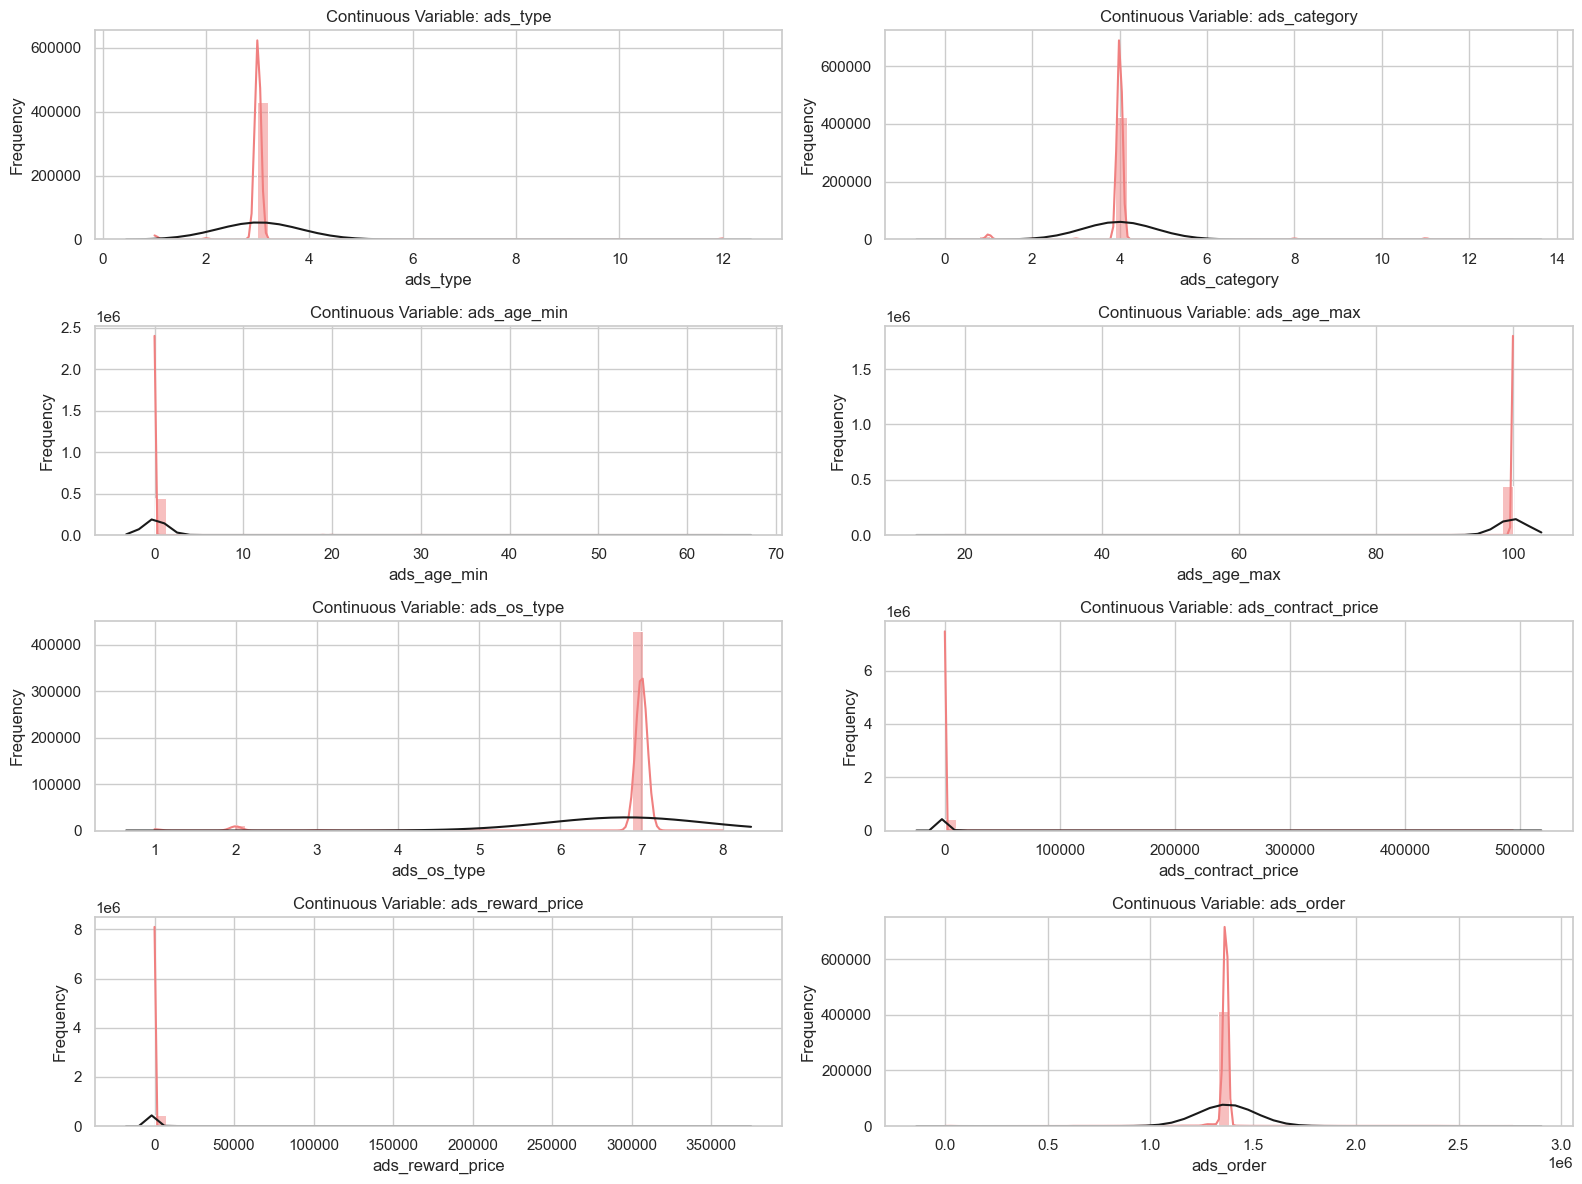

In [60]:
check_distribution(ad_list)

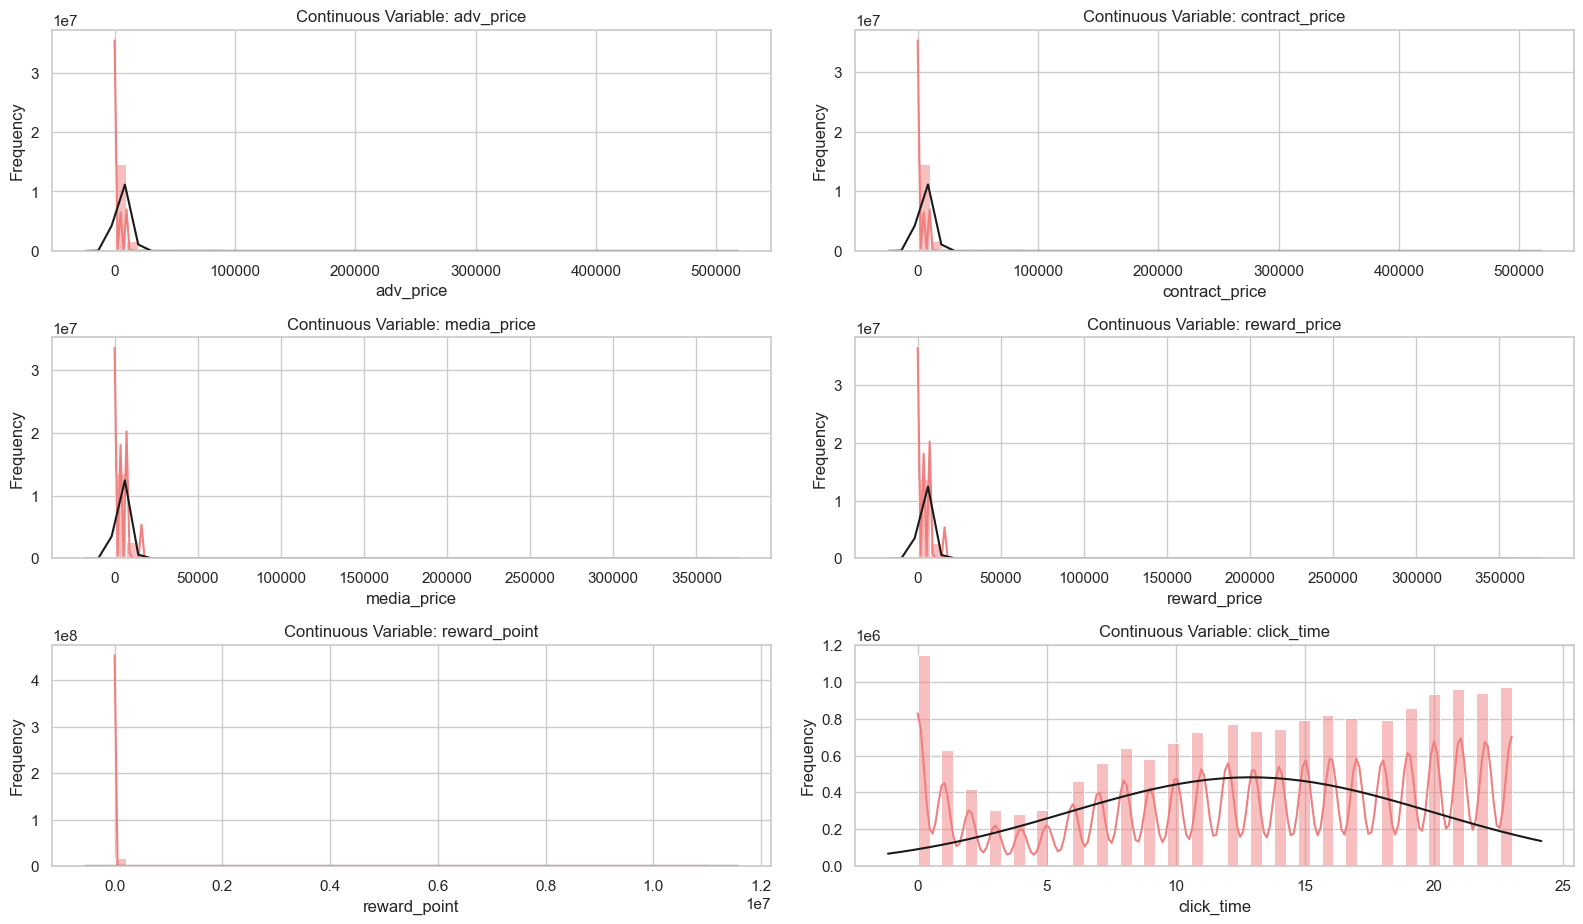

In [48]:
check_distribution(ad_prpt)

In [54]:
pd.set_option('display.float_format', lambda x: f'{x:f}')

In [55]:
num_df = ad_prpt.select_dtypes(exclude='object')
num_df.loc[:, ~(num_df.columns.str.endswith(("id", "idx")))].describe()


,adv_price,contract_price,media_price,reward_price,reward_point,click_time
count,16854865.000000,16854865.000000,16854865.000000,16854865.000000,16854865.000000,16854865.000000
mean,6283.320802,6281.525951,4573.291732,4570.412112,4869.613278,12.892637
std,6096.555848,6096.320462,3882.894610,3885.034346,15804.368484,7.062190
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,3600.000000,3600.000000,2700.000000,2700.000000,2700.000000,8.000000
50%,6000.000000,6000.000000,4500.000000,4500.000000,4500.000000,14.000000
75%,6000.000000,6000.000000,4500.000000,4500.000000,4500.000000,19.000000
max,493636.000000,493636.000000,357300.000000,357300.000000,11025000.000000,23.000000


In [62]:
ad_list.isnull().sum() / ad_list.shape[0]

ads_idx              0.000000
ads_code             0.000000
aff_idx              0.000000
adv_idx              0.000000
sch_idx              0.000000
ads_type             0.000000
ads_category         0.000000
ads_name             0.000000
ads_search           0.000004
ads_icon_img         0.000011
ads_summary          0.015858
ads_guide            0.000681
ads_limit            0.998780
ads_payment          0.994756
ads_save_way         0.001154
ads_day_cap          0.000000
ads_sdate            0.000000
ads_edate            0.000000
ads_package          0.974707
ads_sex_type         0.999978
ads_age_min          0.000000
ads_age_max          0.000000
ads_os_type          0.000000
ads_contract_price   0.000000
ads_reward_price     0.000000
ads_order            0.000000
ads_rejoin_type      0.000000
ads_require_adid     0.000000
regdate              0.000000
delyn                0.000000
dtype: float64

In [64]:
ad_list.delyn.nunique()

2

In [ ]:
ad_list[ad_list.delyn == 'Y', ['', 'regdate']]

,ads_idx,ads_code,aff_idx,adv_idx,sch_idx,ads_type,ads_category,ads_name,ads_search,ads_icon_img,...,ads_age_min,ads_age_max,ads_os_type,ads_contract_price,ads_reward_price,ads_order,ads_rejoin_type,ads_require_adid,regdate,delyn
7,1142,zQ76Efhdj3,9,0,0,3,0,데저트스톰_사전예약(desert_storm_cpa),"데저트스톰_사전예약(desert_storm_cpa),,3281",http://img.shallweadcorp.com/AdImage/Campaign_...,...,0,100,2,650,590,22100,NONE,Y,2017-01-05 11:31:16,Y
14,1180,ngo2OKJYga,0,32,0,1,1,지하철종결자,"지하철종결자,kakao44c6187801b61d99667c6c68852ed5a3://,",https://lh5.ggpht.com/1Wpnz4mt5wYxilWF2njQtc2w...,...,0,100,1,1,1,987900,NONE,Y,2017-01-11 16:47:10,Y
26,1220,YAxjTA2iP5,1,64,0,1,1,메탈크래쉬,"메탈크래쉬,com.chaplingame.metal.kor,",http://imgur.com/is9g8KQ,...,0,100,3,200,150,988900,NONE,Y,2017-01-19 18:34:22,Y
456,2039,28SaZM6shd,6,10,6652,3,0,핀크 가입 이벤트,"핀크 가입 이벤트,com.finnq.f1,adc608c9f297e0a4fd202a7...",https://lh3.googleusercontent.com/KgthZ-ko-J1W...,...,0,100,3,700,595,670700,NONE,Y,2017-12-08 15:06:55,Y
475,2058,yGoECaidUz,1,84,0,1,1,변호사님닷컴,"변호사님닷컴,,",https://i.imgur.com/nQs6SP5.png,...,0,100,1,190,150,1005400,NONE,Y,2017-12-15 13:21:11,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439413,441072,VPtZb3BS8m,57,84,0,3,8,[클릭메이트-단골맺기] 홍선수,"[클릭메이트-단골맺기] 홍선수,af85d514-917f-40d7-bc0d-25ed3...",https://s3.ap-northeast-2.amazonaws.com/com.ga...,...,0,100,7,200,150,2757200,NONE,Y,2025-08-06 14:16:36,Y
440342,442001,E5RRhoL1eT,8,50,0,1,2,초월자 키우기,"초월자 키우기,com.playgames.transcender,75246003",https://static.adbrix.igaworks.com/adpopcorn/2...,...,0,100,2,170,120,2758500,NONE,Y,2025-08-08 16:54:36,Y
442692,444351,dY7jZ77yka,15,1672,1218845,1,2,[원스토어] 조조의 꿈,"[원스토어] 조조의 꿈,com.teamquest.Threekingdoms_GP",https://i.imgur.com/TYzuYah.jpeg,...,0,100,3,180,120,2760700,NONE,Y,2025-08-14 15:33:46,Y
442693,444352,MnWcfxDVbK,15,1672,1218853,2,2,조조의 꿈,조조의 꿈,https://i.imgur.com/TYzuYah.jpeg,...,0,100,1,280,180,2760800,NONE,Y,2025-08-14 15:33:53,Y


In [ ]:
ad_list[ad_list['ads_idx'] == 437715]

,ads_idx,ads_code,aff_idx,adv_idx,sch_idx,ads_type,ads_category,ads_name,ads_search,ads_icon_img,...,ads_age_min,ads_age_max,ads_os_type,ads_contract_price,ads_reward_price,ads_order,ads_rejoin_type,ads_require_adid,regdate,delyn
436056,437715,y7IrR5YIaQ,1,1615,1205539,12,11,동국헬스케어 힘센 파워코끼리 3000(60포),동국헬스케어 힘센 파워코끼리 3000(60포),https://i.imgur.com/DgGgReN.jpeg,...,0,100,7,493636,320800,1545501,REJOINABLE,N,2025-07-28 13:36:13,N


In [61]:
num_df[num_df['ads_idx'] == 429487]

,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,adv_price,contract_price,media_price,reward_price,reward_point,click_time
18031,429487,0,980,1,252560,252560,10200,10200,2040000,15
19922,429487,0,980,1,252560,252560,10200,10200,1020000,11
35998,429487,0,980,1,252560,252560,10200,10200,1020000,3
52778,429487,0,980,1,252560,252560,10200,10200,1020000,7
69405,429487,0,980,1,252560,252560,10200,10200,2040000,12
...,...,...,...,...,...,...,...,...,...,...
16794209,429487,0,980,1,252560,252560,10200,10200,2040000,15
16795011,429487,0,980,1,252560,252560,10200,10200,1020000,14
16799456,429487,0,980,1,252560,252560,10200,10200,1020000,19
16847802,429487,0,980,1,252560,252560,10200,10200,1020000,6


In [ ]:
ad_list['ads_save_way']

In [58]:
num_df[num_df['contract_price'] == 493636]

,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,adv_price,contract_price,media_price,reward_price,reward_point,click_time
427302,437715,61484804,54,144678214,493636,493636,320800,320800,320800,12
858292,437715,61010824,54,144678813,493636,493636,320800,320800,320800,14
1162825,437715,61784263,54,144678240,493636,493636,320800,320800,320800,0
1245280,437715,61777590,54,144678228,493636,493636,320800,320800,320800,19
2713687,437715,61769667,54,144678219,493636,493636,320800,320800,320800,16
3813016,437715,56785191,54,144681043,493636,493636,320800,320800,320800,21
4132460,437715,53234104,54,144682060,493636,493636,320800,320800,320800,0
4443620,437715,59515108,54,144582477,493636,493636,320800,320800,320800,2
4461308,437715,60910352,54,144632887,493636,493636,320800,320800,320800,23
4860696,437715,61749744,54,144677818,493636,493636,320800,320800,320800,16


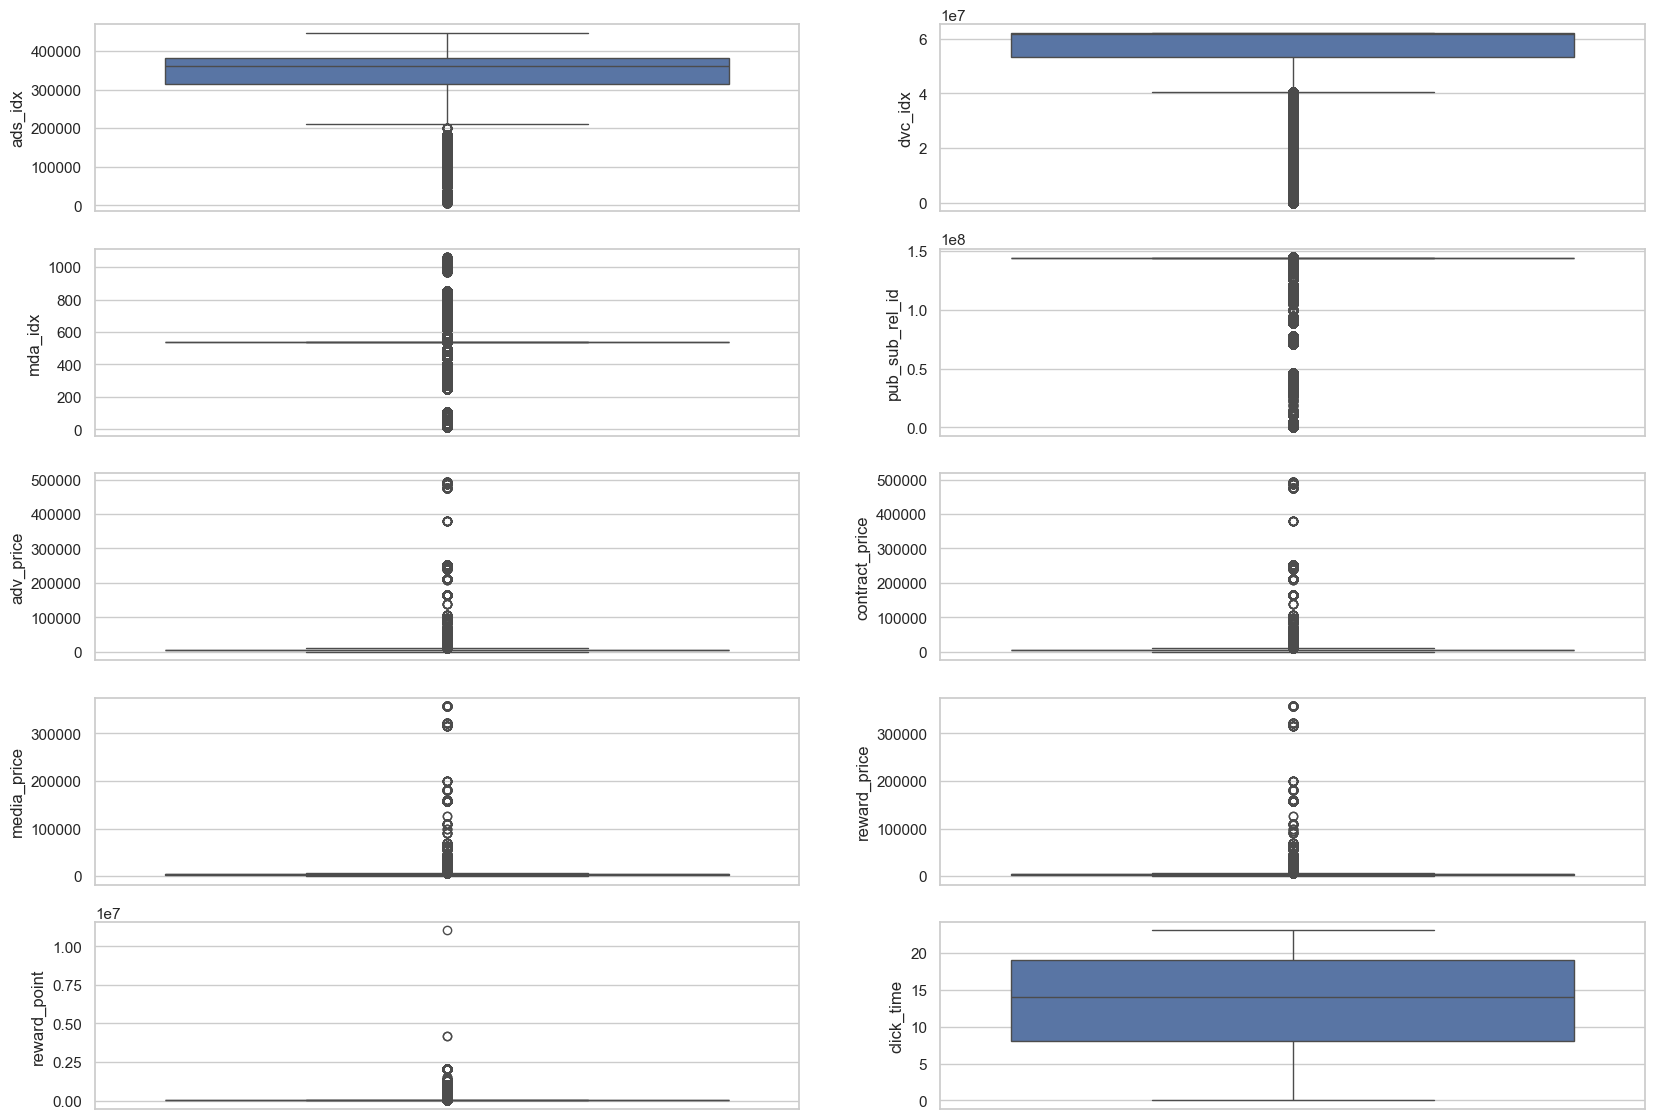

In [51]:
plt.figure(figsize=(20, 17))
continuous_vars = ad_prpt.select_dtypes(exclude='object').columns.to_list()
for i, var in enumerate(continuous_vars):
    plt.subplot(6, 2, i + 1)
    sns.boxplot(ad_prpt[var])

# plt.tight_layout()
    # plt.savefig('image/histogram_sehee_cn.png', dpi=150)
plt.show()

# 시간별 적립 보고서

In [24]:
time_earn = pd.read_csv("/Users/t2023-m0052/Documents/GitHub/final_project/data/수정_시간별적립보고서.csv")
time_earn.head()

,rpt_time_date,rpt_time_time,ads_idx,mda_idx,rpt_time_clk,rpt_time_turn,rpt_time_acost,rpt_time_earn,weekday,week_type
0,2025-07-27,0,11059,398,5,0,0,0,6,주말
1,2025-07-27,0,13209,583,3,0,0,0,6,주말
2,2025-07-27,0,13928,303,3,3,510,360,6,주말
3,2025-07-27,0,13928,324,3,3,510,360,6,주말
4,2025-07-27,0,13928,340,6,6,1020,720,6,주말


In [25]:
time_earn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279916 entries, 0 to 279915
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   rpt_time_date   279916 non-null  object
 1   rpt_time_time   279916 non-null  int64 
 2   ads_idx         279916 non-null  int64 
 3   mda_idx         279916 non-null  int64 
 4   rpt_time_clk    279916 non-null  int64 
 5   rpt_time_turn   279916 non-null  int64 
 6   rpt_time_acost  279916 non-null  int64 
 7   rpt_time_earn   279916 non-null  int64 
 8   weekday         279916 non-null  int64 
 9   week_type       279916 non-null  object
dtypes: int64(8), object(2)
memory usage: 21.4+ MB


In [141]:
time_earn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279916 entries, 0 to 279915
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   rpt_time_date   279916 non-null  datetime64[ns]
 1   rpt_time_time   279916 non-null  int64         
 2   ads_idx         279916 non-null  int64         
 3   mda_idx         279916 non-null  int64         
 4   rpt_time_clk    279916 non-null  int64         
 5   rpt_time_turn   279916 non-null  int64         
 6   rpt_time_acost  279916 non-null  int64         
 7   rpt_time_earn   279916 non-null  int64         
 8   weekday         279916 non-null  int64         
 9   week_type       279916 non-null  object        
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 21.4+ MB


In [138]:
time_earn.isnull().sum()

rpt_time_date     0
rpt_time_time     0
ads_idx           0
mda_idx           0
rpt_time_clk      0
rpt_time_turn     0
rpt_time_acost    0
rpt_time_earn     0
weekday           0
week_type         0
dtype: int64

In [140]:
time_earn['rpt_time_date'] = pd.to_datetime(time_earn['rpt_time_date'])

In [ ]:
time_earn['weekday'] # 0:월 ~ 6:일

0         6
1         6
2         6
3         6
4         6
         ..
279911    0
279912    0
279913    0
279914    0
279915    0
Name: weekday, Length: 279916, dtype: int64

In [147]:
new_ad_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445260 entries, 0 to 445259
Data columns (total 26 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   ads_idx             445260 non-null  int64 
 1   ads_code            445260 non-null  object
 2   aff_idx             445260 non-null  int64 
 3   adv_idx             445260 non-null  int64 
 4   sch_idx             445260 non-null  int64 
 5   ads_type            445260 non-null  int64 
 6   ads_category        445260 non-null  int64 
 7   ads_name            445260 non-null  object
 8   ads_search          445258 non-null  object
 9   ads_icon_img        445255 non-null  object
 10  ads_summary         438199 non-null  object
 11  ads_guide           444957 non-null  object
 12  ads_save_way        444746 non-null  object
 13  ads_day_cap         445260 non-null  object
 14  ads_sdate           445260 non-null  object
 15  ads_edate           445260 non-null  object
 16  ad

In [151]:
time_earn_m = time_earn.merge(new_ad_list, on = 'ads_idx', how = 'left')
time_earn_m

,rpt_time_date,rpt_time_time,ads_idx,mda_idx,rpt_time_clk,rpt_time_turn,rpt_time_acost,rpt_time_earn,weekday,week_type,...,ads_age_min,ads_age_max,ads_os_type,ads_contract_price,ads_reward_price,ads_order,ads_rejoin_type,ads_require_adid,regdate,delyn
0,2025-07-27,0,11059,398,5,0,0,0,6,주말,...,0,100,2,300,200,2097400,NONE,Y,2021-05-03 17:23:00,N
1,2025-07-27,0,13209,583,3,0,0,0,6,주말,...,0,100,2,1900,1425,2496600,NONE,Y,2021-10-01 17:29:29,N
2,2025-07-27,0,13928,303,3,3,510,360,6,주말,...,0,100,2,170,120,2758000,NONE,Y,2021-11-12 10:07:45,N
3,2025-07-27,0,13928,324,3,3,510,360,6,주말,...,0,100,2,170,120,2758000,NONE,Y,2021-11-12 10:07:45,N
4,2025-07-27,0,13928,340,6,6,1020,720,6,주말,...,0,100,2,170,120,2758000,NONE,Y,2021-11-12 10:07:45,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279911,2025-08-25,11,446855,563,15,2,36,28,0,주중,...,0,100,7,18,12,1369916,ADS_CODE_DAILY_UPDATE,Y,2025-08-25 00:14:50,N
279912,2025-08-25,11,446902,270,1,0,0,0,0,주중,...,0,100,7,200,150,2735900,NONE,Y,2025-08-25 10:06:15,N
279913,2025-08-25,11,446909,562,3,2,36,28,0,주중,...,0,100,7,18,12,1369925,ADS_CODE_DAILY_UPDATE,Y,2025-08-25 10:42:19,N
279914,2025-08-25,11,446909,563,51,7,126,98,0,주중,...,0,100,7,18,12,1369925,ADS_CODE_DAILY_UPDATE,Y,2025-08-25 10:42:19,N


In [155]:
time_earn_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279916 entries, 0 to 279915
Data columns (total 35 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   rpt_time_date       279916 non-null  datetime64[ns]
 1   rpt_time_time       279916 non-null  int64         
 2   ads_idx             279916 non-null  int64         
 3   mda_idx             279916 non-null  int64         
 4   rpt_time_clk        279916 non-null  int64         
 5   rpt_time_turn       279916 non-null  int64         
 6   rpt_time_acost      279916 non-null  int64         
 7   rpt_time_earn       279916 non-null  int64         
 8   weekday             279916 non-null  int64         
 9   week_type           279916 non-null  object        
 10  ads_code            279916 non-null  object        
 11  aff_idx             279916 non-null  int64         
 12  adv_idx             279916 non-null  int64         
 13  sch_idx             279916 no

In [152]:
time_earn_m.isna().sum()

rpt_time_date          0
rpt_time_time          0
ads_idx                0
mda_idx                0
rpt_time_clk           0
rpt_time_turn          0
rpt_time_acost         0
rpt_time_earn          0
weekday                0
week_type              0
ads_code               0
aff_idx                0
adv_idx                0
sch_idx                0
ads_type               0
ads_category           0
ads_name               0
ads_search             0
ads_icon_img           0
ads_summary           94
ads_guide              2
ads_save_way           0
ads_day_cap            0
ads_sdate              0
ads_edate              0
ads_age_min            0
ads_age_max            0
ads_os_type            0
ads_contract_price     0
ads_reward_price       0
ads_order              0
ads_rejoin_type        0
ads_require_adid       0
regdate                0
delyn                  0
dtype: int64

In [164]:
import platform
import matplotlib.pyplot as plt

In [165]:
# 운영체제 확인
system_name = platform.system()

# OS별 폰트 설정
if system_name == 'Windows':
    plt.rc('font', family='Malgun Gothic')  # 윈도우용
elif system_name == 'Darwin':  # macOS
    plt.rc('font', family='AppleGothic')
elif system_name == 'Linux':
    plt.rc('font', family='NanumGothic')  # 설치 필요할 수도 있음
else:
    print(f"Unknown OS: {system_name}. Set font manually if needed.")


# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [178]:
time_earn_m['rpt_time_cost_diff'] = time_earn_m['rpt_time_acost'] - time_earn_m['rpt_time_earn']

In [180]:
time_earn_m['ads_category'] = time_earn_m['ads_category'].astype('string')

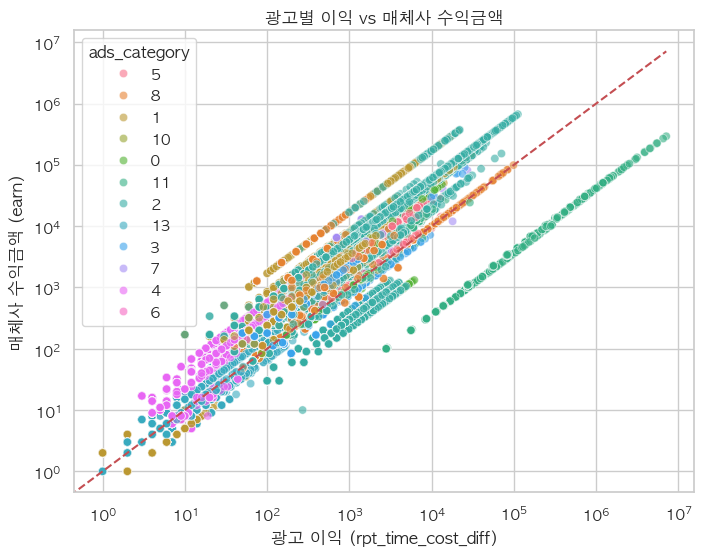

In [190]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=time_earn_m['rpt_time_cost_diff'],
                y=time_earn_m['rpt_time_earn'],
                hue=time_earn_m['ads_category'],
                alpha=0.6)

# 손익분기선 추가
max_val = max(time_earn_m['rpt_time_cost_diff'].max(), time_earn_m['rpt_time_earn'].max())
plt.plot([0, max_val], [0, max_val], 'r--')

plt.xscale('log')
plt.yscale('log')

plt.xlabel("광고 이익 (rpt_time_cost_diff)")
plt.ylabel("매체사 수익금액 (earn)")
plt.title("광고별 이익 vs 매체사 수익금액")
plt.show()

In [168]:
time_earn_m['rpt_time_clk'].describe()

count   279916.000000
mean        59.938571
std       1046.172540
min          0.000000
25%          1.000000
50%          3.000000
75%          7.000000
max      32620.000000
Name: rpt_time_clk, dtype: float64

In [ ]:
time_earn_m['cvr'] =  time_earn_m['rpt_time_turn']/time_earn_m['rpt_time_clk']

In [200]:
gr_ct = time_earn_m.groupby('ads_category')[['rpt_time_turn', 'rpt_time_clk']].sum().reset_index()
gr_ct['total_ctr'] = gr_ct['rpt_time_turn']/gr_ct['rpt_time_clk']
gr_ct = gr_ct.sort_values('total_ctr', ascending=False)
gr_ct

,ads_category,rpt_time_turn,rpt_time_clk,total_ctr
4,13,23144,29814,0.776280
7,4,253351,438305,0.578024
0,0,68030,126741,0.536764
6,3,41385,106109,0.390023
5,2,863084,2606106,0.331178
1,1,164478,559025,0.294223
3,11,5579,20407,0.273387
9,6,3838,16475,0.232959
11,8,16440,209652,0.078416
10,7,265,14895,0.017791


<Axes: xlabel='ads_category', ylabel='total_ctr'>

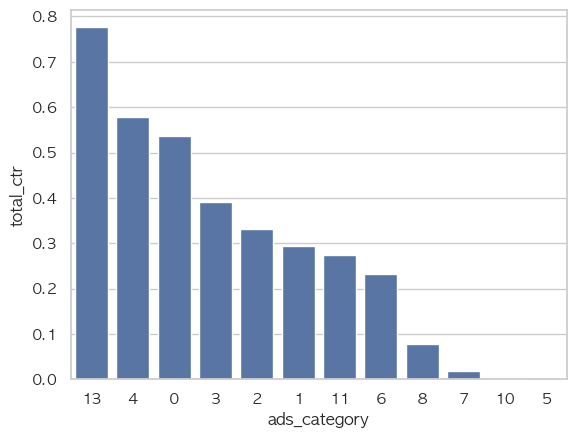

In [202]:
sns.barplot(x=gr_ct['ads_category'],
                y=gr_ct['total_ctr'])

In [196]:
time_earn_m.groupby('ads_category')['cvr'].median()

ads_category
0    0.866667
1    0.000000
10   0.000000
11   0.000000
13   1.000000
2    0.770886
3    0.400000
4    0.666667
5    0.000000
6    0.000000
7    0.000000
8    0.000000
Name: cvr, dtype: float64

In [ ]:
gr_ct = time_earn_m.groupby('ads_category')
sns.barplot(x=time_earn_m['rpt_time_date'],
                y=time_earn_m['rpt_time_earn'],
                alpha=0.6)

In [172]:
time_earn_m['cvr'].isnull().sum()

np.int64(0)

In [169]:
time_earn_m[time_earn_m['rpt_time_clk'] <= 10].shape[0]

230379

In [154]:
import pygwalker as pyg
gwalker = pyg.walk(time_earn_m)

Box(children=(HTML(value='\n<div id="ifr-pyg-00063db90c9973aapS03nmf651INFjzJ" style="height: auto">\n    <hea…

# 매체사 클러스터링

In [4]:
part_earn = pd.read_csv('/Users/t2023-m0052/Documents/GitHub/final_project/data/참여적립조인.csv')
part_earn.head() 

,Unnamed: 0,click_key,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,contract_price,media_price,click_day,click_time,...,network,user_ip,rwd_idx,ads_code,advid,adv_cost,earn_cost,regdate,ctit,conversion
0,0,000000d54b9faad47ee99d6cd3cf53894dd4baa5,313780,61906528,539,144350110,6000,4500,2025-08-17,21,...,0,16.184.28.219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1,000002b4d92f7648b455877c2676452efcd22a09,412426,34422806,58,46032732,180,170,2025-07-26,2,...,NaN,35.78.117.76,238313226.0,yuRe4YoPuZ,40ceb01c-9b60-4452-bacd-0e061fb18ab4,180.0,170.0,2025-07-26 02:19:21,57.0,1
2,2,0000057e97361ff3d0263aaecee34cfaa3ba30fb,443660,38366075,808,1,170,120,2025-08-12,18,...,WIFI,39.7.55.192,239017177.0,WuIp8HKmt9,73793f44-a471-4351-ae1c-d09accaf223a,170.0,120.0,2025-08-12 18:19:21,82.0,1
3,3,00000607f60139015da3ee1dd5499db3faa100dc,360192,61894110,539,144350110,6000,4500,2025-08-17,3,...,0,211.252.100.157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4,0000066bc25d4a6d147c27326cf972a4de88024e,372307,61956954,539,144350110,15600,11700,2025-08-18,8,...,0,3.38.148.211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [5]:
part_earn

,Unnamed: 0,click_key,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,contract_price,media_price,click_day,click_time,...,network,user_ip,rwd_idx,ads_code,advid,adv_cost,earn_cost,regdate,ctit,conversion
0,0,000000d54b9faad47ee99d6cd3cf53894dd4baa5,313780,61906528,539,144350110,6000,4500,2025-08-17,21,...,0,16.184.28.219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1,000002b4d92f7648b455877c2676452efcd22a09,412426,34422806,58,46032732,180,170,2025-07-26,2,...,NaN,35.78.117.76,238313226.0,yuRe4YoPuZ,40ceb01c-9b60-4452-bacd-0e061fb18ab4,180.0,170.0,2025-07-26 02:19:21,57.0,1
2,2,0000057e97361ff3d0263aaecee34cfaa3ba30fb,443660,38366075,808,1,170,120,2025-08-12,18,...,WIFI,39.7.55.192,239017177.0,WuIp8HKmt9,73793f44-a471-4351-ae1c-d09accaf223a,170.0,120.0,2025-08-12 18:19:21,82.0,1
3,3,00000607f60139015da3ee1dd5499db3faa100dc,360192,61894110,539,144350110,6000,4500,2025-08-17,3,...,0,211.252.100.157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4,0000066bc25d4a6d147c27326cf972a4de88024e,372307,61956954,539,144350110,15600,11700,2025-08-18,8,...,0,3.38.148.211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16854860,16854860,fffff9f3a33b1596ae3216eaee20a9fe383b4778,264409,37945741,539,144350110,5400,3800,2025-08-16,23,...,0,122.32.24.115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
16854861,16854861,fffffb2a049908716493ba68a0754633949a9e02,369816,57367216,539,144350110,3600,2700,2025-08-18,15,...,0,13.125.212.103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
16854862,16854862,fffffc10523f96c3a470ef1c9ad6b930cb5d27b5,444350,61242190,58,33306660,180,170,2025-08-20,1,...,NaN,43.206.110.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
16854863,16854863,fffffcdccdba2775b47c2f01b9659decad98419f,360192,61903879,539,144350110,6000,4500,2025-08-15,12,...,0,115.40.102.142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [6]:
domain = pd.read_csv("/Users/t2023-m0052/Documents/GitHub/final_project/data/광고도메인리스트.csv")
domain.head()

,Unnamed: 0,ads_idx,ads_code,aff_idx,adv_idx,ads_type,ads_category,ads_name,ads_icon_img,ads_summary,...,ads_edate,ads_age_min,ads_age_max,ads_os_type,ads_contract_price,ads_reward_price,ads_order,ads_rejoin_type,regdate,domain
0,0,6508,3u4lOKJAek,13,335,3,10,스마트피싱보호,https://seimg.pincrux.com/icon/1551770735.png,"[상품소개]\n알면 피하고, 모르면 당하는 보이스피싱\n나와 소중한 가족을 안전하게...",...,9999-12-31 00:00:00,0,100,7,1400,1100,2381500,NONE,2020-04-23 17:53:01 UTC,금융
1,1,6985,SijDrtH4GV,13,335,3,7,DB손해보험 다이렉트,https://seimg.pincrux.com/icon/1575337232.jpg,[참여방법]\n- 빠르고 간편한 DB손해보험 다이렉트에서\n- 내 차 보험료를 지금...,...,9999-06-06 00:00:00,0,100,7,2700,2300,1201938,NONE,2020-06-30 15:22:59 UTC,금융
2,2,8327,k1RZftVHoW,13,335,3,10,파일썬,https://static.i-screen.kr/img/ad/icon/aff_13_...,[참여 방법]\n1. 광고 참여 버튼 터치하여 이벤트 페이지로 이동\n2. 이벤트 ...,...,9999-12-31 23:59:00,0,100,7,3200,2420,1673458,NONE,2020-11-10 11:21:43 UTC,미디어/컨텐츠
3,3,9264,EGZcaVOtlc,23,220,3,10,하나 가득담은 운전자보험가입,https://i.imgur.com/kaWiYyT.png,하나손해보험 다이렉트 운전자보험 가입시\n\n01.참여방법\n1) 계산하기 페이지를...,...,9999-12-31 23:59:59,0,100,7,11000,8250,2372800,NONE,2020-11-30 15:16:45 UTC,금융
4,4,9716,NwZZq45Kgb,6,10,3,8,베이비러브 참여 신청,https://nextapps-nas.aws.appang.kr/icon/SDl2uC...,[참여방법]\n- 페이지 이동 > 베이버러브 참여신청 완료\n- 25-55세 SKT...,...,2029-11-29 00:00:00,25,55,2,600,480,2699900,NONE,2021-01-11 16:11:27 UTC,생활


In [7]:
domain.columns

Index(['Unnamed: 0', 'ads_idx', 'ads_code', 'aff_idx', 'adv_idx', 'ads_type',
       'ads_category', 'ads_name', 'ads_icon_img', 'ads_summary',
       'ads_save_way', 'ads_day_cap', 'ads_sdate', 'ads_edate', 'ads_age_min',
       'ads_age_max', 'ads_os_type', 'ads_contract_price', 'ads_reward_price',
       'ads_order', 'ads_rejoin_type', 'regdate', 'domain'],
      dtype='object')

In [8]:
cl_domain = domain.drop(['Unnamed: 0','ads_icon_img', 'ads_summary', #'ads_sdate', 
                         'ads_age_min', 'ads_age_max',  'ads_contract_price', 'ads_reward_price'], axis = 1)

In [9]:
cl_domain.columns

Index(['ads_idx', 'ads_code', 'aff_idx', 'adv_idx', 'ads_type', 'ads_category',
       'ads_name', 'ads_save_way', 'ads_day_cap', 'ads_sdate', 'ads_edate',
       'ads_os_type', 'ads_order', 'ads_rejoin_type', 'regdate', 'domain'],
      dtype='object')

In [10]:
part_earn.columns

Index(['Unnamed: 0', 'click_key', 'ads_idx', 'dvc_idx', 'mda_idx',
       'pub_sub_rel_id', 'contract_price', 'media_price', 'click_day',
       'click_time', 'click_date', 'exp_day', 'network', 'user_ip', 'rwd_idx',
       'ads_code', 'advid', 'adv_cost', 'earn_cost', 'regdate', 'ctit',
       'conversion'],
      dtype='object')

In [11]:
cl_part_earn = part_earn.drop(['Unnamed: 0', 'click_key', 'click_day', 'regdate'], axis=1)

In [12]:
cl_part_earn.columns

Index(['ads_idx', 'dvc_idx', 'mda_idx', 'pub_sub_rel_id', 'contract_price',
       'media_price', 'click_time', 'click_date', 'exp_day', 'network',
       'user_ip', 'rwd_idx', 'ads_code', 'advid', 'adv_cost', 'earn_cost',
       'ctit', 'conversion'],
      dtype='object')

In [13]:
cl_part_earn.isnull().sum()

ads_idx                  0
dvc_idx                  0
mda_idx                  0
pub_sub_rel_id           0
contract_price           0
media_price              0
click_time               0
click_date               0
exp_day                  0
network            2501362
user_ip                  9
rwd_idx           15379915
ads_code          15379915
advid             15387086
adv_cost          15379915
earn_cost         15379915
ctit              15379915
conversion               0
dtype: int64

In [14]:
cl_domain.columns

Index(['ads_idx', 'ads_code', 'aff_idx', 'adv_idx', 'ads_type', 'ads_category',
       'ads_name', 'ads_save_way', 'ads_day_cap', 'ads_sdate', 'ads_edate',
       'ads_os_type', 'ads_order', 'ads_rejoin_type', 'regdate', 'domain'],
      dtype='object')

In [74]:
machesa = cl_part_earn.merge(cl_domain, on = ['ads_idx'], how='left')

In [75]:
machesa.columns

Index(['ads_idx', 'dvc_idx', 'mda_idx', 'pub_sub_rel_id', 'contract_price',
       'media_price', 'click_time', 'click_date', 'exp_day', 'network',
       'user_ip', 'rwd_idx', 'ads_code_x', 'advid', 'adv_cost', 'earn_cost',
       'ctit', 'conversion', 'ads_code_y', 'aff_idx', 'adv_idx', 'ads_type',
       'ads_category', 'ads_name', 'ads_save_way', 'ads_day_cap', 'ads_sdate',
       'ads_edate', 'ads_os_type', 'ads_order', 'ads_rejoin_type', 'regdate',
       'domain'],
      dtype='object')

In [76]:
machesa.isnull().sum() / machesa.shape[0]

ads_idx           0.00000
dvc_idx           0.00000
mda_idx           0.00000
pub_sub_rel_id    0.00000
contract_price    0.00000
media_price       0.00000
click_time        0.00000
click_date        0.00000
exp_day           0.00000
network           0.14841
user_ip           0.00000
rwd_idx           0.91249
ads_code_x        0.91249
advid             0.91292
adv_cost          0.91249
earn_cost         0.91249
ctit              0.91249
conversion        0.00000
ads_code_y        0.00000
aff_idx           0.00000
adv_idx           0.00000
ads_type          0.00000
ads_category      0.00000
ads_name          0.00000
ads_save_way      0.00000
ads_day_cap       0.00000
ads_sdate         0.00000
ads_edate         0.00000
ads_os_type       0.00000
ads_order         0.00000
ads_rejoin_type   0.00000
regdate           0.00000
domain            0.00000
dtype: float64

In [77]:
machesa.drop(['ads_code_x'], axis = 1, inplace=True)

In [78]:
machesa.rename(columns={"ads_code_y":"ads_code"}, inplace=True)

In [79]:
machesa.columns

Index(['ads_idx', 'dvc_idx', 'mda_idx', 'pub_sub_rel_id', 'contract_price',
       'media_price', 'click_time', 'click_date', 'exp_day', 'network',
       'user_ip', 'rwd_idx', 'advid', 'adv_cost', 'earn_cost', 'ctit',
       'conversion', 'ads_code', 'aff_idx', 'adv_idx', 'ads_type',
       'ads_category', 'ads_name', 'ads_save_way', 'ads_day_cap', 'ads_sdate',
       'ads_edate', 'ads_os_type', 'ads_order', 'ads_rejoin_type', 'regdate',
       'domain'],
      dtype='object')

In [80]:
machesa[['mda_idx', 'contract_price', 'media_price', 'adv_cost', 'earn_cost']]

,mda_idx,contract_price,media_price,adv_cost,earn_cost
0,539,6000,4500,NaN,NaN
1,58,180,170,180.00000,170.00000
2,808,170,120,170.00000,120.00000
3,539,6000,4500,NaN,NaN
4,539,15600,11700,NaN,NaN
...,...,...,...,...,...
16854860,539,5400,3800,NaN,NaN
16854861,539,3600,2700,NaN,NaN
16854862,58,180,170,NaN,NaN
16854863,539,6000,4500,NaN,NaN


In [81]:
machesa[['mda_idx', 'contract_price', 'media_price', 'adv_cost', 'earn_cost']].groupby('mda_idx').agg(['mean', 'median', 'sum', 'max', 'min'])

contract_price                                      media_price  \
                  mean      median        sum    max    min        mean   
mda_idx                                                                   
12           267.33525   180.00000   62138872   2000    130   211.07551   
14          1920.34239   230.00000  162773982  30000    170  1408.73966   
18         12072.96024  7800.00000   71966916  33600   1200  8736.87301   
22           333.19475   190.00000   27773448  33600    150   238.06373   
26          2366.75516   280.00000    1604660  20400    190  1716.62242   
...                ...         ...        ...    ...    ...         ...   
1050          16.00000    16.00000         16     16     16    11.00000   
1051           3.00000     3.00000          3      3      3     2.00000   
1055       19646.33333 14757.00000      58939  29425  14757   720.00000   
1059           2.00000     2.00000         12      2      2     2.00000   
1061          20.44444     5.00000        184    150      2    16.00000   

                                            adv_cost             \
            median        sum    max  min       mean     median   
mda_idx                                                           
12       150.00000   49061970   1000   90  195.08799  180.00000   
14       160.00000  119409000  22000  120  432.24805  190.00000   
18      5800.00000   52080500  25000  900 2868.06400 1200.00000   
22       150.00000   19843802  25000  100  244.24387  190.00000   
26       230.00000    1163870  14000  170  245.28571  280.00000   
...            ...        ...    ...  ...        ...        ...   
1050      11.00000         11     11   11   16.00000   16.00000   
1051       2.00000          2      2    2        NaN        NaN   
1055     515.00000       2160   1130  515        NaN        NaN   
1059       2.00000         12      2    2        NaN        NaN   
1061       5.00000        144    110    2    3.80000    5.00000   

                                               earn_cost            \
                   sum         max        min       mean    median   
mda_idx                                                              
12      16180208.00000  2000.00000  130.00000  158.87217 150.00000   
14       9934357.00000 30000.00000  170.00000  313.31027 150.00000   
18        717016.00000 21600.00000 1200.00000 2138.60000 900.00000   
22       8605200.00000 14000.00000  150.00000  172.10008 120.00000   
26         17170.00000   280.00000  190.00000  206.85714 230.00000   
...                ...         ...        ...        ...       ...   
1050          16.00000    16.00000   16.00000   11.00000  11.00000   
1051           0.00000         NaN        NaN        NaN       NaN   
1055           0.00000         NaN        NaN        NaN       NaN   
1059           0.00000         NaN        NaN        NaN       NaN   
1061          19.00000     5.00000    2.00000    3.80000   5.00000   

                                              
                   sum         max       min  
mda_idx                                       
12      13176540.00000  1000.00000  90.00000  
14       7200810.00000 22000.00000 120.00000  
18        534650.00000 16200.00000 900.00000  
22       6063430.00000 10500.00000 100.00000  
26         14480.00000   230.00000 170.00000  
...                ...         ...       ...  
1050          11.00000    11.00000  11.00000  
1051           0.00000         NaN       NaN  
1055           0.00000         NaN       NaN  
1059           0.00000         NaN       NaN  
1061          19.00000     5.00000   2.00000  

[189 rows x 20 columns]

### 2. 도메인 분포 만들기

In [24]:
domain_dummies = pd.get_dummies(machesa['domain'], prefix = "domain")
df_domain = pd.concat([machesa[['mda_idx']], domain_dummies], axis=1)
domain_features = df_domain.groupby('mda_idx').sum()
domain_features.isna().sum()

domain_게임         0
domain_교육         0
domain_금융         0
domain_기타         0
domain_미디어/컨텐츠    0
domain_뷰티         0
domain_비영리/공공     0
domain_생활         0
domain_식당/카페      0
domain_식음료        0
domain_운동/스포츠     0
domain_운세         0
domain_의료/건강      0
domain_채용         0
domain_커머스        0
dtype: int64

In [25]:
domain_features

,domain_게임,domain_교육,domain_금융,domain_기타,domain_미디어/컨텐츠,domain_뷰티,domain_비영리/공공,domain_생활,domain_식당/카페,domain_식음료,domain_운동/스포츠,domain_운세,domain_의료/건강,domain_채용,domain_커머스
mda_idx,,,,,,,,,,,,,,,
12,187866,0,3971,0,53,0,7300,1479,0,643,0,0,131,0,30995
14,38866,0,3560,57,15755,5941,0,6248,0,6437,0,0,4810,888,2201
18,3315,0,914,0,1070,0,0,617,0,0,0,0,0,0,45
22,37240,16,11756,0,15966,530,4813,2867,29,1138,367,40,2462,3156,2975
26,423,0,41,0,20,0,0,115,0,0,0,0,0,0,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1051,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1055,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0


In [26]:
domain_features.shape

(189, 15)

In [27]:
domain.head()

,Unnamed: 0,ads_idx,ads_code,aff_idx,adv_idx,ads_type,ads_category,ads_name,ads_icon_img,ads_summary,...,ads_edate,ads_age_min,ads_age_max,ads_os_type,ads_contract_price,ads_reward_price,ads_order,ads_rejoin_type,regdate,domain
0,0,6508,3u4lOKJAek,13,335,3,10,스마트피싱보호,https://seimg.pincrux.com/icon/1551770735.png,"[상품소개]\n알면 피하고, 모르면 당하는 보이스피싱\n나와 소중한 가족을 안전하게...",...,9999-12-31 00:00:00,0,100,7,1400,1100,2381500,NONE,2020-04-23 17:53:01 UTC,금융
1,1,6985,SijDrtH4GV,13,335,3,7,DB손해보험 다이렉트,https://seimg.pincrux.com/icon/1575337232.jpg,[참여방법]\n- 빠르고 간편한 DB손해보험 다이렉트에서\n- 내 차 보험료를 지금...,...,9999-06-06 00:00:00,0,100,7,2700,2300,1201938,NONE,2020-06-30 15:22:59 UTC,금융
2,2,8327,k1RZftVHoW,13,335,3,10,파일썬,https://static.i-screen.kr/img/ad/icon/aff_13_...,[참여 방법]\n1. 광고 참여 버튼 터치하여 이벤트 페이지로 이동\n2. 이벤트 ...,...,9999-12-31 23:59:00,0,100,7,3200,2420,1673458,NONE,2020-11-10 11:21:43 UTC,미디어/컨텐츠
3,3,9264,EGZcaVOtlc,23,220,3,10,하나 가득담은 운전자보험가입,https://i.imgur.com/kaWiYyT.png,하나손해보험 다이렉트 운전자보험 가입시\n\n01.참여방법\n1) 계산하기 페이지를...,...,9999-12-31 23:59:59,0,100,7,11000,8250,2372800,NONE,2020-11-30 15:16:45 UTC,금융
4,4,9716,NwZZq45Kgb,6,10,3,8,베이비러브 참여 신청,https://nextapps-nas.aws.appang.kr/icon/SDl2uC...,[참여방법]\n- 페이지 이동 > 베이버러브 참여신청 완료\n- 25-55세 SKT...,...,2029-11-29 00:00:00,25,55,2,600,480,2699900,NONE,2021-01-11 16:11:27 UTC,생활


In [28]:
## 확인 - 실제로 광고가 없는지
why_notin = [374, 710, 752, 755, 759, 766, 769, 774, 847, 1000, 1023, 1041, 1042, 1049, 1051, 1055, 1059, 1061]
notin_ads =  machesa.loc[machesa['mda_idx'].isin(why_notin), 'ads_idx'].unique()
print("고유값", notin_ads, "개수", len(notin_ads))
domain[domain['ads_idx'].isin(notin_ads)]


고유값 [243651  14074 436820 385454  13988  28781 133653 438955  72968 426584
 356956 264408  11059 173521   9982 168800 429011 438436  19488 364106
 438719 442776 439982 441181 435861 438226 371469 363720 363736  73878
 438972 441013 445023 385444 357653 438970 439137  31140 199677 168803
 435357 163183 117472 438927 426812  72969  20257 158724 363738  25850
  16529 441904 355220 438971 435910  27572 439985] 개수 57


,Unnamed: 0,ads_idx,ads_code,aff_idx,adv_idx,ads_type,ads_category,ads_name,ads_icon_img,ads_summary,...,ads_edate,ads_age_min,ads_age_max,ads_os_type,ads_contract_price,ads_reward_price,ads_order,ads_rejoin_type,regdate,domain
6,6,9982,ChpB9DGeNo,8,50,11,3,강원일보 네이버 뉴스,https://static.adbrix.igaworks.com/adpopcorn/2...,[참여방법]\n1.\'참여하기\' 버튼 터치하고 이벤트페이지로 이동\n2. 이벤트 ...,...,2030-01-01 00:00:00,0,100,7,230,160,2729900,NONE,2021-02-05 14:56:37 UTC,미디어/컨텐츠
24,24,11059,2vK6pADbON,8,50,3,5,파이널삼국지2,https://static.adbrix.igaworks.com/adpopcorn/2...,[참여 방법]\n1. 광고 참여 버튼 터치하여 마켓으로 이동\n2. APP 최초 내...,...,2027-01-01 00:00:00,0,100,2,300,200,2097400,NONE,2021-05-03 17:23:00 UTC,게임
32,32,13988,nTVtBN47OC,1,404,3,7,주식투자 정보서비스,https://i.imgur.com/N6KVHsQ.jpg,[참여 방법]\n1. 광고 참여 버튼 터치하여 이벤트 페이지로 이동\n2. 이벤트 ...,...,2030-01-01 00:00:00,0,100,7,6000,4500,1554607,NONE,2021-11-16 13:53:11 UTC,금융
34,34,14074,pA0PyJkkmv,1,998,3,8,오토링 광고 1회 참여,https://play-lh.googleusercontent.com/m5RNTCvq...,돈벌기 가장 쉬운 리워드어플 오토링입니다.\n적립이 매우 간단한 광고 \n천개이상 ...,...,2030-01-01 00:00:00,0,100,2,500,300,2642800,NONE,2021-11-19 15:40:45 UTC,금융
46,46,16529,Xbe2NCUyZ6,1,404,3,10,MyOTP,http://api.flexplatform.net/v1/get_ad_image.ph...,[참여 방법]\n1. 광고 참여 버튼 터치하여 이벤트 페이지로 이동\n2. 이벤트 ...,...,2027-01-01 00:00:00,0,100,7,1530,1000,2494900,NONE,2022-04-14 14:27:59 UTC,금융
64,64,19488,tBwR3QXYKy,8,50,11,3,광주방송 네이버 뉴스,https://i.imgur.com/73IZoOo.jpg,광주방송 네이버 뉴스 \'구독\'하면 리워드 지급\n* 7일 이내 \'구독\' 취소...,...,2030-01-01 00:00:00,0,100,2,230,160,2729100,NONE,2022-09-23 11:55:06 UTC,미디어/컨텐츠
72,72,20257,tjAoSt2zk7,1,1217,3,10,해외주식정보,https://i.ibb.co/fd5PVt7/image.png,참여 방법]\n1. 광고 참여 버튼 터치하여 이벤트 페이지로 이동\n2. 서비스 가...,...,2034-01-01 00:00:00,0,100,7,4000,2800,2592100,NONE,2022-11-08 18:51:22 UTC,금융
146,146,25850,u7ixSCx3K0,13,335,3,8,똑똑보카 룰렛이벤트!,https://seimg.pincrux.com/icon/1697000184.png,[참여 방법]\n1. 광고 참여 버튼 터치하여 이벤트 페이지로 이동\n2. 3초 퀴...,...,2029-11-29 00:00:00,0,100,2,100,70,2486800,NONE,2023-10-17 11:22:19 UTC,교육
158,158,27572,955oLvqtif,23,220,3,7,신한 SOL페이 퀴즈팡팡 퀴즈 풀면,https://i.imgur.com/D6tOnD7.png,퀴즈팡팡 OX퀴즈 (최근 1년 이상 신한 SOL페이(구 신한pLay)에 방문한 적이...,...,2029-11-28 00:00:00,0,100,7,600,450,2289200,NONE,2023-12-21 15:38:56 UTC,금융
192,192,28781,EdNKMDeUBj,1,1460,3,10,로보주식플러스,https://i.ibb.co/mFbMfcr/1-140x140.png,1. 광고 참여 버튼 터치하여 이벤트 페이지로 이동\n2. 이벤트 페이지 이동\n3...,...,2031-01-01 00:00:00,0,100,7,12000,10000,2682900,NONE,2024-02-20 10:39:15 UTC,금융


In [29]:
# 비율로 정규화
domain_features = domain_features.div(domain_features.sum(axis=1), axis=0)
domain_features

,domain_게임,domain_교육,domain_금융,domain_기타,domain_미디어/컨텐츠,domain_뷰티,domain_비영리/공공,domain_생활,domain_식당/카페,domain_식음료,domain_운동/스포츠,domain_운세,domain_의료/건강,domain_채용,domain_커머스
mda_idx,,,,,,,,,,,,,,,
12,0.808241,0.000000,0.017084,0.000000,0.000228,0.000000,0.031406,0.006363,0.000000,0.002766,0.000000,0.000000,0.000564,0.000000,0.133347
14,0.458526,0.000000,0.041999,0.000672,0.185871,0.070090,0.000000,0.073711,0.000000,0.075941,0.000000,0.000000,0.056746,0.010476,0.025967
18,0.556115,0.000000,0.153330,0.000000,0.179500,0.000000,0.000000,0.103506,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007549
22,0.446764,0.000192,0.141035,0.000000,0.191542,0.006358,0.057741,0.034395,0.000348,0.013652,0.004403,0.000480,0.029536,0.037862,0.035691
26,0.623894,0.000000,0.060472,0.000000,0.029499,0.000000,0.000000,0.169617,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.116519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
1051,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1055,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### 3. 광고유형 분포

In [30]:

type_dummies = pd.get_dummies(machesa['ads_type'], prefix='type')
df_type = pd.concat([machesa['mda_idx'], type_dummies], axis = 1)
type_features = df_type.groupby('mda_idx').sum()
type_features = type_features.div(type_features.sum(axis = 1), axis = 0)
type_features

,type_1,type_2,type_3,type_4,type_5,type_7,type_9,type_10,type_11,type_12
mda_idx,,,,,,,,,,
12,0.789712,0.099510,0.110752,0.0,0.000026,0.000000,0.0,0.00000,0.0,0.0
14,0.366280,0.106155,0.308106,0.0,0.044949,0.040230,0.0,0.13428,0.0,0.0
18,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0
22,0.493720,0.180409,0.288345,0.0,0.002447,0.035079,0.0,0.00000,0.0,0.0
26,0.126844,0.420354,0.452802,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1050,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0
1051,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0
1055,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.0,1.0


### 4. 광고 카테고리 분포

In [31]:
category_dummies = pd.get_dummies(machesa['ads_category'], prefix='category')
df_category = pd.concat([machesa['mda_idx'], category_dummies], axis = 1)
category_features = df_category.groupby('mda_idx').sum()
category_features = category_features.div(category_features.sum(axis = 1), axis = 0)
category_features

,category_0,category_1,category_2,category_3,category_4,category_5,category_6,category_7,category_8,category_10,category_11,category_13
mda_idx,,,,,,,,,,,,
12,0.055038,0.263231,0.570952,0.014748,0.0,0.000000,0.0,0.000000,0.096030,0.000000,0.0,0.000000
14,0.000000,0.202447,0.269988,0.250451,0.0,0.123002,0.0,0.000283,0.150455,0.003374,0.0,0.000000
18,0.000000,0.000000,0.000000,0.000000,0.0,0.660795,0.0,0.000000,0.334843,0.004362,0.0,0.000000
22,0.154484,0.066331,0.453338,0.092532,0.0,0.002675,0.0,0.003371,0.222482,0.004787,0.0,0.000000
26,0.000000,0.000000,0.547198,0.000000,0.0,0.234513,0.0,0.000000,0.206490,0.011799,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1050,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.000000
1051,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
1055,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.000000


### 5. 규모 정보 (합계 / 평균)

In [37]:
scale_features = machesa.groupby('mda_idx').agg({
    'contract_price':['mean', 'median', 'sum', 'max', 'min'],
    'media_price':['mean', 'median', 'sum', 'max', 'min'],
    'adv_cost': ['mean', 'median', 'sum', 'max', 'min'],
    'earn_cost':['mean', 'median', 'sum', 'max', 'min'],
    'ads_type':'count'
    })
scale_features

contract_price                                      media_price  \
                  mean      median        sum    max    min        mean   
mda_idx                                                                   
12           267.33525   180.00000   62138872   2000    130   211.07551   
14          1920.34239   230.00000  162773982  30000    170  1408.73966   
18         12072.96024  7800.00000   71966916  33600   1200  8736.87301   
22           333.19475   190.00000   27773448  33600    150   238.06373   
26          2366.75516   280.00000    1604660  20400    190  1716.62242   
...                ...         ...        ...    ...    ...         ...   
1050          16.00000    16.00000         16     16     16    11.00000   
1051           3.00000     3.00000          3      3      3     2.00000   
1055       19646.33333 14757.00000      58939  29425  14757   720.00000   
1059           2.00000     2.00000         12      2      2     2.00000   
1061          20.44444     5.00000        184    150      2    16.00000   

                                           ...   adv_cost                 \
            median        sum    max  min  ...     median            sum   
mda_idx                                    ...                             
12       150.00000   49061970   1000   90  ...  180.00000 16180208.00000   
14       160.00000  119409000  22000  120  ...  190.00000  9934357.00000   
18      5800.00000   52080500  25000  900  ... 1200.00000   717016.00000   
22       150.00000   19843802  25000  100  ...  190.00000  8605200.00000   
26       230.00000    1163870  14000  170  ...  280.00000    17170.00000   
...            ...        ...    ...  ...  ...        ...            ...   
1050      11.00000         11     11   11  ...   16.00000       16.00000   
1051       2.00000          2      2    2  ...        NaN        0.00000   
1055     515.00000       2160   1130  515  ...        NaN        0.00000   
1059       2.00000         12      2    2  ...        NaN        0.00000   
1061       5.00000        144    110    2  ...    5.00000       19.00000   

                                earn_cost                           \
                max        min       mean    median            sum   
mda_idx                                                              
12       2000.00000  130.00000  158.87217 150.00000 13176540.00000   
14      30000.00000  170.00000  313.31027 150.00000  7200810.00000   
18      21600.00000 1200.00000 2138.60000 900.00000   534650.00000   
22      14000.00000  150.00000  172.10008 120.00000  6063430.00000   
26        280.00000  190.00000  206.85714 230.00000    14480.00000   
...             ...        ...        ...       ...            ...   
1050       16.00000   16.00000   11.00000  11.00000       11.00000   
1051            NaN        NaN        NaN       NaN        0.00000   
1055            NaN        NaN        NaN       NaN        0.00000   
1059            NaN        NaN        NaN       NaN        0.00000   
1061        5.00000    2.00000    3.80000   5.00000       19.00000   

                              ads_type  
                max       min    count  
mda_idx                                 
12       1000.00000  90.00000   232438  
14      22000.00000 120.00000    84763  
18      16200.00000 900.00000     5961  
22      10500.00000 100.00000    83355  
26        230.00000 170.00000      678  
...             ...       ...      ...  
1050       11.00000  11.00000        1  
1051            NaN       NaN        1  
1055            NaN       NaN        3  
1059            NaN       NaN        6  
1061        5.00000   2.00000        9  

[189 rows x 21 columns]

In [33]:
machesa.columns

Index(['ads_idx', 'dvc_idx', 'mda_idx', 'pub_sub_rel_id', 'contract_price',
       'media_price', 'click_time', 'click_date', 'exp_day', 'network',
       'user_ip', 'rwd_idx', 'advid', 'adv_cost', 'earn_cost', 'ctit',
       'conversion', 'ads_code', 'aff_idx', 'adv_idx', 'ads_type',
       'ads_category', 'ads_name', 'ads_save_way', 'ads_day_cap', 'ads_sdate',
       'ads_edate', 'ads_os_type', 'ads_order', 'ads_rejoin_type', 'regdate',
       'domain'],
      dtype='object')

               count
count      189.00000
mean     89179.17989
std     980329.30356
min          1.00000
25%         99.00000
50%       3778.00000
75%      10803.00000
max   13468019.00000


<Axes: >

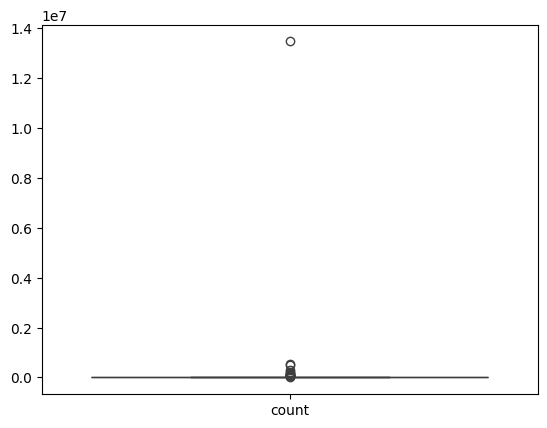

In [38]:
print(scale_features['ads_type'].describe())
sns.boxplot(scale_features['ads_type'])

In [115]:
## 이걸로 사용하기 !! 광고 집행 건수는 idx nunique값이라
scale_features = machesa.groupby('mda_idx').agg({
    'contract_price':['mean', 'median', 'sum', 'max', 'min'],
    'media_price':['mean', 'median', 'sum', 'max', 'min'],
    'adv_cost': ['mean', 'median', 'sum', 'max', 'min'],
    'earn_cost':['mean', 'median', 'sum', 'max', 'min'],
    'ads_idx':'nunique'# ,
    # 'device'
    })
scale_features

contract_price                                             \
                  mean       median           sum     max     min   
mda_idx                                                             
12           267.33525    180.00000      62138872    2000     130   
14          1920.34239    230.00000     162773982   30000     170   
18         12072.96024   7800.00000      71966916   33600    1200   
22           333.19475    190.00000      27773448   33600     150   
26          2366.75516    280.00000       1604660   20400     190   
30           313.99826    230.00000       1620231    4800     230   
32          3452.19822   2000.00000       5433760    7200    1200   
54          7262.38916    230.00000      93234552  493636       2   
56          2563.90037    280.00000     102881630   24000     180   
58          2940.81144    280.00000    1419806120   24000     180   
73         24468.40000   5726.50000        734052  493636      50   
87           181.79916    180.00000      11698594    4500     180   
108         1017.22632    130.00000        827005   24000     130   
246          417.04946    200.00000        691468   21600       2   
270          974.15319      5.00000      60195848  240000       0   
281         3207.30583   1200.00000       4624935   30000     200   
290          331.67500    180.00000         26534    3500      10   
291           26.43421     18.00000          2009     230       2   
294         1080.28428    260.00000       4081314   24000     210   
303          201.34028    170.00000       2394540     260     130   
324          200.66610    170.00000       2349800     260     130   
337        10594.55521   2300.00000      20341546  476400     170   
340          203.00665    170.00000       2715620     260     130   
341          206.28300    170.00000       2844230     260     130   
342          289.34386    280.00000      88627760    1500     180   
343          397.26886    280.00000      72227055   20909     280   
344          525.92395    280.00000      32474752   20909     280   
356         1443.68942   1440.00000       2770440    7200     190   
371          288.51447     16.00000       8741123   33600       2   
374            9.00000      9.00000            18      16       2   
375         1300.19861    230.00000        562986   30000       2   
384          806.74725    180.00000      16285000    2000     180   
385          691.74002    250.00000       3049190    1500     190   
389           10.35673      5.00000          8855    1360       2   
396          304.87883    280.00000      47867500    1620     280   
397          346.55964    280.00000       8419320    1620     280   
398          831.80706    280.00000       5776900   30000     180   
401         3064.18991    300.00000       1032632   30000     230   
409          133.60000    190.00000          1336     240       2   
437         1350.00000   1350.00000          1350    1350    1350   
442         2096.83432    230.00000        354365  106363      15   
458          292.88074    280.00000        886550    1600     230   
480         1972.39394   1280.00000        195267   12000       2   
481         2337.85714    500.00000         65460   13600      15   
482          533.13880    230.00000       1932095   33600       2   
492           34.71671     15.00000         28676    7200      10   
496          271.47971    230.00000      34742616   30000     150   
539         7562.87147   6000.00000  101856896710  210000     180   
540         5313.98984    280.00000      62784790  210000     180   
562          230.86967     20.00000       4953078   20400      18   
563           96.29663     18.00000      52032634   30000      18   
564          304.32985    230.00000       1107152   14400       2   
568          103.48980     18.00000         10142    2400       3   
578          234.15702    260.00000       2973560    2650     130   
579          231.49195    260.00000       3782810    2650     130   
582   

In [35]:
pd.options.display.float_format = '{:.5f}'.format  # .5 부분은 소숫점 자리수

count    189.00000
mean     115.33333
std      561.91766
min        1.00000
25%        9.00000
50%       23.00000
75%       28.00000
max     6563.00000
Name: ads_idx, dtype: float64


<Axes: ylabel='ads_idx'>

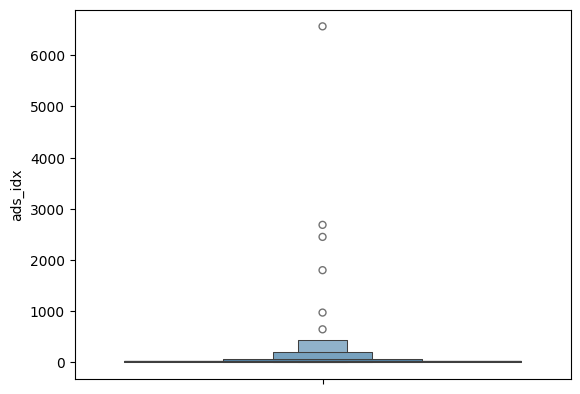

In [41]:
print(machesa.groupby('mda_idx')['ads_idx'].nunique().describe())
sns.boxenplot(machesa.groupby('mda_idx')['ads_idx'].nunique()) # 제일 광고 집행 건수가 많은 563

count    189.00000
mean     114.75132
std      561.56325
min        1.00000
25%        9.00000
50%       22.00000
75%       28.00000
max     6562.00000
Name: ads_code, dtype: float64


<Axes: ylabel='ads_code'>

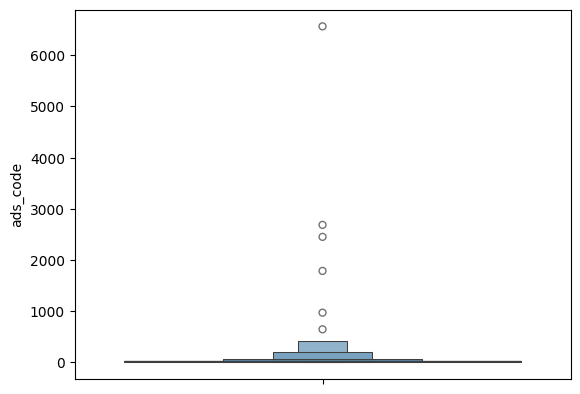

In [42]:
print(machesa.groupby('mda_idx')['ads_code'].nunique().describe())
sns.boxenplot(machesa.groupby('mda_idx')['ads_code'].nunique()) # 제일 광고 집행 건수가 많은 563

In [43]:
sum(scale_features['ads_idx']['nunique'])

21798

In [44]:
domain.shape[0]

9517

#### 규모 나누기

In [45]:
def separate_scale(x):
    '''
    매체사 규모를 나누는 함수
    '''
    if x < 11:
        return '테스트형 매체사'
    elif x <= 50:
        return '소규모 운영'
    elif x <= 200:
        return '중간 규모'
    else: # x <= 2000:
        return '대규모 운영'

    
scale_features['ads_idx']['scale_label'] = scale_features['ads_idx']['nunique'].apply(lambda x: separate_scale(x))
scale_features['ads_idx']['nunique'].apply(lambda x: separate_scale(x)).reset_index().value_counts('nunique')

/var/folders/4n/w27drm2j3_v05ss9qbg_6qsc0000gn/T/ipykernel_38173/4000947897.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scale_features['ads_idx']['scale_label'] = scale_features['ads_idx']['nunique'].apply(lambda x: separate_scale(x))


nunique
소규모 운영      100
테스트형 매체사     55
중간 규모        22
대규모 운영       12
Name: count, dtype: int64

#### user ip, device id

In [46]:
machesa.columns

Index(['ads_idx', 'dvc_idx', 'mda_idx', 'pub_sub_rel_id', 'contract_price',
       'media_price', 'click_time', 'click_date', 'exp_day', 'network',
       'user_ip', 'rwd_idx', 'advid', 'adv_cost', 'earn_cost', 'ctit',
       'conversion', 'ads_code', 'aff_idx', 'adv_idx', 'ads_type',
       'ads_category', 'ads_name', 'ads_save_way', 'ads_day_cap', 'ads_sdate',
       'ads_edate', 'ads_os_type', 'ads_order', 'ads_rejoin_type', 'regdate',
       'domain'],
      dtype='object')

In [47]:
print(machesa.groupby('mda_idx')[['ads_idx', 'user_ip', 'dvc_idx']].nunique().describe())
look_scale = machesa.groupby('mda_idx')[['ads_idx', 'user_ip', 'dvc_idx']].nunique().reset_index()
look_scale

         ads_idx      user_ip      dvc_idx
count  189.00000    189.00000    189.00000
mean   115.33333   5109.18519   6261.00529
std    561.91766  14174.36275  19113.59443
min      1.00000      1.00000      1.00000
25%      9.00000     41.00000     23.00000
50%     23.00000   1622.00000   1764.00000
75%     28.00000   4400.00000   3840.00000
max   6563.00000 113648.00000 169122.00000


,mda_idx,ads_idx,user_ip,dvc_idx
0,12,24,41747,75700
1,14,59,33285,31834
2,18,23,3244,2825
3,22,166,23495,37668
4,26,19,418,402
...,...,...,...,...
184,1050,1,1,1
185,1051,1,1,1
186,1055,2,2,1
187,1059,1,5,1


<Axes: xlabel='ads_idx', ylabel='dvc_idx'>

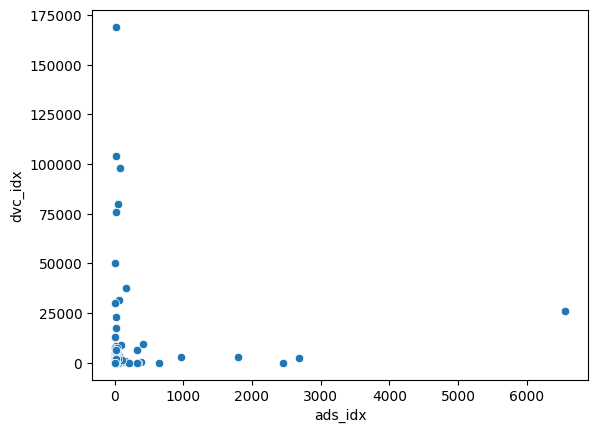

In [48]:
sns.scatterplot(x = look_scale['ads_idx'], y = look_scale['dvc_idx'])

In [49]:
def separate_scale(x):
    '''
    매체사 규모를 나누는 함수
    '''
    if x < 11:
        return 1 # '테스트형 매체사'
    elif x <= 50:
        return 2 # '소규모 운영'
    elif x <= 200:
        return 3 # '중간 규모'
    else: # x <= 2000:
        return 4 # '대규모 운영'

def separate_user_scale(x):
    '''
    매체사 사용자 규모를 나누는 함수
    '''
    if x < 1000:
        return 1 # 소규모
    elif x < 10000:
        return 2 # 중규모
    else:
        return 3 # 대규모
    
look_scale['ads_scale_index'] = look_scale['ads_idx'].apply(separate_scale)
look_scale['dvc_scale_index'] = look_scale['dvc_idx'].apply(separate_user_scale)
look_scale.value_counts(['ads_scale_index', 'dvc_scale_index'])

ads_scale_index  dvc_scale_index
2                2                  74
1                1                  42
2                1                  20
3                1                  13
1                2                  10
2                3                   6
4                1                   6
3                2                   5
4                2                   5
3                3                   4
1                3                   3
4                3                   1
Name: count, dtype: int64

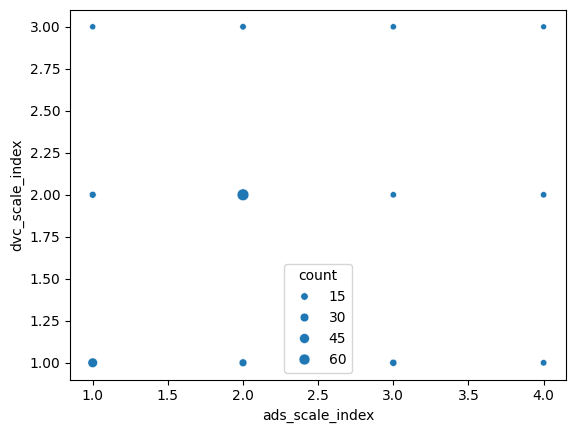

In [50]:
df = look_scale.value_counts(['ads_scale_index', 'dvc_scale_index']).reset_index()
sns.scatterplot(x= df['ads_scale_index'], y = df['dvc_scale_index'],size = df['count'])
def separate_scale(x):
    '''
    매체사 규모를 나누는 함수
    '''
    if x < 11:
        return 1 # '테스트형 매체사'
    elif x <= 50:
        return 2 # '소규모 운영'
    elif x <= 200:
        return 3 # '중간 규모'
    else: # x <= 2000:
        return 4 # '대규모 운영'

def separate_user_scale(x):
    '''
    매체사 사용자 규모를 나누는 함수
    '''
    if x < 1000:
        return 1 # 소규모
    elif x < 10000:
        return 2 # 중규모
    else:
        return 3 # 대규모

In [120]:
look_scale[(look_scale['ads_scale_index'] == 4) & (look_scale['dvc_scale_index'] == 3)]

,mda_idx,ads_idx,user_ip,dvc_idx,ads_scale_index,dvc_scale_index
50,563,6563,1,26169,4,3


In [51]:
look_scale[(look_scale['ads_scale_index'] == 4) & (look_scale['dvc_scale_index'] == 1)]

,mda_idx,ads_idx,user_ip,dvc_idx,ads_scale_index,dvc_scale_index
21,337,382,663,603,4,1
45,492,646,8,11,4,1
59,634,2451,137,134,4,1
91,714,338,904,1,4,1
129,817,209,901,71,4,1
143,854,323,520,122,4,1


In [52]:
print(machesa[machesa['mda_idx'] == 714][['ads_type', 'ads_category', 'ads_save_way', 'ads_day_cap', 'ads_os_type', 'ads_rejoin_type']].nunique()) 
# type: 12:CPS(물건구매), category: 11: 쇼핑-상품별카테고리(쇼핑적립), save_way: 구매, ads_day_cap: False, ads_os_type: 7(Web)
machesa[machesa['mda_idx'] == 714]

ads_type           1
ads_category       1
ads_save_way       1
ads_day_cap        1
ads_os_type        1
ads_rejoin_type    1
dtype: int64


,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,contract_price,media_price,click_time,click_date,exp_day,network,...,ads_name,ads_save_way,ads_day_cap,ads_sdate,ads_edate,ads_os_type,ads_order,ads_rejoin_type,regdate,domain
4025,150779,0,714,1,4454,2800,8,2025-08-23 08:30:32,2025-09-22,WIFI,...,류현진 데이렉스 엑소좀겔 마사지 크림 50g,구매,False,2025-01-31 10:00:00,9999-12-31 00:00:00,7,1544829,REJOINABLE,2025-01-31 10:57:17 UTC,뷰티
15641,111615,0,714,1,34650,22500,3,2025-07-31 03:58:38,2025-08-30,WIFI,...,[쎄븐업플러스]철갑상어 건강즙 70ml 30포,구매,False,2024-10-31 10:00:00,9999-12-31 00:00:00,7,1525814,REJOINABLE,2024-10-31 10:17:08 UTC,의료/건강
18293,53592,0,714,1,6818,4400,8,2025-07-29 08:23:04,2025-08-28,WIFI,...,짐스낵 다이어트 간식 프로틴 단백질 쿠키 과자,구매,False,2024-06-21 10:00:00,9999-12-31 00:00:00,7,1554608,REJOINABLE,2024-06-21 10:44:52 UTC,운동/스포츠
23474,53626,0,714,1,5363,3400,13,2025-07-30 13:41:28,2025-08-29,WIFI,...,[동원] 리챔 더블라이트 200g X 8캔,구매,False,2024-06-21 11:00:00,9999-12-31 00:00:00,7,1586953,REJOINABLE,2024-06-21 11:59:05 UTC,식음료
36203,146798,0,714,1,6090,3900,4,2025-08-11 04:40:17,2025-09-10,WIFI,...,면세점입점 나틴다 승무원팩트 실키커버 21호,구매,False,2025-01-23 17:00:00,9999-12-31 00:00:00,7,1369610,REJOINABLE,2025-01-23 17:39:38 UTC,뷰티
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16822156,157249,0,714,1,5272,3400,23,2025-08-19 23:05:27,2025-09-18,WIFI,...,[지리산마천농협] 6년근 녹용홍삼진 30포,구매,False,2025-02-17 11:00:00,9999-12-31 00:00:00,7,1314904,REJOINABLE,2025-02-17 11:17:31 UTC,커머스
16831203,119136,0,714,1,10000,6500,5,2025-08-08 05:35:22,2025-09-07,WIFI,...,ihee 헤어클리닉 극산성복구 애시드 클리닉,구매,False,2024-11-25 16:00:00,9999-12-31 00:00:00,7,1369044,REJOINABLE,2024-11-25 16:11:48 UTC,뷰티
16838690,438221,0,714,1,2363,1500,10,2025-08-01 10:58:39,2025-08-31,WIFI,...,키친플래그 다용도 극세사 행주 5종 세트,구매,False,2025-07-29 13:00:00,9999-12-31 00:00:00,7,1252277,REJOINABLE,2025-07-29 13:59:56 UTC,커머스
16842911,150763,0,714,1,6000,3900,9,2025-08-11 09:28:06,2025-09-10,WIFI,...,[여드름성 피부특화] 카밍 리프래쉬 클렌징 폼,구매,False,2025-01-31 10:00:00,9999-12-31 00:00:00,7,1541612,REJOINABLE,2025-01-31 10:12:06 UTC,뷰티


In [53]:
machesa.loc[machesa['mda_idx'].isin([ 980,  654,  714,  540,  583,  755, 1055, 1042,  769,  480,  978,
        787,  481,   73, 1023,  437, 1050,  539, 1049,  398,  710]), ['mda_idx', 'dvc_idx']].groupby('mda_idx').nunique()
# device_idx가 0만 있는 웹인 매체사만 있는 곳
# [980,  654,  714,  755, 1055, 1042,  769,  480,  978,  787,  481, 1023,  437, 1050,  1049,  710]
## 매체 구분을 했을 때 여기가 달라졌다면 왜 달라졌는지 알기


,dvc_idx
mda_idx,
73,3
398,3267
437,1
480,1
481,1
539,97895
540,3160
583,3080
654,1


In [54]:
look_scale[look_scale['mda_idx'].isin([980,  654,  714,  755, 1055, 1042,  769,  480,  978,  787,  481, 1023,  437, 1050,  1049,  710])]

,mda_idx,ads_idx,user_ip,dvc_idx,ads_scale_index,dvc_scale_index
39,437,1,1,1,1,1
42,480,50,28,1,2,1
43,481,22,10,1,2,1
68,654,3,12199,1,1,1
89,710,3,3,1,1,1
91,714,338,904,1,4,1
99,755,8,6,1,1,1
107,769,13,2,1,2,1
112,787,12,27,1,2,1
145,978,56,69,1,3,1


In [55]:
for i in [980,  654,  714,  755, 1055, 1042,  769,  480,  978,  787,  481, 1023,  437, 1050,  1049,  710]:
    print(f"======== 매체사 아이디: {i} ========")
    print(machesa[machesa['mda_idx'] == i][['ads_type', 'ads_category', 'ads_save_way', 'ads_day_cap', 'ads_os_type', 'ads_rejoin_type']].agg(['nunique', 'unique'])) 
# type: 12:CPS(물건구매), category: 11: 쇼핑-상품별카테고리(쇼핑적립), save_way: 구매, ads_day_cap: False, ads_os_type: 7(Web)
    print(machesa[machesa['mda_idx'] == i].head())

======== 매체사 아이디: 980 ========
        ads_type ads_category ads_save_way ads_day_cap ads_os_type  \
nunique        1            1            1           1           1   
unique      [12]         [11]         [구매]     [False]         [7]   

        ads_rejoin_type  
nunique               1  
unique     [REJOINABLE]  
      ads_idx  dvc_idx  mda_idx  pub_sub_rel_id  contract_price  media_price  \
478    130275        0      980               1           88275         3490   
3473   429485        0      980               1           87120         3400   
4319   429485        0      980               1           87120         3400   
5334   130275        0      980               1           88275         3490   
7173   426192        0      980               1            2904          100   

      click_time           click_date     exp_day network  ...  \
478           23  2025-07-30 23:16:27  2025-08-29     NaN  ...   
3473          22  2025-08-03 22:52:49  2025-09-02     NaN  ...   
4

In [56]:
machesa.columns

Index(['ads_idx', 'dvc_idx', 'mda_idx', 'pub_sub_rel_id', 'contract_price',
       'media_price', 'click_time', 'click_date', 'exp_day', 'network',
       'user_ip', 'rwd_idx', 'advid', 'adv_cost', 'earn_cost', 'ctit',
       'conversion', 'ads_code', 'aff_idx', 'adv_idx', 'ads_type',
       'ads_category', 'ads_name', 'ads_save_way', 'ads_day_cap', 'ads_sdate',
       'ads_edate', 'ads_os_type', 'ads_order', 'ads_rejoin_type', 'regdate',
       'domain'],
      dtype='object')

In [57]:
machesa.groupby('mda_idx')['ads_idx'].unique()

mda_idx
12      [430776, 439552, 444350, 445046, 426215, 44367...
14      [34045, 441329, 437753, 73878, 351170, 119999,...
18      [140832, 119999, 393624, 351170, 388989, 37230...
22      [439415, 430776, 435357, 441073, 413490, 43884...
26      [444370, 430804, 388973, 386182, 434497, 44436...
                              ...                        
1050                                             [429020]
1051                                             [426584]
1055                                     [385454, 385444]
1059                                             [441181]
1061                             [356956, 441013, 445023]
Name: ads_idx, Length: 189, dtype: object

In [58]:
m_ad_list = machesa.groupby(['mda_idx', 'domain'])['ads_idx'].nunique().reset_index(name = 'ads_idx_nunique')
m_ad_list

,mda_idx,domain,ads_idx_nunique
0,12,게임,7
1,12,금융,1
2,12,미디어/컨텐츠,1
3,12,비영리/공공,4
4,12,생활,3
...,...,...,...
1409,1055,미디어/컨텐츠,2
1410,1059,게임,1
1411,1061,뷰티,1
1412,1061,운세,1


In [59]:
# 2. 매체사 전체 ads_idx 고유 개수
m_ad_total = machesa.groupby(['mda_idx'])['ads_idx'].nunique().reset_index(name = 'total')

# 3. 합치기 - merge
m_ad_list = m_ad_list.merge(m_ad_total, on='mda_idx', how = 'left')

# 4. 비율 계산
m_ad_list['ratio'] = m_ad_list['ads_idx_nunique'] / m_ad_list['total']
m_ad_list

,mda_idx,domain,ads_idx_nunique,total,ratio
0,12,게임,7,24,0.29167
1,12,금융,1,24,0.04167
2,12,미디어/컨텐츠,1,24,0.04167
3,12,비영리/공공,4,24,0.16667
4,12,생활,3,24,0.12500
...,...,...,...,...,...
1409,1055,미디어/컨텐츠,2,2,1.00000
1410,1059,게임,1,1,1.00000
1411,1061,뷰티,1,3,0.33333
1412,1061,운세,1,3,0.33333


In [91]:
pd.set_option('display.max_rows', 10000) # 모든 행을 표시

In [60]:
m_ad_list

,mda_idx,domain,ads_idx_nunique,total,ratio
0,12,게임,7,24,0.29167
1,12,금융,1,24,0.04167
2,12,미디어/컨텐츠,1,24,0.04167
3,12,비영리/공공,4,24,0.16667
4,12,생활,3,24,0.12500
...,...,...,...,...,...
1409,1055,미디어/컨텐츠,2,2,1.00000
1410,1059,게임,1,1,1.00000
1411,1061,뷰티,1,3,0.33333
1412,1061,운세,1,3,0.33333


In [89]:
m_ad_total

,mda_idx,total
0,12,24
1,14,59
2,18,23
3,22,166
4,26,19
...,...,...
184,1050,1
185,1051,1
186,1055,2
187,1059,1


In [92]:
# wide format 변환 (퍼센트 기준)
df_wide = (
    m_ad_list
    .pivot_table(
        index="mda_idx",          # 행: 매체사
        columns="domain",         # 열: 도메인
        values=["ratio"],           # 값: 비율
        fill_value=0              # 값이 없으면 0으로 채움
    )
    .reset_index()
)
df_wide['total_n_idx'] = m_ad_total['total']
df_wide

mda_idx   ratio                                                  \
domain              게임      교육      금융      기타 미디어/컨텐츠      뷰티  비영리/공공   
0           12 0.29167 0.00000 0.04167 0.00000 0.04167 0.00000 0.16667   
1           14 0.44068 0.00000 0.11864 0.03390 0.08475 0.05085 0.00000   
2           18 0.60870 0.00000 0.13043 0.00000 0.13043 0.00000 0.00000   
3           22 0.19277 0.00602 0.26506 0.00000 0.10241 0.01807 0.03012   
4           26 0.52632 0.00000 0.15789 0.00000 0.10526 0.00000 0.00000   
5           30 0.41667 0.01667 0.18333 0.00000 0.11667 0.01667 0.03333   
6           32 0.00000 0.00000 0.14286 0.00000 0.28571 0.00000 0.00000   
7           54 0.17825 0.00302 0.12689 0.00000 0.03625 0.10574 0.01208   
8           56 0.22222 0.00000 0.38889 0.00000 0.05556 0.00000 0.00000   
9           58 0.46154 0.00000 0.26923 0.03846 0.03846 0.00000 0.00000   
10          73 0.04348 0.00000 0.00000 0.04348 0.00000 0.13043 0.00000   
11          87 0.33333 0.00000 0.00000 0.00000 0.16667 0.00000 0.00000   
12         108 0.22222 0.00000 0.15556 0.00000 0.06667 0.20000 0.00000   
13         246 0.28099 0.00000 0.16529 0.01653 0.14876 0.03306 0.03306   
14         270 0.15936 0.00666 0.04331 0.04997 0.02832 0.05053 0.00333   
15         281 0.30928 0.00000 0.24227 0.00515 0.10309 0.03093 0.01546   
16         290 0.52000 0.00000 0.12000 0.00000 0.00000 0.00000 0.04000   
17         291 0.01923 0.00000 0.03846 0.01923 0.00000 0.05769 0.00000   
18         294 0.32653 0.02041 0.22449 0.02041 0.08163 0.02041 0.02041   
19         303 0.52174 0.00000 0.13043 0.00000 0.04348 0.04348 0.00000   
20         324 0.54545 0.00000 0.09091 0.00000 0.04545 0.04545 0.00000   
21         337 0.28534 0.00262 0.09162 0.00262 0.03403 0.10733 0.00262   
22         340 0.54545 0.00000 0.09091 0.00000 0.04545 0.04545 0.00000   
23         341 0.54545 0.00000 0.09091 0.00000 0.04545 0.04545 0.00000   
24         342 0.82353 0.00000 0.00000 0.05882 0.00000 0.00000 0.00000   
25         343 0.47059 0.00000 0.00000 0.05882 0.00000 0.35294 0.00000   
26         344 0.43750 0.00000 0.00000 0.06250 0.00000 0.37500 0.00000   
27         356 0.30000 0.00000 0.10000 0.00000 0.10000 0.00000 0.00000   
28         371 0.06886 0.00617 0.02980 0.00925 0.01953 0.04214 0.00411   
29         374 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000   
30         375 0.10680 0.00971 0.08738 0.00000 0.02913 0.04854 0.02913   
31         384 0.00000 0.00000 0.50000 0.00000 0.00000 0.00000 0.00000   
32         385 0.60000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000   
33         389 0.14583 0.00000 0.06250 0.02083 0.12500 0.04167 0.02083   
34         396 0.66667 0.00000 0.00000 0.16667 0.00000 0.00000 0.00000   
35         397 0.75000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000   
36         398 0.25926 0.03704 0.33333 0.00000 0.07407 0.00000 0.11111   
37         401 0.08929 0.01786 0.33929 0.00000 0.08929 0.00000 0.05357   
38         409 0.00000 0.00000 0.16667 0.00000 0.00000 0.16667 0.00000   
39         437 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000   
40         442 0.08475 0.00000 0.03390 0.03390 0.05085 0.16949 0.00000   
41         458 0.11111 0.11111 0.22222 0.00000 0.00000 0.00000 0.22222   
42         480 0.02000 0.04000 0.34000 0.00000 0.14000 0.00000 0.06000   
43         481 0.04545 0.04545 0.13636 0.00000 0.09091 0.04545 0.00000   
44         482 0.22222 0.00000 0.25926 0.01852 0.14815 0.07407 0.00000   
45         492 0.00155 0.00619 0.00619 0.10991 0.01548 0.05263 0.00155   
46         496 0.25926 0.01852 0.25926 0.01852 0.07407 0.01852 0.05556   
47         539 0.39189 0.00000 0.22973 0.00000 0.08108 0.00000 0.02703   
48         540 0.32609 0.00000 0.19565 0.02174 0.04348 0.00000 0.04348   
49         562 0.01154 0.00410 0.00819 0.03127 0.03090 0.03649 0.00186   
50         563 0.01067 0.00411 0.00777 0.03870 0.01828 0.04266 0.00213   
51         564 0.10959 0.00000 0.15068 0.00000 0.06849 0.06849 0.01370   
52         

In [93]:
df_wide[df_wide['total_n_idx'] >= 50]

mda_idx   ratio                                                  \
domain              게임      교육      금융      기타 미디어/컨텐츠      뷰티  비영리/공공   
1           14 0.44068 0.00000 0.11864 0.03390 0.08475 0.05085 0.00000   
3           22 0.19277 0.00602 0.26506 0.00000 0.10241 0.01807 0.03012   
5           30 0.41667 0.01667 0.18333 0.00000 0.11667 0.01667 0.03333   
7           54 0.17825 0.00302 0.12689 0.00000 0.03625 0.10574 0.01208   
13         246 0.28099 0.00000 0.16529 0.01653 0.14876 0.03306 0.03306   
14         270 0.15936 0.00666 0.04331 0.04997 0.02832 0.05053 0.00333   
15         281 0.30928 0.00000 0.24227 0.00515 0.10309 0.03093 0.01546   
17         291 0.01923 0.00000 0.03846 0.01923 0.00000 0.05769 0.00000   
21         337 0.28534 0.00262 0.09162 0.00262 0.03403 0.10733 0.00262   
28         371 0.06886 0.00617 0.02980 0.00925 0.01953 0.04214 0.00411   
30         375 0.10680 0.00971 0.08738 0.00000 0.02913 0.04854 0.02913   
37         401 0.08929 0.01786 0.33929 0.00000 0.08929 0.00000 0.05357   
40         442 0.08475 0.00000 0.03390 0.03390 0.05085 0.16949 0.00000   
42         480 0.02000 0.04000 0.34000 0.00000 0.14000 0.00000 0.06000   
44         482 0.22222 0.00000 0.25926 0.01852 0.14815 0.07407 0.00000   
45         492 0.00155 0.00619 0.00619 0.10991 0.01548 0.05263 0.00155   
46         496 0.25926 0.01852 0.25926 0.01852 0.07407 0.01852 0.05556   
47         539 0.39189 0.00000 0.22973 0.00000 0.08108 0.00000 0.02703   
49         562 0.01154 0.00410 0.00819 0.03127 0.03090 0.03649 0.00186   
50         563 0.01067 0.00411 0.00777 0.03870 0.01828 0.04266 0.00213   
51         564 0.10959 0.00000 0.15068 0.00000 0.06849 0.06849 0.01370   
52         568 0.02985 0.01493 0.00000 0.01493 0.02985 0.02985 0.02985   
59         634 0.01510 0.00694 0.01265 0.11302 0.01265 0.05059 0.00326   
63         643 0.91489 0.00000 0.00000 0.00000 0.01064 0.00000 0.01064   
64         645 0.13483 0.00562 0.11236 0.00562 0.04494 0.07303 0.01685   
70         667 0.39326 0.00000 0.19101 0.01124 0.07865 0.02247 0.02247   
90         711 0.20370 0.00000 0.05556 0.00000 0.11111 0.01852 0.01852   
91         714 0.00000 0.00000 0.00000 0.00000 0.00000 0.26627 0.00000   
105        761 0.38480 0.00735 0.14706 0.00000 0.05392 0.02451 0.00735   
108        772 0.08929 0.01786 0.30357 0.01786 0.05357 0.00000 0.08929   
113        790 0.25949 0.00633 0.21519 0.00000 0.13291 0.02532 0.02532   
129        817 0.10048 0.00478 0.03349 0.02392 0.07177 0.07177 0.01435   
143        854 0.06192 0.00929 0.08050 0.01548 0.06192 0.04644 0.00000   
145        978 0.00000 0.01786 0.10714 0.01786 0.08929 0.03571 0.01786   
153       1012 0.11429 0.00952 0.00000 0.04762 0.01905 0.01905 0.00952   

                                                                        \
domain      생활   식당/카페     식음료  운동/스포츠      운세   의료/건강      채용     커머스   
1      0.13559 0.00000 0.03390 0.00000 0.00000 0.03390 0.01695 0.05085   
3      0.11446 0.00602 0.04217 0.01205 0.07831 0.04819 0.01205 0.07229   
5      0.08333 0.00000 0.01667 0.00000 0.03333 0.01667 0.03333 0.03333   
7      0.04230 0.01208 0.07251 0.01511 0.04230 0.09668 0.00906 0.24773   
13     0.05785 0.00826 0.03306 0.01653 0.04132 0.03306 0.04132 0.09091   
14     0.12771 0.12715 0.03998 0.02776 0.00944 0.06496 0.00333 0.25819   
15     0.07732 0.00000 0.06186 0.01031 0.01546 0.02062 0.01031 0.09794   
17     0.07692 0.55769 0.00000 0.01923 0.05769 0.03846 0.00000 0.11538   
21     0.02880 0.00262 0.06283 0.01832 0.01832 0.09424 0.00524 0.24346   
28     0.10586 0.21686 0.02364 0.03083 0.00925 0.06783 0.00103 0.36485   
30     0.03883 0.00971 0.03883 0.00971 0.05825 0.04854 0.01942 0.46602   
37     0.12500 0.00000 0.07143 0.01786 0.05357 0.07143 0.03571 0.03571   
40     0.16949 0.03390 0.05085 0.03390 0.00000 0.03390 0.00000 0.30508   
42     0.12000 0.06000 0.02000 0.00000 0.08000 0.04000 0.02000 0.06000   
44     0.00000 0.00000 0.01852 0.01852 0.05556 0.00000 0.03704 0.14815   
45     0.1

### 6. 성과 지표

In [1]:
machesa.columns

NameError: name 'machesa' is not defined

In [ ]:
machesa.groupby('mda_idx').agg('c':'')

## 클러스터링

### 매체사별로 무기한 여부가 다른지 확인

In [61]:
machesa[['ads_sdate', 'ads_edate']]

,ads_sdate,ads_edate
0,2025-04-09 10:00:00,2031-01-03 00:00:00
1,2025-07-03 13:00:00,2025-07-28 00:00:00
2,2025-08-12 11:17:15,9999-12-31 23:59:59
3,2025-05-08 10:00:00,2031-01-03 00:00:00
4,2025-05-30 10:00:00,2031-01-03 00:00:00
...,...,...
16854860,2025-04-03 16:00:00,2031-01-03 00:00:00
16854861,2025-05-26 18:00:00,2029-11-28 00:00:00
16854862,2025-08-14 00:00:00,2025-08-23 00:00:00
16854863,2025-05-08 10:00:00,2031-01-03 00:00:00


In [62]:
machesa[machesa['ads_sdate'] == '0000-00-00 00:00:00']

,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,contract_price,media_price,click_time,click_date,exp_day,network,...,ads_name,ads_save_way,ads_day_cap,ads_sdate,ads_edate,ads_os_type,ads_order,ads_rejoin_type,regdate,domain
742311,163147,61813538,337,1,4224,3160,1,2025-08-08 01:27:43,2025-09-07,NaN,...,Find Out: 숨은 물건 찾기,별450개 획득,False,0000-00-00 00:00:00,0000-00-00 00:00:00,2,2435200,NONE,2025-02-26 16:41:15 UTC,게임
1213845,163147,61878133,270,1,4224,2212,0,2025-08-15 00:33:39,2025-09-14,WIFI,...,Find Out: 숨은 물건 찾기,별450개 획득,False,0000-00-00 00:00:00,0000-00-00 00:00:00,2,2435200,NONE,2025-02-26 16:41:15 UTC,게임
2128381,163147,61878133,270,1,4224,2212,0,2025-08-15 00:30:45,2025-09-14,WIFI,...,Find Out: 숨은 물건 찾기,별450개 획득,False,0000-00-00 00:00:00,0000-00-00 00:00:00,2,2435200,NONE,2025-02-26 16:41:15 UTC,게임
6297810,163147,56298914,761,144400642,4224,3160,10,2025-08-24 10:12:20,2025-09-23,NaN,...,Find Out: 숨은 물건 찾기,별450개 획득,False,0000-00-00 00:00:00,0000-00-00 00:00:00,2,2435200,NONE,2025-02-26 16:41:15 UTC,게임
7706667,163147,61880285,643,1,4224,3160,13,2025-08-13 13:32:17,2025-09-12,NaN,...,Find Out: 숨은 물건 찾기,별450개 획득,False,0000-00-00 00:00:00,0000-00-00 00:00:00,2,2435200,NONE,2025-02-26 16:41:15 UTC,게임
8538046,163147,61747021,270,1,4224,2212,3,2025-07-30 03:28:11,2025-08-29,WIFI,...,Find Out: 숨은 물건 찾기,별450개 획득,False,0000-00-00 00:00:00,0000-00-00 00:00:00,2,2435200,NONE,2025-02-26 16:41:15 UTC,게임
10866689,163147,61234424,270,1,4224,2212,1,2025-08-11 01:41:11,2025-09-10,WIFI,...,Find Out: 숨은 물건 찾기,별450개 획득,False,0000-00-00 00:00:00,0000-00-00 00:00:00,2,2435200,NONE,2025-02-26 16:41:15 UTC,게임
13286994,163147,61445568,761,144400642,4224,3160,18,2025-08-03 18:39:42,2025-09-02,NaN,...,Find Out: 숨은 물건 찾기,별450개 획득,False,0000-00-00 00:00:00,0000-00-00 00:00:00,2,2435200,NONE,2025-02-26 16:41:15 UTC,게임
13612182,163147,55427315,761,144400642,4224,3160,22,2025-08-05 22:44:16,2025-09-04,NaN,...,Find Out: 숨은 물건 찾기,별450개 획득,False,0000-00-00 00:00:00,0000-00-00 00:00:00,2,2435200,NONE,2025-02-26 16:41:15 UTC,게임
14362185,163147,46429604,643,1,4224,3160,23,2025-08-22 23:19:28,2025-09-21,NaN,...,Find Out: 숨은 물건 찾기,별450개 획득,False,0000-00-00 00:00:00,0000-00-00 00:00:00,2,2435200,NONE,2025-02-26 16:41:15 UTC,게임


In [63]:
sum( (machesa['ads_edate'] == '9999-12-31 23:59:59'))/machesa.shape[0]

0.059646398829062114

In [64]:
sum((machesa['ads_sdate'] == '0000-00-00 00:00:00')| (machesa['ads_edate'] == '9999-12-31 23:59:59'))/machesa.shape[0]

0.05964711078967408

In [65]:
machesa['nolimit_duration'] = (machesa['ads_sdate'] == '0000-00-00 00:00:00')| (machesa['ads_edate'] == '9999-12-31 23:59:59')
machesa

,ads_idx,dvc_idx,mda_idx,pub_sub_rel_id,contract_price,media_price,click_time,click_date,exp_day,network,...,ads_save_way,ads_day_cap,ads_sdate,ads_edate,ads_os_type,ads_order,ads_rejoin_type,regdate,domain,nolimit_duration
0,313780,61906528,539,144350110,6000,4500,21,2025-08-17 21:07:37,2025-09-16,0,...,레벨 50 완료,False,2025-04-09 10:00:00,2031-01-03 00:00:00,2,2447700,NONE,2025-04-09 10:39:25 UTC,게임,False
1,412426,34422806,58,46032732,180,170,2,2025-07-26 02:18:24,2025-08-25,NaN,...,받기,False,2025-07-03 13:00:00,2025-07-28 00:00:00,2,2749100,NONE,2025-07-02 15:10:22 UTC,게임,False
2,443660,38366075,808,1,170,120,18,2025-08-12 18:17:59,2025-09-11,WIFI,...,받기,False,2025-08-12 11:17:15,9999-12-31 23:59:59,2,2758100,NONE,2025-08-12 11:17:14 UTC,생활,True
3,360192,61894110,539,144350110,6000,4500,3,2025-08-17 03:35:02,2025-09-16,0,...,15일차 완료,False,2025-05-08 10:00:00,2031-01-03 00:00:00,2,2449700,NONE,2025-05-08 10:47:13 UTC,게임,False
4,372307,61956954,539,144350110,15600,11700,8,2025-08-18 08:01:26,2025-09-17,0,...,그림 250개 색칠,False,2025-05-30 10:00:00,2031-01-03 00:00:00,2,2456300,NONE,2025-05-30 10:09:21 UTC,게임,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16854860,264409,37945741,539,144350110,5400,3800,23,2025-08-16 23:57:32,2025-09-15,0,...,오렌지 영웅 1명 모으기,False,2025-04-03 16:00:00,2031-01-03 00:00:00,2,2447400,NONE,2025-04-03 16:20:42 UTC,게임,False
16854861,369816,57367216,539,144350110,3600,2700,15,2025-08-18 15:16:57,2025-09-17,0,...,Complete Location 50,False,2025-05-26 18:00:00,2029-11-28 00:00:00,2,2454600,NONE,2025-05-26 18:14:09 UTC,게임,False
16854862,444350,61242190,58,33306660,180,170,1,2025-08-20 01:02:48,2025-09-19,NaN,...,받기,False,2025-08-14 00:00:00,2025-08-23 00:00:00,2,2763600,NONE,2025-08-14 15:33:36 UTC,게임,False
16854863,360192,61903879,539,144350110,6000,4500,12,2025-08-15 12:04:56,2025-09-14,0,...,15일차 완료,False,2025-05-08 10:00:00,2031-01-03 00:00:00,2,2449700,NONE,2025-05-08 10:47:13 UTC,게임,False


In [66]:
machesa.isnull().sum()

ads_idx                    0
dvc_idx                    0
mda_idx                    0
pub_sub_rel_id             0
contract_price             0
media_price                0
click_time                 0
click_date                 0
exp_day                    0
network              2501362
user_ip                    9
rwd_idx             15379915
advid               15387086
adv_cost            15379915
earn_cost           15379915
ctit                15379915
conversion                 0
ads_code                   0
aff_idx                    0
adv_idx                    0
ads_type                   0
ads_category               0
ads_name                   0
ads_save_way               0
ads_day_cap                0
ads_sdate                  0
ads_edate                  0
ads_os_type                0
ads_order                  0
ads_rejoin_type            0
regdate                    0
domain                     0
nolimit_duration           0
dtype: int64

In [95]:
cols = ['ads_sdate', 'ads_edate', 'regdate']

# machesa[cols] = machesa[cols].apply(
#     pd.to_datetime, errors='coerce'
# )

# datetime 변환 (timezone 제거 → tz-naive)
for col in ['ads_sdate', 'regdate', 'ads_edate']:
    machesa[col] = pd.to_datetime(machesa[col], errors='coerce').dt.tz_localize(None)


In [69]:
pd.to_datetime('2022-03-08 11:34:50') <= pd.to_datetime('2023-03-02 11:33:44')

True

In [73]:
machesa[['ads_sdate','regdate']]

,ads_sdate,regdate
0,2025-04-09 10:00:00,2025-04-09 10:39:25+00:00
1,2025-07-03 13:00:00,2025-07-02 15:10:22+00:00
2,2025-08-12 11:17:15,2025-08-12 11:17:14+00:00
3,2025-05-08 10:00:00,2025-05-08 10:47:13+00:00
4,2025-05-30 10:00:00,2025-05-30 10:09:21+00:00
...,...,...
16854860,2025-04-03 16:00:00,2025-04-03 16:20:42+00:00
16854861,2025-05-26 18:00:00,2025-05-26 18:14:09+00:00
16854862,2025-08-14 00:00:00,2025-08-14 15:33:36+00:00
16854863,2025-05-08 10:00:00,2025-05-08 10:47:13+00:00


In [96]:
# 혹시 모를 string → datetime 변환
# machesa['ads_sdate'] = pd.to_datetime(machesa['ads_sdate'], errors='coerce')
# machesa['regdate'] = pd.to_datetime(machesa['regdate'], errors='coerce')
# machesa['ads_edate'] = pd.to_datetime(machesa['ads_edate'], errors='coerce')


# 시작일: ads_sdate vs regdate 중 더 느린 날짜
real_start = pd.Series(np.where(machesa['ads_sdate'] <= machesa['regdate'],
                      machesa['regdate'],
                      machesa['ads_sdate']),
                index=machesa.index
                )
# 종료일 - 시작일 (무기한 광고는 NaT라서 자동으로 NaN 결과)
machesa['duration_days'] = (machesa['ads_edate'] - real_start).dt.days

In [107]:
machesa.columns

Index(['ads_idx', 'dvc_idx', 'mda_idx', 'pub_sub_rel_id', 'contract_price',
       'media_price', 'click_time', 'click_date', 'exp_day', 'network',
       'user_ip', 'rwd_idx', 'advid', 'adv_cost', 'earn_cost', 'ctit',
       'conversion', 'ads_code', 'aff_idx', 'adv_idx', 'ads_type',
       'ads_category', 'ads_name', 'ads_save_way', 'ads_day_cap', 'ads_sdate',
       'ads_edate', 'ads_os_type', 'ads_order', 'ads_rejoin_type', 'regdate',
       'domain', 'duration_days'],
      dtype='object')

In [108]:
machesa.groupby('mda_idx')['duration_days'].agg(lambda x: x.isna().sum()/len(x))

mda_idx
12     0.11893
14     0.04962
18     0.00000
22     0.28465
26     0.00000
30     0.85310
32     0.00000
54     0.20128
56     0.00456
58     0.00473
73     0.76667
87     0.00000
108    0.37146
246    0.28106
270    0.11844
281    0.15187
290    0.36250
291    0.81579
294    0.34304
303    0.73690
324    0.75525
337    0.41250
340    0.77573
341    0.80316
342    0.00000
343    0.00424
344    0.01305
356    0.00000
371    0.84781
374    0.50000
375    0.20323
384    0.00000
385    0.00000
389    0.05965
396    0.00000
397    0.00000
398    0.01008
401    0.05638
409    0.50000
437    0.00000
442    0.44970
458    0.00000
480    0.06061
481    0.46429
482    0.70751
492    0.97821
496    0.90289
539    0.00002
540    0.00034
562    0.64972
563    0.74194
564    0.97609
568    0.86735
578    0.68179
579    0.65804
582    0.56633
583    0.05231
621    0.67490
630    0.35714
634    0.92468
637    0.59803
638    0.56281
639    0.63595
643    0.10987
645    0.28762
646    0.42303
65

In [110]:
# 광고별, 매체별 duration_days 요약
ad_duration = machesa.groupby(['mda_idx', 'ads_idx'])['duration_days'].first().reset_index()

# 매체사 단위 평균/중앙값/무기간 광고 비율
no_limit = lambda x: x.isna().sum()/len(x)
mda_duration_stats = ad_duration.groupby('mda_idx')['duration_days'].agg(['mean', 'median', no_limit])
mda_duration_stats.merge(m_ad_total, on = 'mda_idx', how='left')

,mda_idx,mean,median,<lambda_0>,total
0,12,736.52632,270.00000,0.20833,24
1,14,1141.12963,1566.00000,0.08475,59
2,18,1710.73913,2020.00000,0.00000,23
3,22,1553.50000,1728.50000,0.26506,166
4,26,1346.78947,1646.00000,0.00000,19
5,30,2023.00000,2078.00000,0.13333,60
6,32,935.28571,916.00000,0.00000,7
7,54,1840.76552,1984.00000,0.56193,331
8,56,1031.47059,916.00000,0.05556,18
9,58,950.32000,438.00000,0.03846,26


### 1차 전체 클러스터링

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib_inline.backend_inline import set_matplotlib_formats
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [134]:
ads_timee = pd.read_csv('/Users/t2023-m0052/Documents/GitHub/final_project/data/시간별적립보고서_1년치.csv')
print(f"데이터 수 : {ads_timee.shape}")

데이터 수 : (6953146, 12)


**규모 그룹, 평균 CTR,** OS_dummy, **총 수입 (한 달간의)**, 집행된 광고의 mean_reward, 전체 평균 광고 기한, 무기한 광고 비율

In [143]:
mda_duration_stats.rename(columns={'mean':'duration_mean', 'median':'duration_median', '<lambda_0>':'ratio_nolimit'}, inplace=True)
mda_duration_stats.fillna(9999)

,duration_mean,duration_median,ratio_nolimit
mda_idx,,,
12,736.52632,270.00000,0.20833
14,1141.12963,1566.00000,0.08475
18,1710.73913,2020.00000,0.00000
22,1553.50000,1728.50000,0.26506
26,1346.78947,1646.00000,0.00000
30,2023.00000,2078.00000,0.13333
32,935.28571,916.00000,0.00000
54,1840.76552,1984.00000,0.56193
56,1031.47059,916.00000,0.05556


In [165]:
scale_features2.head()

mda_idx contract_price                                 media_price ads_idx
                    mean     median     sum    max   min        mean nunique
0      12      538.20833  268.50000   12917   2000   130   349.58333      24
1      14     4313.84746 1200.00000  254517  30000   170  3027.96610      59
2      18     9394.60870 6600.00000  216076  33600  1200  6832.60870      23
3      22     3954.25904 1200.00000  656407  33600   150  2945.00000     166
4      26     5629.47368 4000.00000  106960  20400   190  3977.36842      19

In [121]:
domain_features.head()

,domain_게임,domain_교육,domain_금융,domain_기타,domain_미디어/컨텐츠,domain_뷰티,domain_비영리/공공,domain_생활,domain_식당/카페,domain_식음료,domain_운동/스포츠,domain_운세,domain_의료/건강,domain_채용,domain_커머스
mda_idx,,,,,,,,,,,,,,,
12,0.80824,0.00000,0.01708,0.00000,0.00023,0.00000,0.03141,0.00636,0.00000,0.00277,0.00000,0.00000,0.00056,0.00000,0.13335
14,0.45853,0.00000,0.04200,0.00067,0.18587,0.07009,0.00000,0.07371,0.00000,0.07594,0.00000,0.00000,0.05675,0.01048,0.02597
18,0.55611,0.00000,0.15333,0.00000,0.17950,0.00000,0.00000,0.10351,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00755
22,0.44676,0.00019,0.14104,0.00000,0.19154,0.00636,0.05774,0.03440,0.00035,0.01365,0.00440,0.00048,0.02954,0.03786,0.03569
26,0.62389,0.00000,0.06047,0.00000,0.02950,0.00000,0.00000,0.16962,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.11652


In [113]:
type_features.head()

,type_1,type_2,type_3,type_4,type_5,type_7,type_9,type_10,type_11,type_12
mda_idx,,,,,,,,,,
12,0.78971,0.09951,0.11075,0.00000,0.00003,0.00000,0.00000,0.00000,0.00000,0.00000
14,0.36628,0.10615,0.30811,0.00000,0.04495,0.04023,0.00000,0.13428,0.00000,0.00000
18,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
22,0.49372,0.18041,0.28835,0.00000,0.00245,0.03508,0.00000,0.00000,0.00000,0.00000
26,0.12684,0.42035,0.45280,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [114]:
category_features.head()

,category_0,category_1,category_2,category_3,category_4,category_5,category_6,category_7,category_8,category_10,category_11,category_13
mda_idx,,,,,,,,,,,,
12,0.05504,0.26323,0.57095,0.01475,0.00000,0.00000,0.00000,0.00000,0.09603,0.00000,0.00000,0.00000
14,0.00000,0.20245,0.26999,0.25045,0.00000,0.12300,0.00000,0.00028,0.15045,0.00337,0.00000,0.00000
18,0.00000,0.00000,0.00000,0.00000,0.00000,0.66080,0.00000,0.00000,0.33484,0.00436,0.00000,0.00000
22,0.15448,0.06633,0.45334,0.09253,0.00000,0.00268,0.00000,0.00337,0.22248,0.00479,0.00000,0.00000
26,0.00000,0.00000,0.54720,0.00000,0.00000,0.23451,0.00000,0.00000,0.20649,0.01180,0.00000,0.00000


In [117]:
machesa.groupby(['mda_idx', 'ads_idx'])[['contract_price', 'media_price']].first().reset_index()

,mda_idx,ads_idx,contract_price,media_price
0,12,11124,280,120
1,12,11442,280,120
2,12,18504,257,180
3,12,21037,1440,900
4,12,119999,1200,900
...,...,...,...,...
21793,1055,385454,29425,1130
21794,1059,441181,2,2
21795,1061,356956,5,5
21796,1061,441013,2,2


In [163]:
# 1단계: 광고 단위로 요약 (매체사+광고별)
ad_level = machesa.groupby(['mda_idx', 'ads_idx'])[['contract_price', 'media_price']].first().reset_index()

# 2단계: 매체사 단위로 요약
scale_features2 = ad_level.groupby('mda_idx').agg({
    'contract_price':['mean', 'median', 'sum', 'max', 'min'],
    'media_price':['mean'], # 'median'
    'ads_idx':'nunique'  # 광고 집행 건수
}).reset_index()
scale_features2

mda_idx contract_price                                        media_price  \
                      mean       median      sum     max     min         mean   
0        12      538.20833    268.50000    12917    2000     130    349.58333   
1        14     4313.84746   1200.00000   254517   30000     170   3027.96610   
2        18     9394.60870   6600.00000   216076   33600    1200   6832.60870   
3        22     3954.25904   1200.00000   656407   33600     150   2945.00000   
4        26     5629.47368   4000.00000   106960   20400     190   3977.36842   
5        30     1792.21667   1500.00000   107533    4800     230   1325.33333   
6        32     2720.00000   1600.00000    19040    7200    1200   1957.14286   
7        54    21374.77341   4909.00000  7075050  493636       2  14014.42296   
8        56     5648.33333   3400.00000   101670   24000     180   4498.05556   
9        58     4759.23077   2550.00000   123740   24000     180   3760.19231   
10       73    29385.78261   6090.00000   675873  493636      50  19058.04348   
11       87     1559.50000    848.50000     9357    4500     180   1130.00000   
12      108     8590.80000   7000.00000   386586   24000     130   5864.33333   
13      246     1315.23967    230.00000   159144   21600       2    984.86777   
14      270     1177.60300     18.00000  2120863  210000       0    595.88284   
15      281     3600.36598   1800.00000   698471   30000     200   2613.50515   
16      290      428.56000    180.00000    10714    3500      10    310.52000   
17      291       31.55769     18.00000     1641     230       2     20.92308   
18      294     3895.24490   1500.00000   190867   24000     230   2835.51020   
19      303      181.30435    170.00000     4170     260     130     88.04348   
20      324      181.81818    170.00000     4000     260     130     86.59091   
21      337    14382.87173   6000.00000  5494257  476400     170   9535.22251   
22      340      181.81818    170.00000     4000     260     130     86.59091   
23      341      181.81818    170.00000     4000     260     130     90.68182   
24      342      442.35294    280.00000     7520    1500     180    390.00000   
25      343     6603.23529   1350.00000   112255   20909     280   4306.17647   
26      344     6998.43750   1350.00000   111975   20909     280   4560.31250   
27      356     2006.00000   1550.00000    20060    7200     190   1417.00000   
28      371      688.11716     17.00000   669538   33600       2    494.56218   
29      374        9.00000      9.00000       18      16       2      6.50000   
30      375     2709.48544     17.00000   279077   30000       2   1906.29126   
31      384      950.00000    810.00000     3800    2000     180    585.00000   
32      385      732.00000    280.00000     3660    1500     190    474.00000   
33      389       81.35417     18.00000     3905    1360       2     58.54167   
34      396      503.33333    280.00000     3020    1620     280    440.00000   
35      397      920.00000    890.00000     3680    1620     280    780.00000   
36      398     5234.07407    300.00000   141320   30000     180   2690.74074   
37      401     4407.08929   2470.00000   246797   30000     230   3053.12500   
38      409      105.66667     80.00000      634     240       2     81.83333   
39      437     1350.00000   1350.00000     1350    1350    1350   1275.00000   
40      442     1924.72881     16.00000   113559  106363      15   1255.83051   
41      458      856.66667    800.00000     7710    1600     230    555.55556   
42      480     2408.18000   1515.00000   120409   12000       2   1784.76000   
43      481     2746.13636   1000.00000    60415   13600      15   1925.95455   
44      482     2798.00000    280.00000   151092   33600       2   1884.48148   
45      492       38.63003     16.00000    24955    7200      10     27.70279   
46      496     2513.27778    270.00000   135717   30000     150   1345.92593   
47      539    10313.45946   6500.0

In [126]:
len(df.columns)

37

In [123]:
df = domain_features.merge(type_features, on = 'mda_idx', how = 'left')
df = df.merge(category_features,on = 'mda_idx', how = 'left')
df

,domain_게임,domain_교육,domain_금융,domain_기타,domain_미디어/컨텐츠,domain_뷰티,domain_비영리/공공,domain_생활,domain_식당/카페,domain_식음료,...,category_2,category_3,category_4,category_5,category_6,category_7,category_8,category_10,category_11,category_13
mda_idx,,,,,,,,,,,,,,,,,,,,,
12,0.80824,0.00000,0.01708,0.00000,0.00023,0.00000,0.03141,0.00636,0.00000,0.00277,...,0.57095,0.01475,0.00000,0.00000,0.00000,0.00000,0.09603,0.00000,0.00000,0.00000
14,0.45853,0.00000,0.04200,0.00067,0.18587,0.07009,0.00000,0.07371,0.00000,0.07594,...,0.26999,0.25045,0.00000,0.12300,0.00000,0.00028,0.15045,0.00337,0.00000,0.00000
18,0.55611,0.00000,0.15333,0.00000,0.17950,0.00000,0.00000,0.10351,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.66080,0.00000,0.00000,0.33484,0.00436,0.00000,0.00000
22,0.44676,0.00019,0.14104,0.00000,0.19154,0.00636,0.05774,0.03440,0.00035,0.01365,...,0.45334,0.09253,0.00000,0.00268,0.00000,0.00337,0.22248,0.00479,0.00000,0.00000
26,0.62389,0.00000,0.06047,0.00000,0.02950,0.00000,0.00000,0.16962,0.00000,0.00000,...,0.54720,0.00000,0.00000,0.23451,0.00000,0.00000,0.20649,0.01180,0.00000,0.00000
30,0.03702,0.00019,0.13624,0.00000,0.04767,0.05136,0.00078,0.00271,0.00000,0.00252,...,0.71318,0.09244,0.00000,0.03663,0.00000,0.00116,0.01357,0.00911,0.00000,0.00000
32,0.00000,0.00000,0.28907,0.00000,0.19632,0.00000,0.00000,0.05146,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.28907,0.65375,0.05718,0.00000,0.00000
54,0.12447,0.00296,0.14255,0.00000,0.03007,0.01192,0.05741,0.05141,0.00070,0.01581,...,0.11700,0.06730,0.00179,0.03373,0.00000,0.03373,0.07470,0.14442,0.04144,0.35208
56,0.56458,0.00000,0.14783,0.00000,0.01042,0.00000,0.00000,0.03521,0.00000,0.00000,...,0.50255,0.00000,0.00000,0.01361,0.00000,0.01425,0.12508,0.28828,0.00000,0.00000


In [129]:
import platform
# 한글 폰트 적용
# 운영체제 확인
system_name = platform.system()

# OS별 폰트 설정
if system_name == 'Windows':
    plt.rc('font', family='Malgun Gothic')  # 윈도우용
elif system_name == 'Darwin':  # macOS
    plt.rc('font', family='AppleGothic')
elif system_name == 'Linux':
    plt.rc('font', family='NanumGothic')  # 설치 필요할 수도 있음
else:
    print(f"Unknown OS: {system_name}. Set font manually if needed.")


# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

<Axes: >

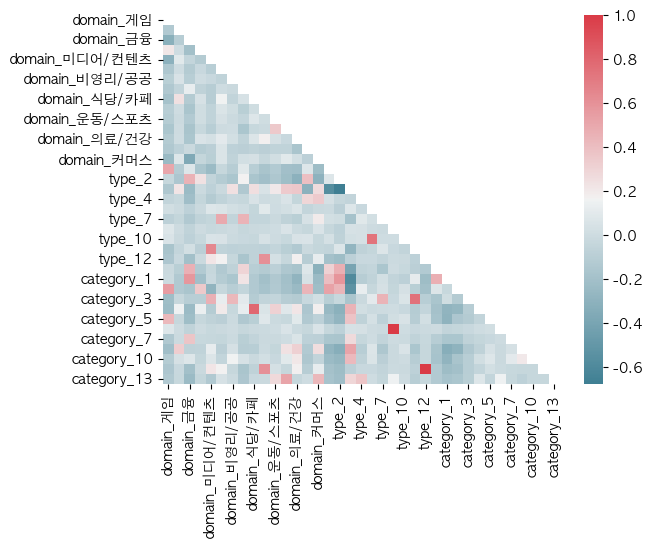

In [130]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df.corr(), mask=mask, cmap = cmap)

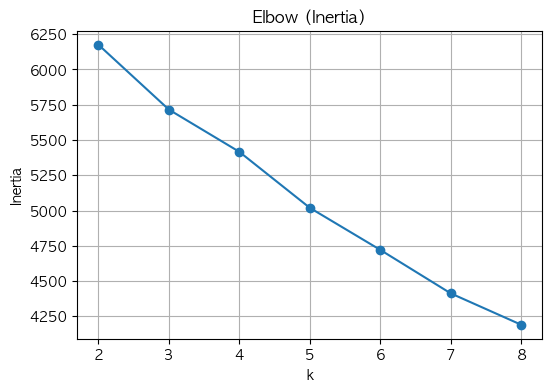

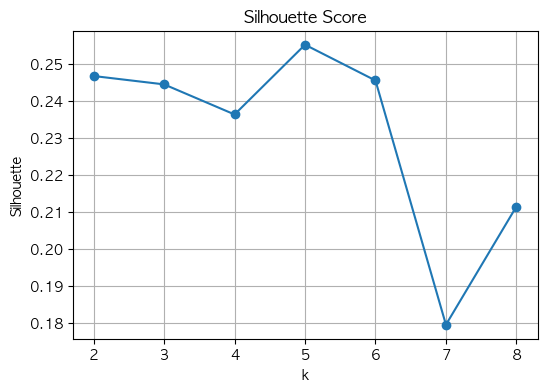

[INFO] 선택된 k = 5


,domain_게임,domain_교육,domain_금융,domain_기타,domain_미디어/컨텐츠,domain_뷰티,domain_비영리/공공,domain_생활,domain_식당/카페,domain_식음료,...,category_2,category_3,category_4,category_5,category_6,category_7,category_8,category_10,category_11,category_13
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.06491,0.00377,0.05645,0.00240,0.02882,0.00869,0.00548,0.01585,0.02092,0.00679,...,0.02606,0.00946,0.06405,0.04023,0.00000,0.02020,0.08218,0.02863,0.00591,0.03363
1,0.01608,0.00034,0.06834,0.00030,0.10153,0.01168,0.03617,0.03981,0.00030,0.00209,...,0.01478,0.18441,0.00804,0.00043,0.00000,0.00037,0.00806,0.00073,0.00046,0.00000
2,0.11239,0.00021,0.09333,0.00394,0.02448,0.00699,0.00260,0.02208,0.00726,0.00087,...,0.12918,0.02273,0.00146,0.00309,0.00000,0.00055,0.01679,0.00151,0.00056,0.00466
3,0.02963,0.00000,0.00000,0.00185,0.09027,0.02206,0.00000,0.00000,0.00000,0.11261,...,0.00185,0.00000,0.00000,0.02778,0.00000,0.00000,0.00926,0.00000,0.29259,0.00000
4,0.17339,0.00029,0.01018,0.00147,0.00731,0.00433,0.00416,0.00754,0.00381,0.00171,...,0.03532,0.00780,0.01732,0.02142,0.09096,0.00178,0.01455,0.00143,0.00045,0.10085


,top_domains
cluster,
0,"type_3(28.14%), category_8(8.22%), 게임(6.49%), ..."
1,"category_3(18.44%), category_1(11.48%), type_2..."
2,"type_2(15.32%), category_2(12.92%), category_1..."
3,"type_12(29.26%), category_11(29.26%), 식음료(11.2..."
4,"type_3(17.67%), 게임(17.34%), category_13(10.09%..."


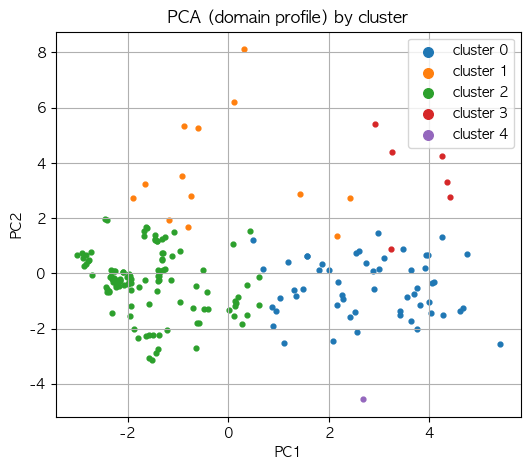

[DONE] mda_idx 클러스터링 완료


In [131]:
# ----------------------------------
# 0) 데이터 준비
# ----------------------------------
# domain_features: df_domain.groupby('mda_idx').sum() 결과라고 가정
# 예시) domain_features.head()
# index = mda_idx, columns = ["domain_게임", "domain_교육", ...]


# 결측치/무한대 정리
df = df.replace([np.inf, -np.inf], np.nan).fillna(0)

# (선택) 활동량 편차가 크다면 비율(정규화) 기반 특징으로 변환 권장
# 각 mda_idx의 총합으로 나눠 도메인 분포(확률)로 변환
row_sum = df.sum(axis=1)
row_sum[row_sum == 0] = 1  # 0 division 방지
df_ratio = df.div(row_sum, axis=0)

# (선택) 0-분산(상수)인 컬럼 제거 (학습 안정성)
var = df_ratio.var(axis=0)
keep_cols = var[var > 0].index
X = df_ratio[keep_cols].values

# 1) 스케일링
scaler = StandardScaler()  # 혹은 MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 2) k 값 탐색 (엘보 & 실루엣)
ks = range(2, 9)  # 2~8개 군집 범위 탐색
inertias = []
sil_scores = []

for k in ks:
    km = KMeans(n_clusters=k, n_init=20, random_state=42)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

# 엘보 그래프
plt.figure(figsize=(6,4))
plt.plot(list(ks), inertias, marker='o')
plt.title('Elbow (Inertia)')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# 실루엣 그래프 (값이 클수록 분리가 잘됨)
plt.figure(figsize=(6,4))
plt.plot(list(ks), sil_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('k')
plt.ylabel('Silhouette')
plt.grid(True)
plt.show()

# 3) 최종 KMeans 학습 (실루엣/엘보 보고 k 선택)
best_k = int(ks[int(np.argmax(sil_scores))])  # 실루엣 최고 k 자동 선택
print(f"[INFO] 선택된 k = {best_k}")

kmeans = KMeans(n_clusters=best_k, n_init=50, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# 결과 붙이기
result = pd.DataFrame(index=df_ratio.index)
result["cluster"] = labels

# 4) 클러스터 프로필(도메인 평균 분포)
cluster_profile = (
    pd.DataFrame(X, index=df_ratio.index, columns=keep_cols)
    .assign(cluster=labels)
    .groupby("cluster")
    .mean()
    .sort_index()
)

# 각 클러스터에서 비중이 큰 상위 도메인 Top-N 뽑기
def top_domains(profile_row, topn=5):
    s = profile_row.sort_values(ascending=False).head(topn)
    return ", ".join([f"{c.replace('domain_','')}({s[c]:.2%})" for c in s.index])

topn = 5
top_table = pd.DataFrame({
    "top_domains": [top_domains(cluster_profile.loc[c], topn) for c in cluster_profile.index]
}, index=cluster_profile.index)

display(cluster_profile.head())      # 클러스터별 평균 분포 (수치)
display(top_table)                   # 클러스터별 상위 도메인 요약 (가독성)

# 5) 2D 시각화 (PCA)
pca = PCA(n_components=2, random_state=42)
coords = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
for c in range(best_k):
    idx = (labels == c)
    plt.scatter(coords[idx,0], coords[idx,1], s=12, label=f"cluster {c}")
plt.title("PCA (domain profile) by cluster")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(markerscale=2)
plt.grid(True)
plt.show()

# 6) 결과 저장 (선택)
# mda_idx별 클러스터 라벨
result.to_csv("mda_idx_cluster_labels.csv", encoding="utf-8-sig")
# 클러스터별 도메인 분포(평균)
cluster_profile.to_csv("cluster_profile_domain_ratio.csv", encoding="utf-8-sig")
top_table.to_csv("cluster_top_domains.csv", encoding="utf-8-sig")

print("[DONE] mda_idx 클러스터링 완료")


- PCA 돌리기
- 나머지 붙여서 돌려보기

In [132]:
machesa.columns

Index(['ads_idx', 'dvc_idx', 'mda_idx', 'pub_sub_rel_id', 'contract_price',
       'media_price', 'click_time', 'click_date', 'exp_day', 'network',
       'user_ip', 'rwd_idx', 'advid', 'adv_cost', 'earn_cost', 'ctit',
       'conversion', 'ads_code', 'aff_idx', 'adv_idx', 'ads_type',
       'ads_category', 'ads_name', 'ads_save_way', 'ads_day_cap', 'ads_sdate',
       'ads_edate', 'ads_os_type', 'ads_order', 'ads_rejoin_type', 'regdate',
       'domain', 'duration_days'],
      dtype='object')

In [133]:
os_dummies = pd.get_dummies(machesa['ads_os_type'], prefix='os_type')
df_os = pd.concat([machesa['mda_idx'], os_dummies], axis = 1)
os_features = df_os.groupby('mda_idx').sum()
os_features = os_features.div(os_features.sum(axis = 1), axis = 0)
os_features

,os_type_1,os_type_2,os_type_3,os_type_7
mda_idx,,,,
12,0.00000,0.98617,0.00000,0.01383
14,0.24815,0.45731,0.00000,0.29454
18,0.00000,0.97182,0.00000,0.02818
22,0.00000,0.42885,0.25798,0.31317
26,0.95870,0.00000,0.00000,0.04130
30,0.00000,0.89167,0.00000,0.10833
32,0.00000,0.25032,0.00000,0.74968
54,0.05920,0.33097,0.00857,0.60126
56,0.63272,0.00000,0.00000,0.36728


In [ ]:
scale_features2[['mda_idx', 'media_price']].head()


,mda_idx,media_price
,,mean
0,12,349.58333
1,14,3027.96610
2,18,6832.60870
3,22,2945.00000
4,26,3977.36842


: 

### PCA

In [ ]:
df2 = domain_features.merge(type_features, on = 'mda_idx', how = 'left')
df2 = df2.merge(category_features,on = 'mda_idx', how = 'left')
df3 = os_features.merge(mda_duration_stats, on='mda_idx', how='left')
df3 = df3.merge(scale_features2[['mda_idx', 'media_price']], on='mda_idx', how='left')
df3 = df3.merge()

In [ ]:
# 모듈 불러오기
from sklearn.decomposition import PCA

# 주성분 분석
pca = PCA(n_components=10) # 데이터의 처음 10개의 주성분
pca.fit(df)
df_pca = pca.transform(df)  # 처음 10개의 주성분을

# 새로운 데이터 형태 확인
print('원본 데이터 형태:', str(df.shape)) # 원본 데이터셋의
print('축소된 데이터 형태:', str(df_pca.shape))  # 주성분


print('PCA 주성분 형태:', pca.components_.shape)
print('PCA 주성분:', pca.components_) # 행: 주성분, 중요도에 따라 정렬 / 열: 원본 데이터의 '변수'에 대응하는 값

print('각 주성분의 분산 비율:', pca.explained_variance_ratio_) # 각 주성분이 원본 데이터를 얼마나 설명하는가?

In [ ]:
# 히트맵으로 주성분과 변수와의 상관관계를 시각화하기
# 어떤 특성(변수) 정보가 각각의 주성분과의 연관성이 높은지 확인
plt.figure(figsize=(30, 5))    # 히트맵 사이즈 설정
plt.matshow(pca.components_, cmap = 'RdYlBu_r', fignum=1)  # 행렬
plt.yticks([0, 9])    # 세로축 축 값 표기
plt.colorbar()    # orentation = 'horizontal, 상관계수 bar 그리기
plt.xticks(range(len(df.columns)), df.columns, rotation = 80, ha = 'left')
plt.xlabel('특성')
plt.ylabel('주성분')